# Objectives:

Through studying Airbnb listing data, build a tool to help Airbnb hosts maximise earnings __(SINGAPORE SPECIFIC)__
   - Provide breakdown of similar listings in their vicinity (based on zipcode)
   - Factors to take note of to maximize earnings 
        - Recommendation for listing description 
             - Eg. location specific highlights (identified through NLP)
             - Descriptive words to use
             - Number of photos to use
        - Superhost 
        - Instant Booking or Not

# Methodology



## Import main packages that will be used

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

## New York Data

In [ ]:
airbnb_ny = pd.read_csv('./listings.csv')

In [ ]:
airbnb_ny.shape

In [ ]:
for i,column in enumerate(airbnb_ny.columns):
    print(i+1,column)

In [ ]:
airbnb_ny.head()

In [ ]:
reviews_ny = pd.read_csv('./reviews.csv')

In [ ]:
reviews_ny.head()

## Potential ideas

- Query using SQL
- Sentiment analysis for comments?
- NLP for Listing Names

# Singapore Dataset

________

### Listings Details File

In [9]:
sglisting = pd.read_csv('./SG listings (1).csv')

In [3]:
sglisting.head()

id                         listing_url       scrape_id last_scraped  \
0  49091  https://www.airbnb.com/rooms/49091  20190420034635   2019-04-20   
1  50646  https://www.airbnb.com/rooms/50646  20190420034635   2019-04-20   
2  56334  https://www.airbnb.com/rooms/56334  20190420034635   2019-04-20   
3  71609  https://www.airbnb.com/rooms/71609  20190420034635   2019-04-20   
4  71896  https://www.airbnb.com/rooms/71896  20190420034635   2019-04-20   

                                  name  \
0    COZICOMFORT LONG TERM STAY ROOM 2   
1      Pleasant Room along Bukit Timah   
2                          COZICOMFORT   
3  Ensuite Room (Room 1 & 2) near EXPO   
4      B&B  Room 1 near Airport & EXPO   

                                             summary  \
0                                                NaN   
1  Fully furnished bedroom with a nice view on th...   
2                                                NaN   
3  For 3 (Website hidden by Airbnb) room 1&2 and ...   
4                                                NaN   

                                               space  \
0  This is Room No. 2.(available after Jan 15 201...   
1  Good Condition room, bright & windy. Comes wit...   
2  This is Room no. 1. USD700 per month On the fa...   
3  Landed Homestay Room for Rental. Between Simei...   
4  Vocational Stay Deluxe Bedroom in Singapore.(N...   

                                         description experiences_offered  \
0  This is Room No. 2.(available after Jan 15 201...                none   
1  Fully furnished bedroom with a nice view on th...                none   
2  This is Room no. 1. USD700 per month On the fa...                none   
3  For 3 (Website hidden by Airbnb) room 1&2 and ...                none   
4  Vocational Stay Deluxe Bedroom in Singapore.(N...                none   

                               neighborhood_overview  ... instant_bookable  \
0                                                NaN  ...                f   
1  The serenity & quiet surrounding makes it an i...  ...                f   
2                                                NaN  ...                f   
3                                                NaN  ...                t   
4                                                NaN  ...                t   

  is_business_travel_ready cancellation_policy require_guest_profile_picture  \
0                        f            flexible                             t   
1                        f            moderate                             f   
2                        f            flexible                             t   
3                        f            moderate                             f   
4                        f            moderate                             f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                t                               2   
1                                t                               1   
2                                t                               2   
3                                t                               9   
4                                t                               9   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            1   
2                                            2   
3                                            9   
4                                            9   

   calculated_host_listings_count_shared_rooms  reviews_per_month  
0                                            0               0.01  
1                                            0    

In [4]:
sglisting.shape

(8090, 106)

In [5]:
for i,columns in enumerate(sglisting.columns):
    print(i+1, columns)

1 id
2 listing_url
3 scrape_id
4 last_scraped
5 name
6 summary
7 space
8 description
9 experiences_offered
10 neighborhood_overview
11 notes
12 transit
13 access
14 interaction
15 house_rules
16 thumbnail_url
17 medium_url
18 picture_url
19 xl_picture_url
20 host_id
21 host_url
22 host_name
23 host_since
24 host_location
25 host_about
26 host_response_time
27 host_response_rate
28 host_acceptance_rate
29 host_is_superhost
30 host_thumbnail_url
31 host_picture_url
32 host_neighbourhood
33 host_listings_count
34 host_total_listings_count
35 host_verifications
36 host_has_profile_pic
37 host_identity_verified
38 street
39 neighbourhood
40 neighbourhood_cleansed
41 neighbourhood_group_cleansed
42 city
43 state
44 zipcode
45 market
46 smart_location
47 country_code
48 country
49 latitude
50 longitude
51 is_location_exact
52 property_type
53 room_type
54 accommodates
55 bathrooms
56 bedrooms
57 beds
58 bed_type
59 amenities
60 square_feet
61 price
62 weekly_price
63 monthly_price
64 security

In [6]:
sglisting['square_feet'].value_counts()

0.0       29
200.0      2
1001.0     2
205.0      2
334.0      2
517.0      1
450.0      1
172.0      1
86.0       1
807.0      1
135.0      1
398.0      1
344.0      1
301.0      1
226.0      1
100.0      1
183.0      1
Name: square_feet, dtype: int64

### Listings Summary File

In [7]:
sglisting_summary = pd.read_csv('./SG listings.csv')

In [8]:
sglisting_summary.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     81   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     80   
2        North Region     Woodlands   1.44246  103.79667  Private room     68   
3         East Region      Tampines   1.34541  103.95712  Private room    201   
4         East Region      Tampines   1.34567  103.95963  Private room     92   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.30   
2               6                 20  2015-10-01               0.21   
3               1                 12  2019-01-06               0.13   
4               1                 20  2017-08-13               0.21   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               354  
4                               9               353

In [9]:
sglisting_summary.shape

(8090, 16)

### Calendar File

In [10]:
sgcalendar = pd.read_csv('./SG calendar.csv')

In [11]:
sgcalendar.head()

listing_id        date available   price adjusted_price  minimum_nights  \
0       49091  2019-04-20         t  $81.00         $81.00             180   
1       49091  2019-04-21         t  $81.00         $81.00             180   
2       49091  2019-04-22         t  $81.00         $81.00             180   
3       49091  2019-04-23         t  $81.00         $81.00             180   
4       49091  2019-04-24         t  $81.00         $81.00             180   

   maximum_nights  
0             360  
1             360  
2             360  
3             360  
4             360

In [12]:
sgcalendar.shape

(2952850, 7)

In [13]:
len(sgcalendar['listing_id'].unique())

8090

### Reviews Details File

In [14]:
sgreviews = pd.read_csv('./SG reviews.csv')

In [15]:
sgreviews.head()

listing_id        id        date  reviewer_id reviewer_name  \
0       49091   8243238  2013-10-21      8557223         Jared   
1       50646  11909864  2014-04-18      1356099         James   
2       50646  13823948  2014-06-05     15222393         Welli   
3       50646  15117222  2014-07-02      5543172         Cyril   
4       50646  15426462  2014-07-08       817532          Jake   

                                            comments  
0  Fran was absolutely gracious and welcoming. Ma...  
1  A comfortable room in a smart condo developmen...  
2  Stayed over at Sujatha's house for 3 good nigh...  
3  It's been a lovely stay at Sujatha's. The room...  
4  We had a great experience. A nice place, an am...

### Reviews Summary File

In [16]:
sgreviews_summary = pd.read_csv('./SG reviews summary.csv')

In [17]:
sgreviews_summary.head()

listing_id        date
0       49091  2013-10-21
1       50646  2014-04-18
2       50646  2014-06-05
3       50646  2014-07-02
4       50646  2014-07-08

### Neighbourhood File

In [18]:
sgneighbourhood = pd.read_csv('./SG neighbourhoods.csv')

In [19]:
sgneighbourhood.head()

neighbourhood_group  neighbourhood
0      Central Region         Bishan
1      Central Region    Bukit Merah
2      Central Region    Bukit Timah
3      Central Region  Downtown Core
4      Central Region        Geylang

In [20]:
sgneighbourhood.shape

(55, 2)

# Data Cleaning, EDA & Feature Engineering

## Listings Detail 

### Remove listings that are not 'real'

In [10]:
# Check listings to remove based on the listing name

drop_list = []

for i,listing_name in enumerate(sglisting['name']):
    try: 
        if 'test' in listing_name.lower():
            print(i, listing_name)
            drop_list.append(i)
    except AttributeError:
        print (i, listing_name)
        drop_list.append(i)

print('  ')
print('The list of indices to drop:')
print(drop_list)

1135 nan
1479 nan
4054 [Test] Cozy Modern House with Unique Architecture
4790 test test
7082 Testing
  
The list of indices to drop:
[1135, 1479, 4054, 4790, 7082]


In [11]:
# Drop all the test listings since we only want to study listings that are actually in use or were meant to be used

sglisting = sglisting.drop(drop_list,axis=0)

### Create a classification for listings which are operational and not operational
Assumption: Listings with calendars last updated more than 1 year ago are considered to be not operational, since operational listings should have updated calendars to take in bookings. 

In [12]:
# Create a column to mark if listings were operational in the last 12 months
## 0 = Not operational, 1 = Operational

    # Create a function to convert values in the column

def operational_label(x):
    x = x.replace('never','0')
    x = x.replace('today','1')
    x = x.replace('yesterday','1')
    x = x.replace('a week ago','1')
    x = [int(i) for i in x.split() if i.isdigit()]
    
    return x

In [13]:
# Create a column to mark if listings were operational in the last 12 months

    # Create a function to convert values in the column

sglisting['Operational'] = sglisting['calendar_updated'].map(lambda x: operational_label(x))

operational_list = []

for list in sglisting['Operational']:
    for value in list:
        if value > 13:
            operational_list.append(0)
        else:
            operational_list.append(1)
            
sglisting['Operational'] = operational_list

#### Create separate dataset with only Operational listings

In [14]:
operational = sglisting[sglisting['Operational'] == 1]

### Create a classification for listings which are have received reviews

Assumption: Listings with reviews are good indicators that the listings have been booked before.

In [15]:
# Create a column to mark if listings were reviewed before
## 0 = Not reviewed, 1 = Reviewed

sglisting['reviewed'] = [1 if listing_reviews > 0 else 0 for listing_reviews in sglisting['number_of_reviews'].values ]

#### Create separate dataset with only reviewed listings

In [16]:
reviewed = sglisting[sglisting['reviewed'] == 1]

#### Create separate dataset with only operational and reviewed listings

In [17]:
active = sglisting[(sglisting['reviewed'] == 1) & (sglisting['Operational'] == 1)]

### Convert Currency columns to float

In [18]:
    # Check the format of columns that have price information
print(active[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].info())

active[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 3 to 8020
Data columns (total 5 columns):
price               4518 non-null object
weekly_price        412 non-null object
monthly_price       498 non-null object
security_deposit    3471 non-null object
cleaning_fee        3506 non-null object
dtypes: object(5)
memory usage: 211.8+ KB
None


price weekly_price monthly_price security_deposit cleaning_fee
3  $201.00          NaN     $5,421.00          $271.00       $54.00
4   $92.00      $678.00     $2,439.00          $136.00       $27.00
5  $102.00      $678.00     $2,439.00          $136.00       $27.00
6  $203.00    $1,355.00     $4,066.00          $271.00       $68.00
8   $51.00          NaN           NaN          $200.00        $0.00

In [19]:

# Convert currency to float

    # Create function to convert currency to float
def currency_convert(x):
    try:
        x = float(x.replace('$','').replace(',',''))
    except AttributeError:
        x = np.nan
        
    return x
    
    # Apply the function on the relevant columns 
for column in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']:
    operational[column] = operational[column].map(lambda x: currency_convert(x))
    
for column in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']:
    reviewed[column] = reviewed[column].map(lambda x: currency_convert(x))
    
for column in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']:
    active[column] = active[column].map(lambda x: currency_convert(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

### Check for outliers based on price - Entire home/apt

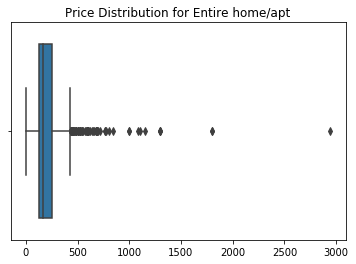

In [20]:
# Distribution of price for different room types

sns.boxplot(active[active['room_type'] == 'Entire home/apt'][['price']])
plt.title('Price Distribution for Entire home/apt');

In [21]:
# Study outliers for Entire home/apt in terms of price

active[(active['room_type'] == 'Entire home/apt') & (active['price'] > 1500)][['id','listing_url','name','summary','space','description','price','property_type','neighbourhood_cleansed']]

id                            listing_url  \
1609  12372683  https://www.airbnb.com/rooms/12372683   
1991  14620083  https://www.airbnb.com/rooms/14620083   
2303  16277373  https://www.airbnb.com/rooms/16277373   

                                                   name  \
1609                             Play House @ Hoot Kiam   
1991  Capella The Club Residences Singapore - 3 BR S...   
2303                      Luxurious Three Storey Semi-D   

                                                summary  \
1609  First storey of a shophouse near Orchard Road ...   
1991  At a luxury space of 222sqm, our 3 Bedroom Sui...   
2303  My place is close to parks, the airport, and p...   

                                                  space  \
1609  Working KTV system with both English and Manda...   
1991  An exclusive and luxury resort promising the u...   
2303  First Storey:  Big Living room, dining place, ...   

                                            description   price property_type  \
1609  First storey of a shophouse near Orchard Road ...  1800.0         House   
1991  At a luxury space of 222sqm, our 3 Bedroom Sui...  2944.0     Apartment   
2303  My place is close to parks, the airport, and p...  1800.0      Bungalow   

     neighbourhood_cleansed  
1609                Tanglin  
1991       Southern Islands  
2303                  Bedok

#### Explanation:

Looking at the extreme outlier samples (e.g. defined as >$1500) to get an idea of the outliers:
- The listings are apartments in Southern Islands (Sentosa) run by the high-end provider Capella, or large shophouses/bungalows. The listed pricing would make sense. 

Hence, I will not remove any outliers from the dataset.

### Check for outliers based on price - Private Room

In [33]:
# Distribution of price for different room types

sns.boxplot(active[active['room_type'] == 'Private room']['price'])
plt.title('Price Distribution for Private rooms');

In [22]:
# Study extreme outliers for Private room in terms of price (>$1000)

active[(active['room_type'] == 'Private room') & (active['price'] > 1000)][['id','listing_url','name','summary','space','description','price','weekly_price','monthly_price','accommodates','minimum_nights','property_type','neighbourhood_cleansed']]

id                            listing_url  \
3028  19218794  https://www.airbnb.com/rooms/19218794   
5201  27513236  https://www.airbnb.com/rooms/27513236   

                                                   name  \
3028  Renovated Master Bedroom & own bathroom@East C...   
5201                              Maggie's bnb 1bedroom   

                                                summary  \
3028  Pool View Newly renovated Master bedroom attac...   
5201                                                NaN   

                                                  space  \
3028  免费地下停车场; 免费无线上网; 和租借IPAD 免费冰箱,咖啡和茶设施; 遥控风扇和空调;...   
5201  Nearby to Eunos mrt. Not far from Singapore Ai...   

                                            description   price  weekly_price  \
3028  Pool View Newly renovated Master bedroom attac...  3001.0           NaN   
5201  Nearby to Eunos mrt. Not far from Singapore Ai...  1300.0           NaN   

      monthly_price  accommodates  minimum_nights property_type  \
3028            NaN             2              90     Apartment   
5201            NaN             4               2     Apartment   

     neighbourhood_cleansed  
3028                  Bedok  
5201                  Bedok

__Explanation:__
Looking at both listings, the listing prices are not accurate when I go to the URL. The correct information:
- Index 3028 is priced at $100 per night

- Maggie's Airbnb (Index 5201) is priced at $80 per night

Hence, I will go ahead to amend the price listed in the dataset.

In [23]:
# Amend the pricing for the 2 listings identified above

active.loc[[3028,5201],'price'] = [100.0,80.0]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


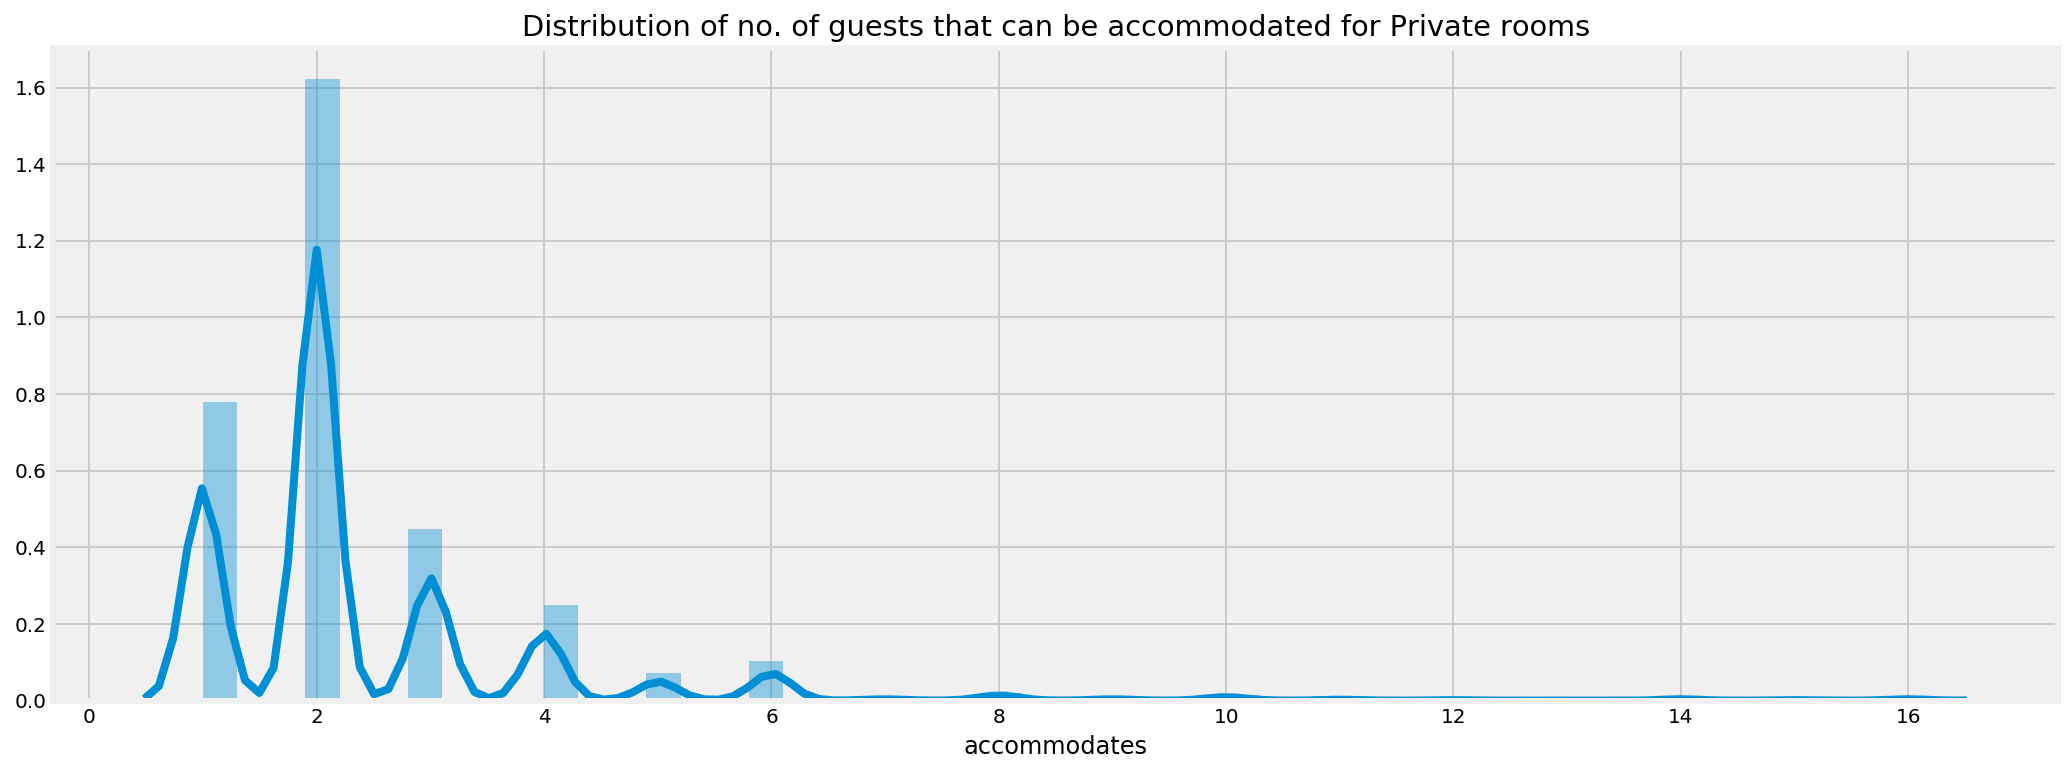

In [36]:
# Plot distribution of number of guests for private room

plt.figure(figsize=(16, 6))
sns.distplot(active[active['room_type'] == 'Private room']['accommodates'])
plt.title('Distribution of no. of guests that can be accommodated for Private rooms');

In [37]:
# Calculate the average daily price for Entire home/apt

print('Average Price for Entire home/apt:')
print(np.mean(active[active['room_type'] == 'Entire home/apt']['price']))

Average Price for Entire home/apt:
205.41212926073484


### Identify listings that are possibly misclassified by the hosts
From the EDA conducted, many listings that are classified as 'Private room' are actually the entire home, based on the listing description, however are misclassified by the hosts. 

Hence, I will attempt to re-classify these listings in order to get a clear classification of room types to analyse the attributes of each room type.

__Assumption:__
<br>
Based on the distribution plot above, most private rooms accommodate 2 pax. There is still a reasonable number that can accommodate up to 6 pax. Beyond that, the number of guests that can be accommodated falls significantly. 

Hence, I will set a rule to reclassify any private room listings that accommodate more than 6 pax and have a daily price that is above the average price for an entire home/apt.

In [24]:
# Filter based on rule to reclassify private room listings

reclass_list = active[(active['accommodates'] >6) & (active['room_type'] == 'Private room') & (active['price'] > 200)][['id','listing_url','name','summary','space','description','price','accommodates','minimum_nights','property_type','neighbourhood_cleansed']].index

active.loc[reclass_list,'room_type'] = 'Entire home/apt'

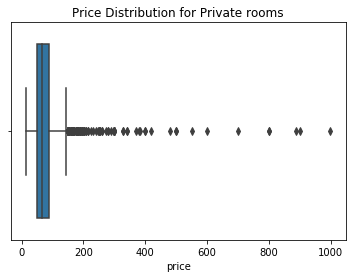

In [25]:
# Relook at box plot for Private rooms
    # Distribution of price for different room types

sns.boxplot(active[active['room_type'] == 'Private room']['price'])
plt.title('Price Distribution for Private rooms');

### Check for outliers based on price - Shared Room

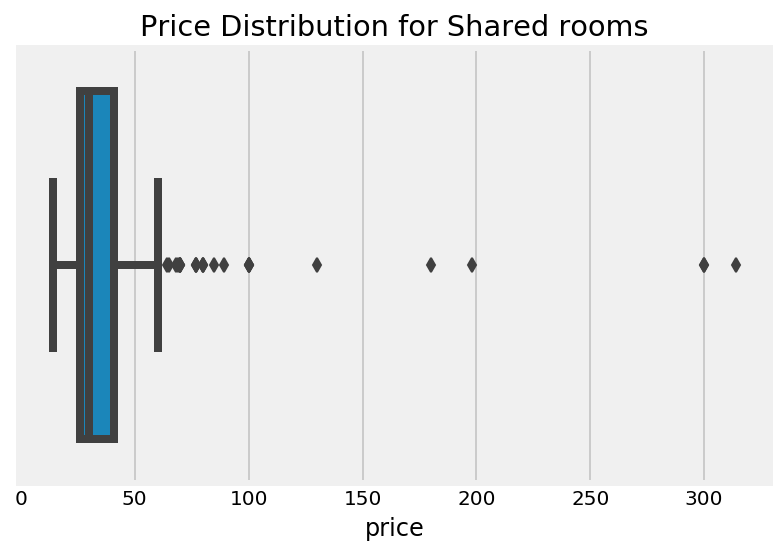

In [40]:
# Distribution of price for different room types

sns.boxplot(active[active['room_type'] == 'Shared room']['price'])
plt.title('Price Distribution for Shared rooms');

In [41]:
# Study extreme outliers for Private room in terms of price (>$100)

active[(active['room_type'] == 'Shared room') & (active['price'] > 100)][['id','listing_url','name','summary','space','room_type','description','price','weekly_price','monthly_price','accommodates','minimum_nights','property_type','neighbourhood_cleansed']]

id                            listing_url  \
106    1678754   https://www.airbnb.com/rooms/1678754   
925    8212422   https://www.airbnb.com/rooms/8212422   
1043   8914905   https://www.airbnb.com/rooms/8914905   
3555  21212964  https://www.airbnb.com/rooms/21212964   
5147  27293400  https://www.airbnb.com/rooms/27293400   
6222  29971334  https://www.airbnb.com/rooms/29971334   

                                                   name  \
106               Unique Family Room (6 x Capsule Pods)   
925                               Family room for 4 pax   
1043              Unique Family Room (7 x Capsule Pods)   
3555  2mins MRT/2 bedrooms/City/25 flor/Great View/Q...   
5147                      NEW & Modern Studio Apartment   
6222                         Premium Room at Wanderloft   

                                                summary  \
106   Our hostel is close to Chinatown. You’ll love ...   
925   Family room for 4 pax. we provide free blanket...   
1043  Our hostel is close to Chinatown. You’ll love ...   
3555  •\tNewly renovated, great city view, cozy room...   
5147  The studio comes with a queen sized-bed and is...   
6222  Travelers who wish to travel comfortably on a ...   

                                                  space    room_type  \
106   Each custom-made pod is uniquely put together ...  Shared room   
925   G4 Station is centrally located at 11 Mackenzi...  Shared room   
1043  Each custom-made pod is uniquely put together ...  Shared room   
3555  •\tNewly renovated, great city view, cozy room...  Shared room   
5147                                                NaN  Shared room   
6222                                                NaN  Shared room   

                                            description  price  weekly_price  \
106   Our hostel is close to Chinatown. You’ll love ...  300.0           NaN   
925   Family room for 4 pax. we provide free blanket...  130.0           NaN   
1043  Our hostel is close to Chinatown. You’ll love ...  314.0           NaN   
3555  •\tNewly renovated, great city view, cozy room...  198.0           NaN   
5147  The studio comes with a queen sized-bed and is...  180.0           NaN   
6222  Travelers who wish to travel comfortably on a ...  300.0           NaN   

      monthly_price  accommodates  minimum_nights      property_type  \
106             NaN             6               1  Bed and breakfast   
925             NaN             4               1  Bed and breakfast   
1043            NaN             7               1  Bed and breakfast   
3555            NaN             4               2          Apartment   
5147            NaN             2               1          Apartment   
6222            NaN             1               1             Hostel   

     neighbourhood_cleansed  
106                  Outram  
925                  Rochor  
1043                 Outram  
3555                Kallang  
5147                Tanglin  
6222        Singapore River

In [42]:
sglisting['property_type'].value_counts()

Apartment             3503
Condominium           1903
Serviced apartment    1098
House                  481
Hostel                 303
Townhouse              140
Loft                   121
Boutique hotel         105
Bed and breakfast       89
Hotel                   89
Bungalow                70
Other                   60
Guesthouse              33
Guest suite             25
Villa                   20
Tent                    20
Boat                     8
Campsite                 4
Aparthotel               4
Chalet                   3
Cottage                  2
Farm stay                1
Tiny house               1
Cabin                    1
Lighthouse               1
Name: property_type, dtype: int64

In [43]:
sglisting[(sglisting['property_type'] == 'Serviced apartment') & (sglisting['property_type'] == 'Serviced apartment')]

id                            listing_url       scrape_id  \
78     1210268   https://www.airbnb.com/rooms/1210268  20190420034635   
80     1229614   https://www.airbnb.com/rooms/1229614  20190420034635   
81     1233249   https://www.airbnb.com/rooms/1233249  20190420034635   
119    1833950   https://www.airbnb.com/rooms/1833950  20190420034635   
141    2090082   https://www.airbnb.com/rooms/2090082  20190420034635   
150    2146015   https://www.airbnb.com/rooms/2146015  20190420034635   
180    2612906   https://www.airbnb.com/rooms/2612906  20190420034635   
186    2752673   https://www.airbnb.com/rooms/2752673  20190420034635   
194    2868366   https://www.airbnb.com/rooms/2868366  20190420034635   
209    3116909   https://www.airbnb.com/rooms/3116909  20190420034635   
216    3158949   https://www.airbnb.com/rooms/3158949  20190420034635   
231    3419511   https://www.airbnb.com/rooms/3419511  20190420034635   
233    3460343   https://www.airbnb.com/rooms/3460343  20190420034635   
255    3822245   https://www.airbnb.com/rooms/3822245  20190420034635   
275    3987557   https://www.airbnb.com/rooms/3987557  20190420034635   
284    4008569   https://www.airbnb.com/rooms/4008569  20190420034635   
291    4026199   https://www.airbnb.com/rooms/4026199  20190420034635   
303    4124908   https://www.airbnb.com/rooms/4124908  20190420034635   
304    4138944   https://www.airbnb.com/rooms/4138944  20190420034635   
336    4450681   https://www.airbnb.com/rooms/4450681  20190420034635   
342    4499317   https://www.airbnb.com/rooms/4499317  20190420034635   
349    4528765   https://www.airbnb.com/rooms/4528765  20190420034635   
353    4541183   https://www.airbnb.com/rooms/4541183  20190420034635   
374    4659067   https://www.airbnb.com/rooms/4659067  20190420034635   
375    4660363   https://www.airbnb.com/rooms/4660363  20190420034635   
377    4683314   https://www.airbnb.com/rooms/4683314  20190420034635   
415    4973227   https://www.airbnb.com/rooms/4973227  20190420034635   
416    4979889   https://www.airbnb.com/rooms/4979889  20190420034635   
427    5052014   https://www.airbnb.com/rooms/5052014  20190420034635   
430    5095636   https://www.airbnb.com/rooms/5095636  20190420034635   
...        ...                                    ...             ...   
7933  33785212  https://www.airbnb.com/rooms/33785212  20190420034635   
7934  33785898  https://www.airbnb.com/rooms/33785898  20190420034635   
7941  33815699  https://www.airbnb.com/rooms/33815699  20190420034635   
7942  33817673  https://www.airbnb.com/rooms/33817673  20190420034635   
7943  33817680  https://www.airbnb.com/rooms/33817680  20190420034635   
7945  33818693  https://www.airbnb.com/rooms/33818693  20190420034635   
7950  33828050  https://www.airbnb.com/rooms/33828050  20190420034635   
7952  33828484  https://www.airbnb.com/rooms/33828484  20190420034635   
7953  33828503  https://www.airbnb.com/rooms/33828503  20190420034635   
7955  33828621  https://www.airbnb.com/rooms/33828621  20190420034635   
7975  33859647  https://www.airbnb.com/rooms/33859647  20190420034635   
7995  33894843  https://www.airbnb.com/rooms/33894843  20190420034635   
7998  33896154  https://www.airbnb.com/rooms/33896154  20190420034635   
8003  33912109  https://www.airbnb.com/rooms/33912109  20190420034635   
8012  33919675  https://www.airbnb.com/rooms/33919675  20190420034635   
8024  33943953  https://www.airbnb.com/rooms/33943953  20190420034635   
8029  33947133  https://www.airbnb.com/rooms/33947133  20190420034635   
8033  33950333  https://www.airbnb.com/rooms/33950333  20190420034635   
8056  33974123  https://www.airbnb.com/rooms/33974123  20190420034635   
8061  33977094  https://www.airbnb.com/rooms/33977094  20190420034635   
8062  33977227  https://www.airbnb.com/rooms/33977227  20190420034635   
8063  33977228  https://www.airbnb.com/rooms/33977228  20190420034635   
8064  33977447  https://www.airbnb.com/rooms/33977447  20190420034635 

In [51]:
plt.rcParams['font.family'] = "serif"

In [90]:
plt.rcParams.update({'font.size': 10})

# EDA on SG Data

Types of listings
- Entire home/apt
- Private room
- Shared room

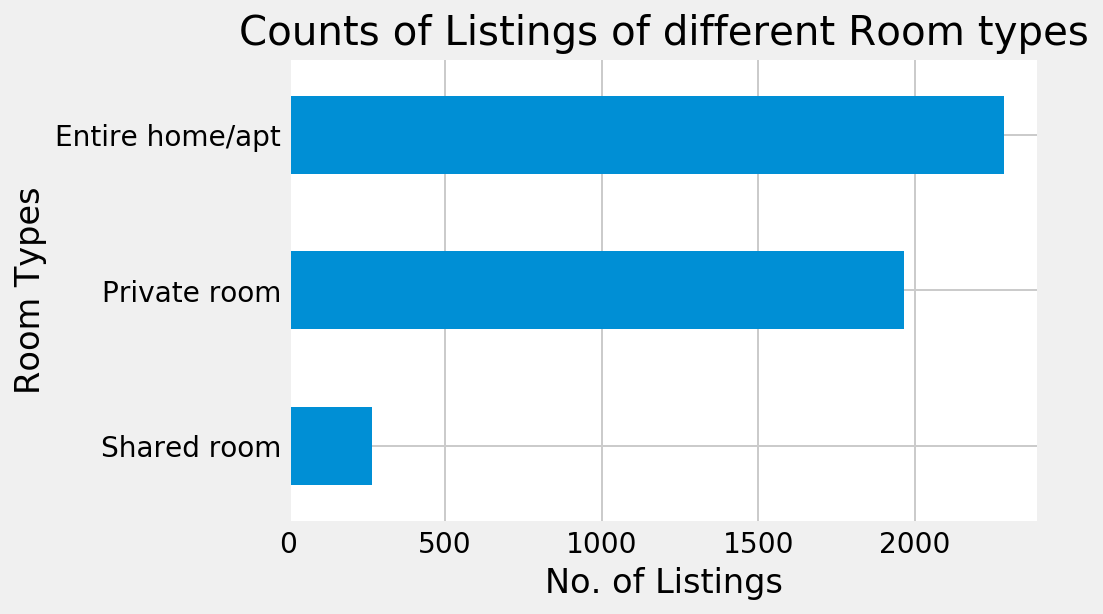

In [48]:
# Distribution of listing types

ax = active['room_type'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Counts of Listings of different Room types')
plt.ylabel('Room Types')
plt.xlabel('No. of Listings')
ax.set_facecolor("White")

In [62]:
count = [269, 1965, 2284]
types = ['Shared room','Private room','Entire home/apt']

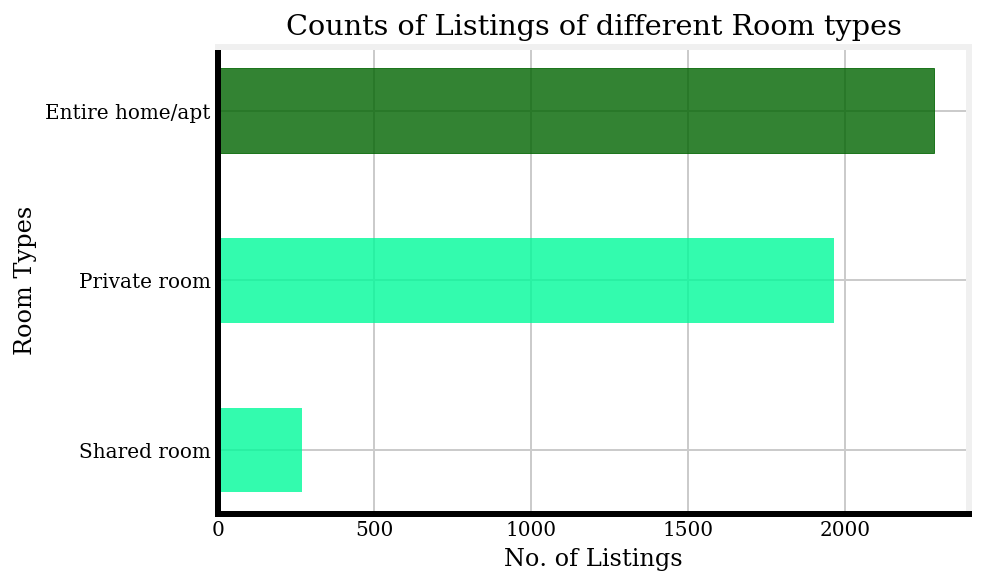

<Figure size 576x288 with 0 Axes>

In [91]:
fig, ax = plt.subplots(1,1)
plt.figure(figsize = (8,4))
barplot = ax.barh(types,count, color = 'mediumspringgreen', height = 0.5, alpha = 0.8)
ax.set(title = 'Counts of Listings of different Room types', ylabel ='Room Types', xlabel='No. of Listings')
barplot[2].set_color('darkgreen')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
fig.set_facecolor('white')
ax.set_facecolor('white')

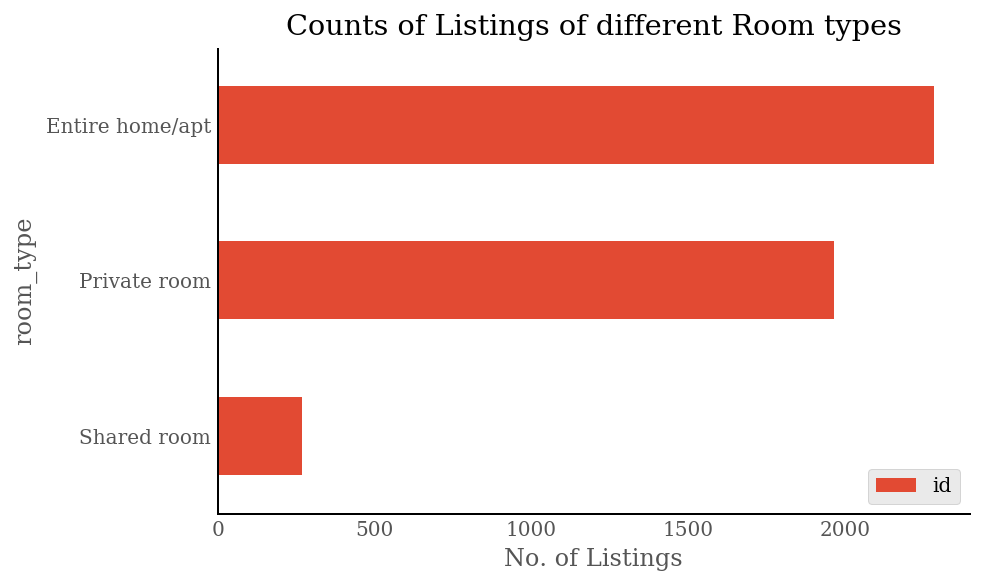

<Figure size 576x288 with 0 Axes>

In [122]:
# Average price for listings types

fig, ax = plt.subplots(1,1)
plt.style.use('ggplot')
plt.figure(figsize = (8,4))
ax.set(title = 'Counts of Listings of different Room types', ylabel ='Room Types', xlabel='No. of Listings')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
fig.set_facecolor('white')
ax.set_facecolor('white')
active[['room_type','id']].groupby(by='room_type').count().sort_values(by='id',ascending=True).plot(ax=ax,kind='barh');

In [31]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'

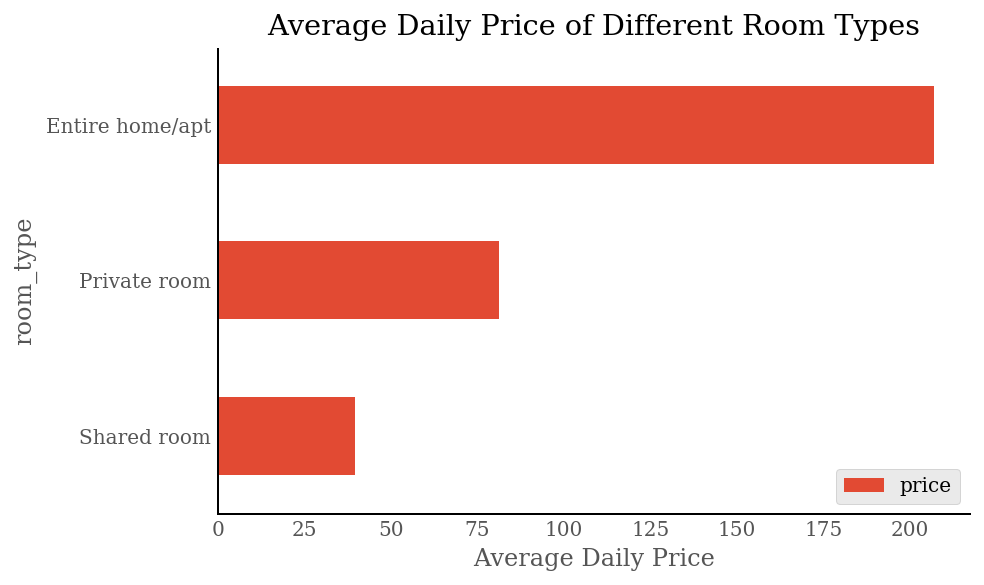

<Figure size 576x288 with 0 Axes>

In [116]:
# Average price for listings types

fig, ax = plt.subplots(1,1)
plt.style.use('ggplot')
plt.figure(figsize = (8,4))
ax.set(title = 'Average Daily Price of Different Room Types', ylabel ='Room Types', xlabel='Average Daily Price')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
fig.set_facecolor('white')
ax.set_facecolor('white')
active[['room_type','price']].groupby(by='room_type').mean().sort_values(by='price',ascending=True).plot(ax=ax,kind='barh');

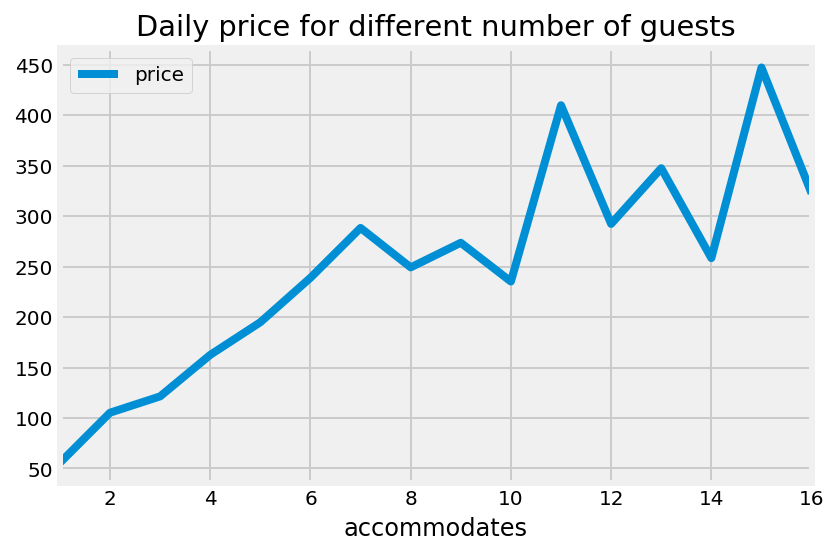

In [46]:
# Price of listings that can accommodate different number of guests

active[['accommodates','price']].groupby(by=['accommodates']).mean().plot()
plt.title('Daily price for different number of guests');

__Explanation:__

The daily rate increases steadily as the number of guests that the listing can accommodate increases. 

However, the pattern becomes less obvious after 7 guests. This is because listings which can accommodate a larger number of guests tend to consist of hostels. Hence, the price of those listings are actually lower as hostels are less 'luxurious' than other private homes / rooms. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


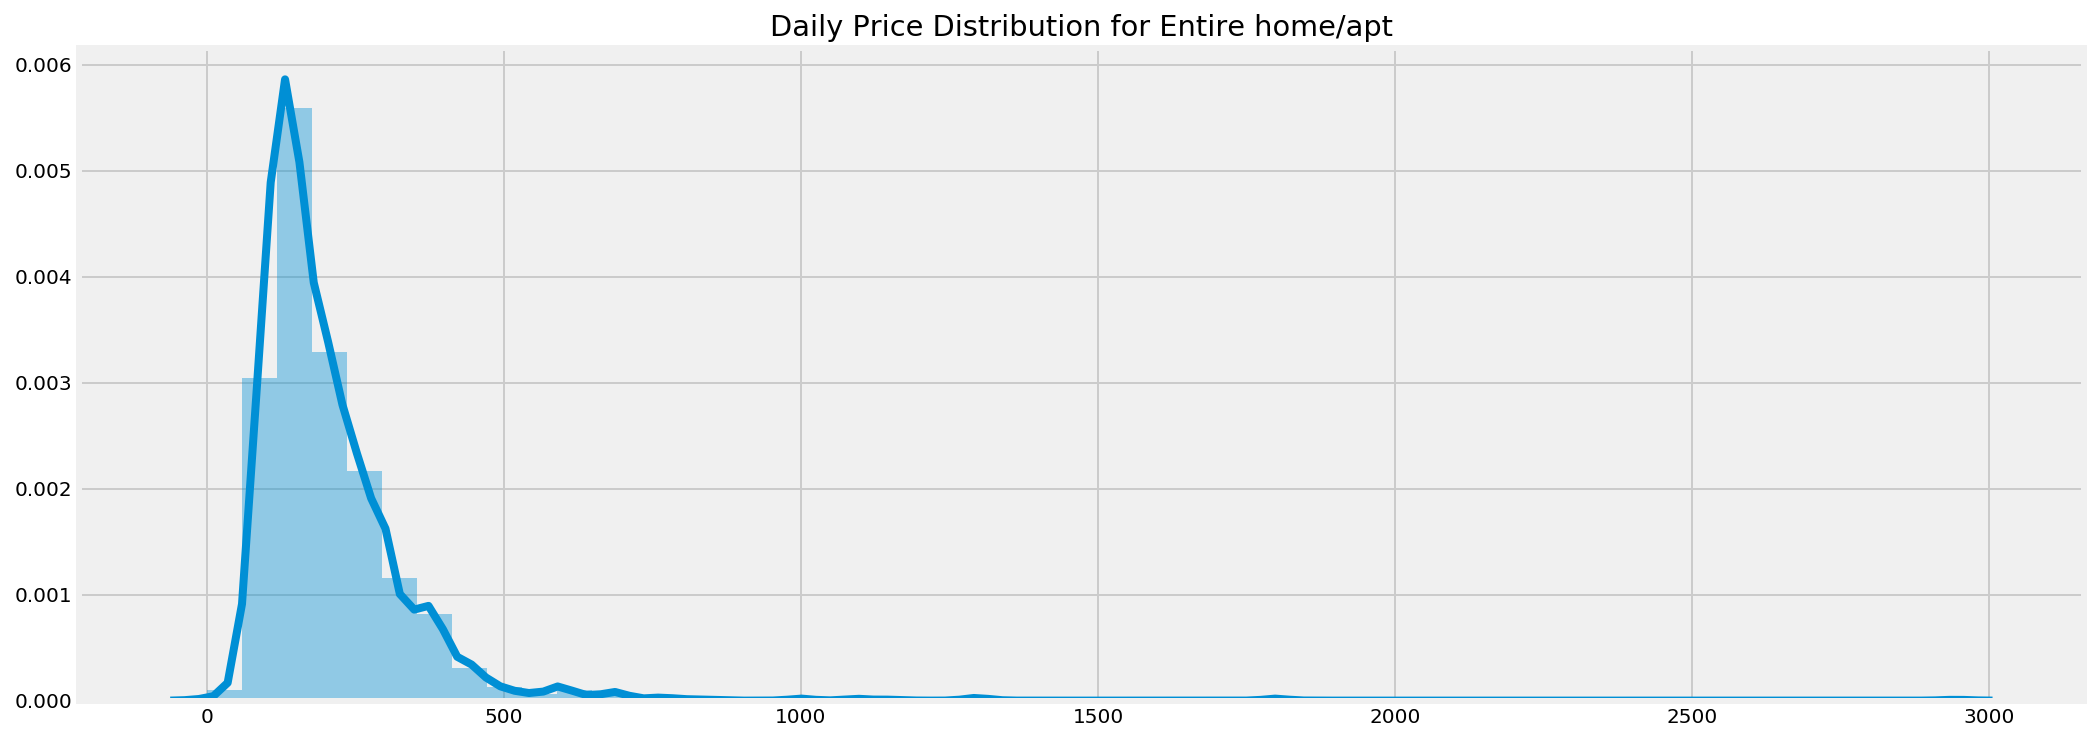

In [47]:
# Distribution of price for different room types - Entire home/apt

plt.figure(figsize=(16, 6))
sns.distplot(active[active['room_type'] == 'Entire home/apt'][['price']])
plt.title('Daily Price Distribution for Entire home/apt');

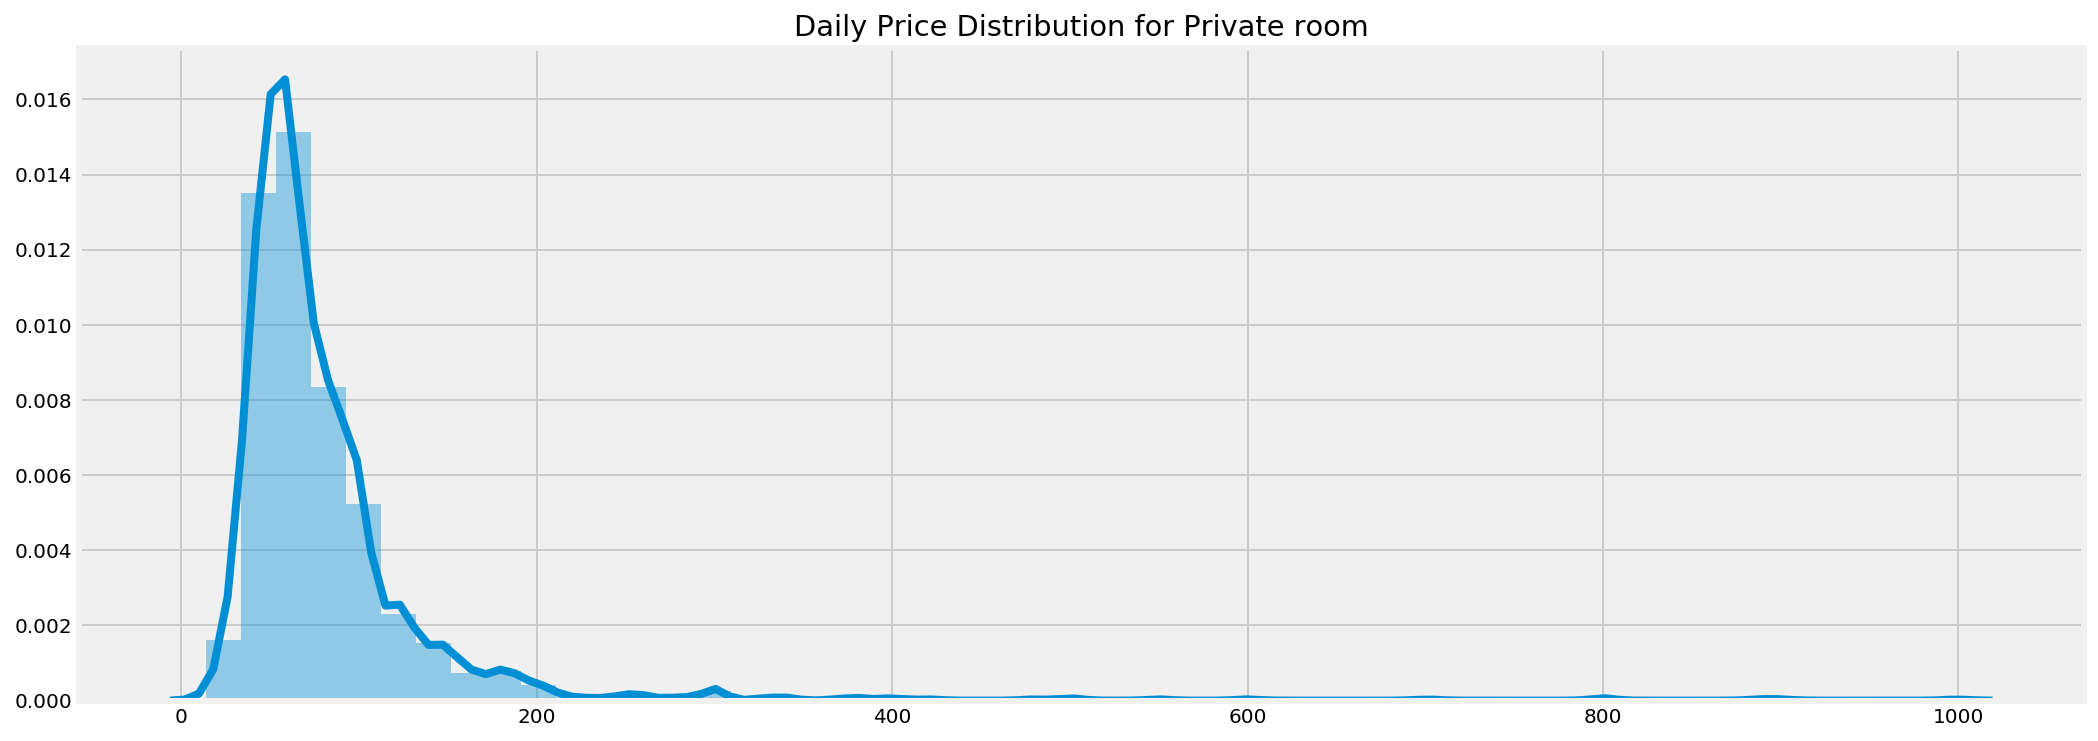

In [48]:
# Distribution of price for different room types - Private room

plt.figure(figsize=(16, 6))
sns.distplot(active[active['room_type'] == 'Private room'][['price']])
plt.title('Daily Price Distribution for Private room');

In [ ]:
fig, ax = plt.subplots(1,1)
plt.figure(figsize = (8,4))
barplot = ax.barh(types,count, color = 'mediumspringgreen', height = 0.5, alpha = 0.8)
ax.set(title = 'Counts of Listings of different Room types', ylabel ='Room Types', xlabel='No. of Listings')
barplot[2].set_color('darkgreen')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
fig.set_facecolor('white')
ax.set_facecolor('white')

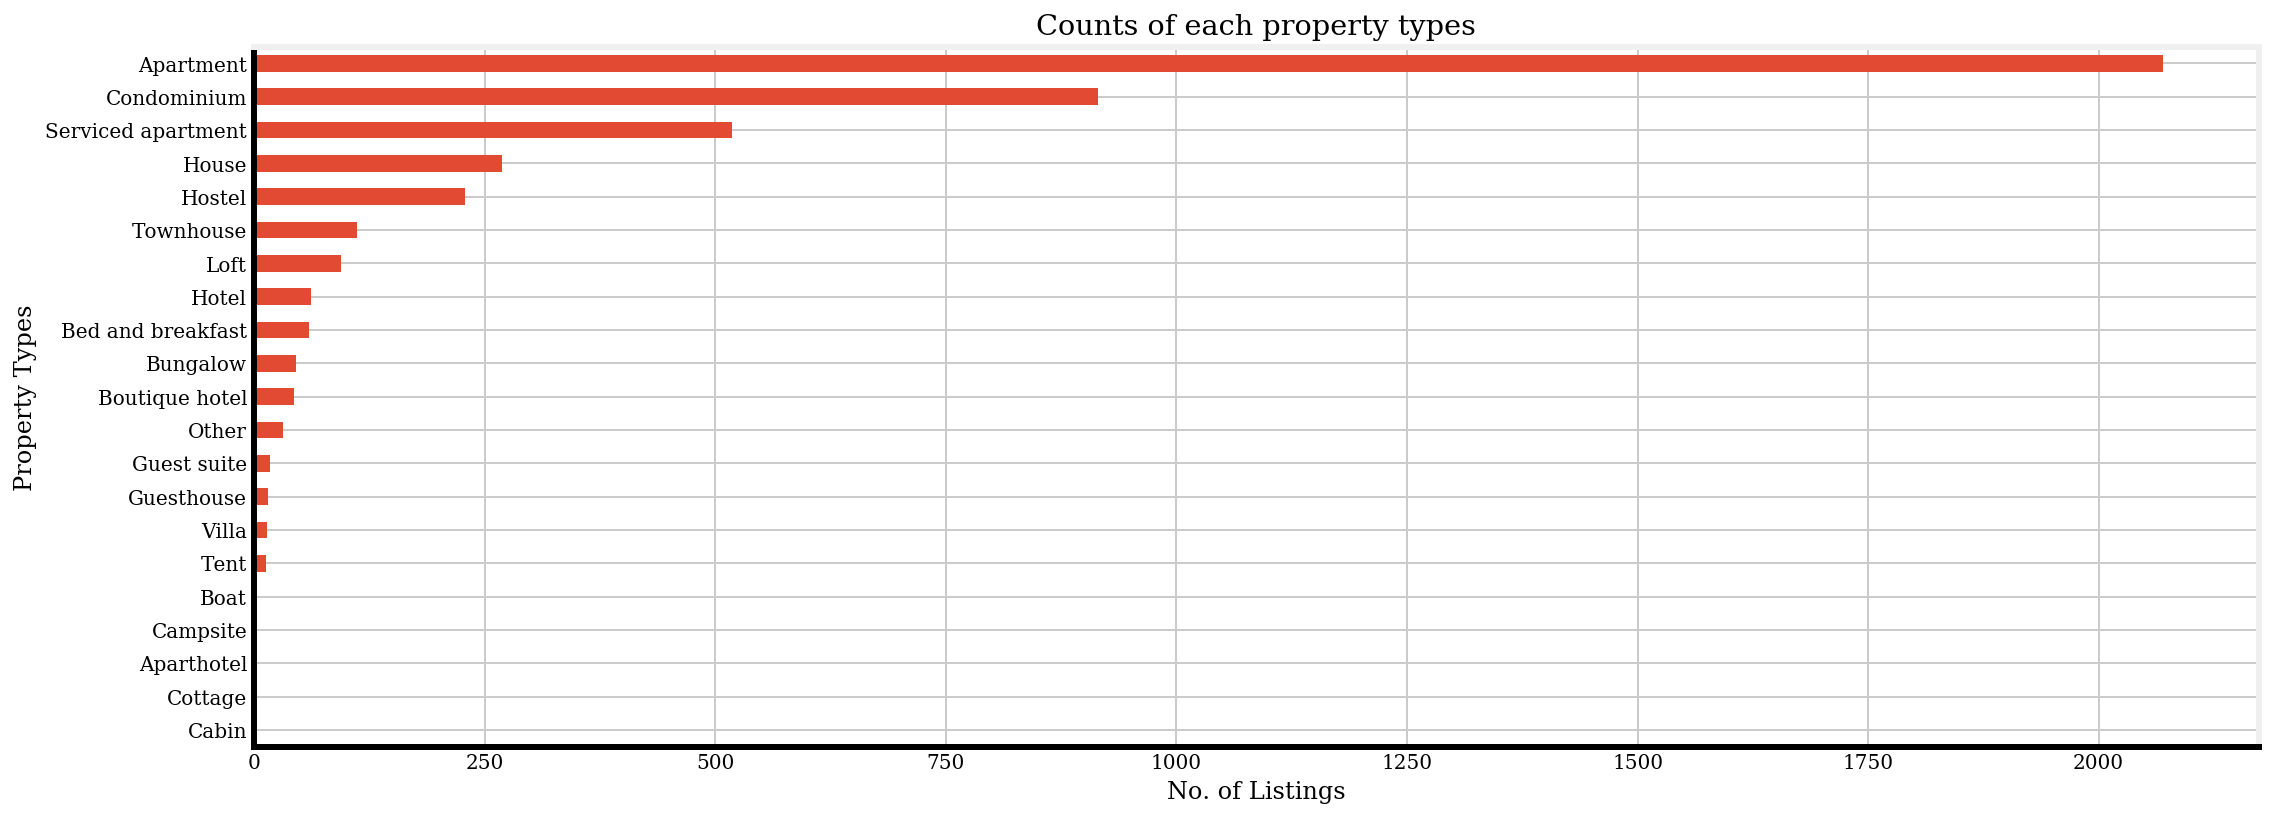

<Figure size 576x288 with 0 Axes>

In [95]:
# Plot distribution of number of guests for private room

fig, ax = plt.subplots(1,1)
plt.style.use('ggplot')
plt.figure(figsize = (8,4))
active['property_type'].value_counts().sort_values(ascending=True).plot(ax=ax, kind='barh', figsize=(16, 6))
ax.set(title = 'Counts of each property types', ylabel ='Property Types', xlabel='No. of Listings')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
fig.set_facecolor('white')
ax.set_facecolor('white')

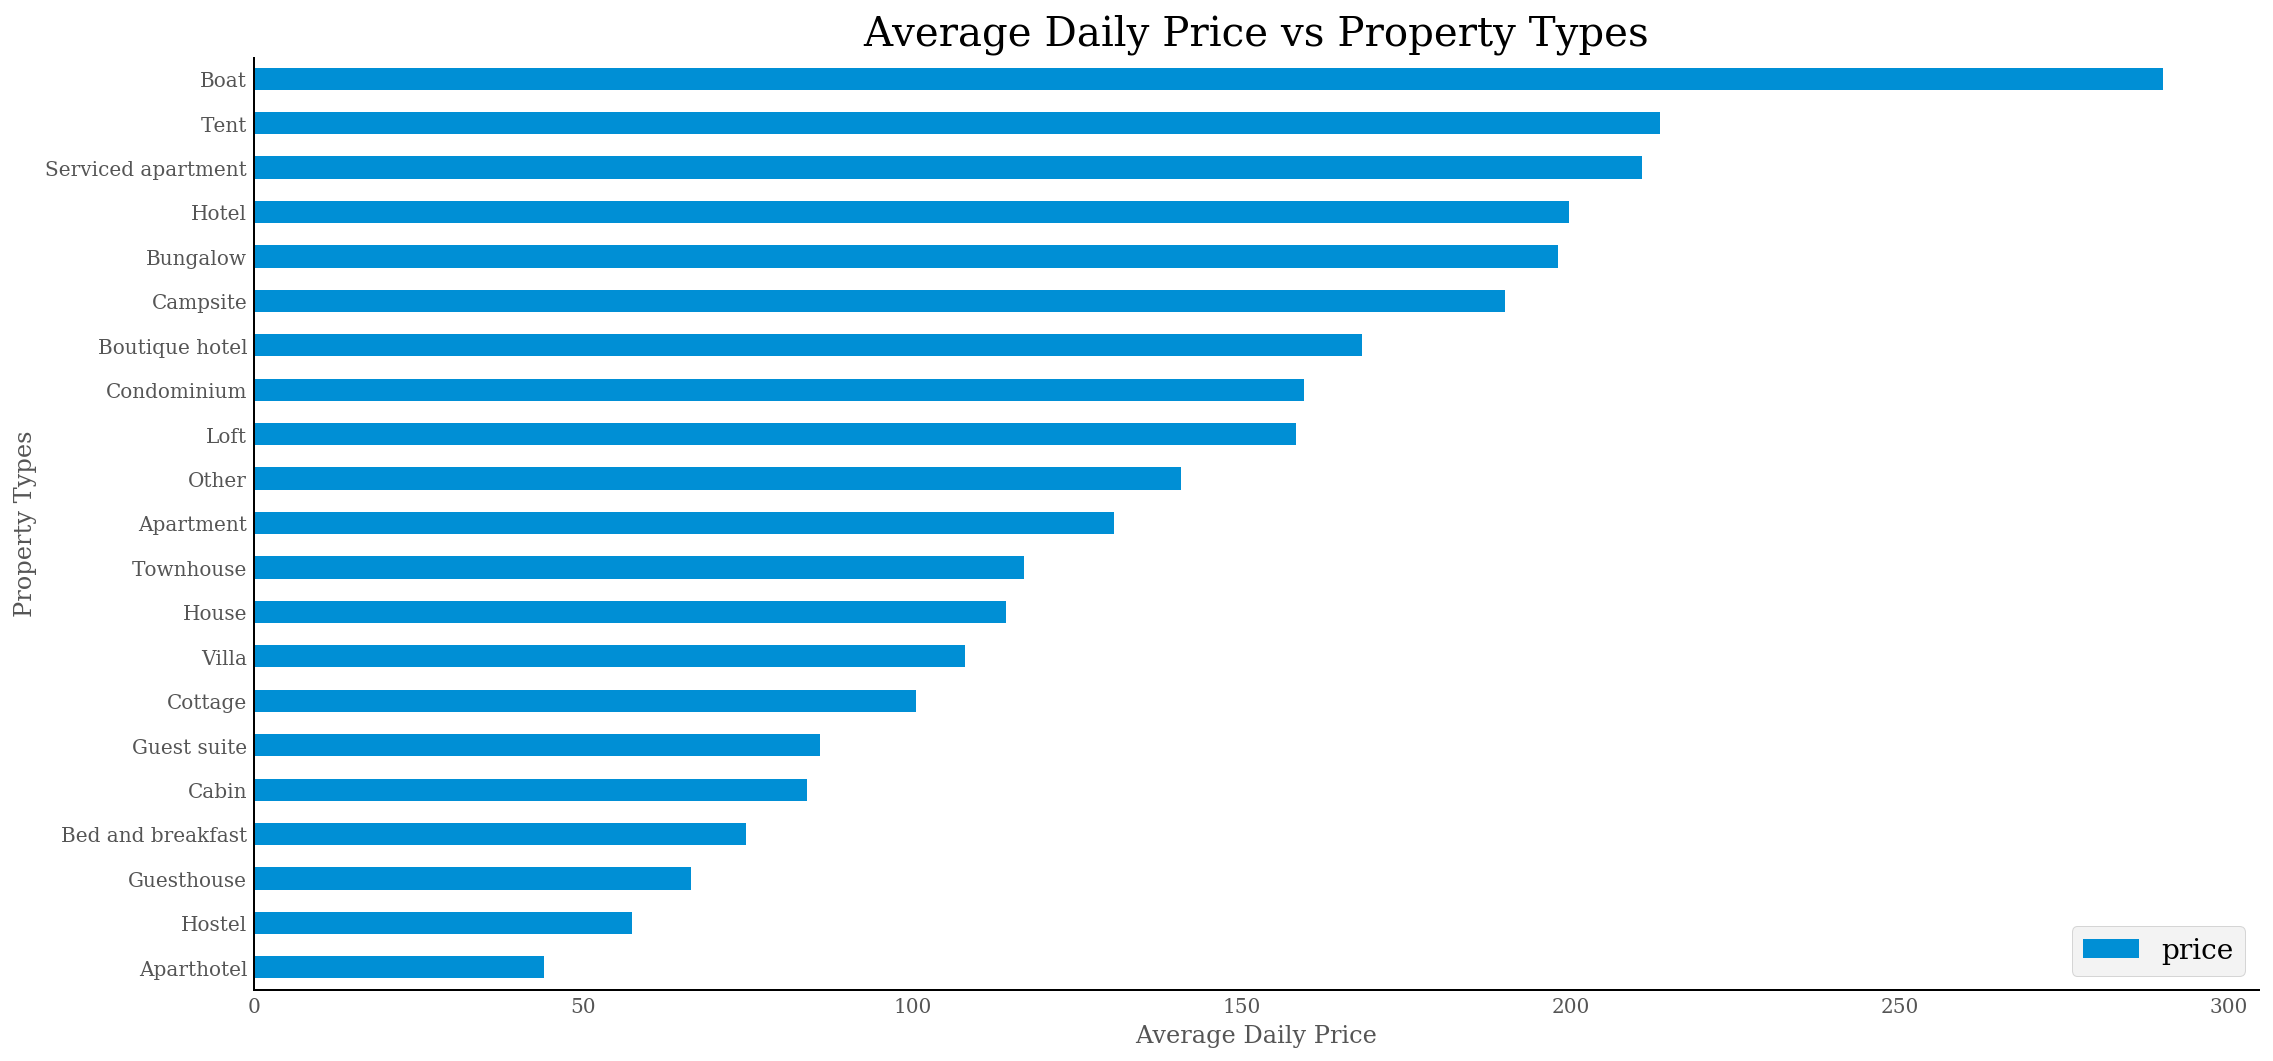

<Figure size 576x288 with 0 Axes>

In [113]:
# Plot average price vs property type

fig, ax = plt.subplots(1,1)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,4))
active[['property_type','price']].groupby(by='property_type').mean().sort_values(by='price', ascending=True).plot(ax = ax,kind='barh', figsize=(16,8))
ax.set(title = 'Average Daily Price vs Property Types', ylabel ='Property Types', xlabel='Average Daily Price')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
fig.set_facecolor('white')
ax.set_facecolor('white')

## Locations / Neighbourhood

### Average Price per Night

In [51]:
# Average price across different neighbourhoods

active[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').mean().sort_values(by='price',ascending=False)

price
neighbourhood_cleansed              
Southern Islands         1163.500000
Marina South              420.000000
Orchard                   263.191489
Downtown Core             231.854962
Museum                    213.309524
Newton                    174.736264
Novena                    171.430712
Tanglin                   171.352518
River Valley              153.725000
Singapore River           150.396694
Bukit Merah               145.989583
Marine Parade             144.178295
Rochor                    142.514019
Central Water Catchment   141.333333
Kallang                   136.926789
Geylang                   136.126667
Clementi                  128.282609
Bedok                     119.051887
Outram                    116.564516
Queenstown                115.250000
Toa Payoh                 105.518519
Jurong East               103.520000
Woodlands                  99.966667
Hougang                    95.587302
Serangoon                  95.068182
Bukit Timah                91.839506
Tampines                   90.491228
Pasir Ris                  87.655172
Bishan                     85.185185
Ang Mo Kio                 85.047619
Yishun                     82.894737
Choa Chu Kang              81.575758
Jurong West                78.540816
Bukit Panjang              73.333333
Punggol                    68.640000
Sembawang                  66.500000
Bukit Batok                64.724138
Sengkang                   51.952381
Sungei Kadut               49.000000
Mandai                     43.000000
Western Water Catchment    41.000000

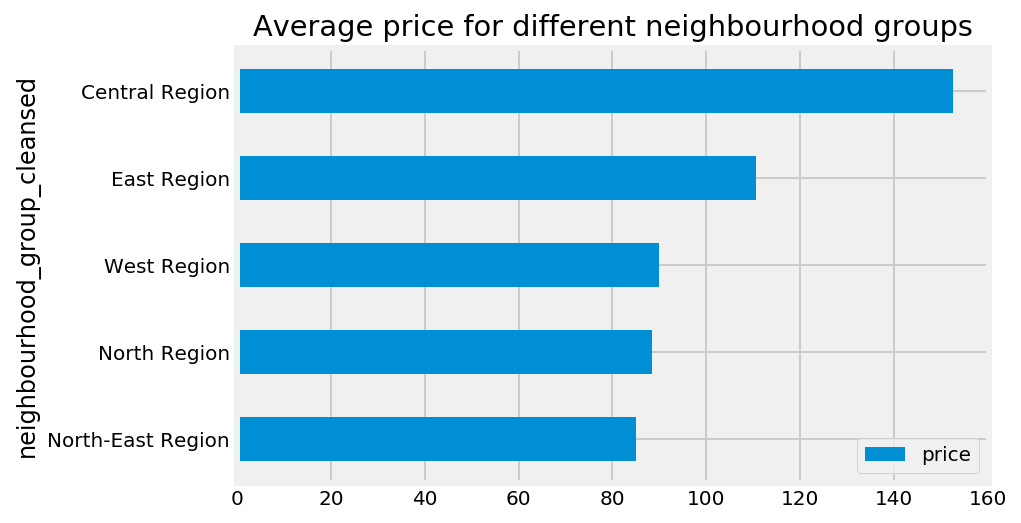

In [52]:
# Average price across different neighbourhood groups

active[['neighbourhood_group_cleansed','price']].groupby('neighbourhood_group_cleansed').mean().sort_values(by='price',ascending=True).plot(kind='barh')
plt.title('Average price for different neighbourhood groups');

In [1]:
active[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').mean()

NameError: name 'active' is not defined

### Number of listings / Popularity

In [53]:
# Find 'activeness' / popularity of neighbourhood groups based on reviews per listing (over last 12 months)

    # Create dataframe with number of reviews over last 12 months
a = active[['neighbourhood_group_cleansed','number_of_reviews_ltm']].groupby(by='neighbourhood_group_cleansed').sum().sort_values(by='number_of_reviews_ltm', ascending=False)

    # Create dataframe with number of active listings 
b = active[['neighbourhood_group_cleansed','id']].groupby(by='neighbourhood_group_cleansed').count().sort_values(by='id', ascending=False)

    # Merge 2 dataframes
c = pd.merge(a,b, on='neighbourhood_group_cleansed')

    # Calculate the number of reviews per listing
c['review/listing'] = c['number_of_reviews_ltm'] / c['id']

    # Retreive the top neighbourhood groups
c.sort_values(by='review/listing', ascending=False)

number_of_reviews_ltm    id  review/listing
neighbourhood_group_cleansed                                             
East Region                                    3650   298       12.248322
North-East Region                              1856   174       10.666667
Central Region                                36695  3698        9.922931
North Region                                    549    76        7.223684
West Region                                    1335   272        4.908088

In [54]:
# Find 'activeness' / popularity of neighbourhoods based on reviews (over last 12 months)

    # Create dataframe with number of reviews over last 12 months
a = active[['neighbourhood_cleansed','number_of_reviews_ltm']].groupby(by='neighbourhood_cleansed').sum().sort_values(by='number_of_reviews_ltm', ascending=False)

    # Create dataframe with number of active listings 
b = active[['neighbourhood_cleansed','id']].groupby(by='neighbourhood_cleansed').count().sort_values(by='id', ascending=False)

    # Merge 2 dataframes
c = pd.merge(a,b, on='neighbourhood_cleansed')

    # Calculate the number of reviews per listing
c['review/listing'] = c['number_of_reviews_ltm'] / c['id']

    # Retreive the top neighbourhoods
c.sort_values(by='review/listing', ascending=False)

number_of_reviews_ltm   id  review/listing
neighbourhood_cleansed                                             
Sungei Kadut                               122    3       40.666667
Sengkang                                   409   21       19.476190
Tampines                                  1051   57       18.438596
Pasir Ris                                  509   29       17.551724
Marine Parade                             2008  129       15.565891
Western Water Catchment                     15    1       15.000000
Museum                                     592   42       14.095238
Rochor                                    4350  321       13.551402
Central Water Catchment                     71    6       11.833333
Geylang                                   6956  600       11.593333
River Valley                              2730  240       11.375000
Serangoon                                  485   44       11.022727
Punggol                                    270   25       10.800000
Newton                                     952   91       10.461538
Tanglin                                   1431  139       10.294964
Downtown Core                             2636  262       10.061069
Outram                                    3111  310       10.035484
Bedok                                     2090  212        9.858491
Orchard                                    901   94        9.585106
Bukit Merah                               1724  192        8.979167
Toa Payoh                                  478   54        8.851852
Hougang                                    541   63        8.587302
Choa Chu Kang                              271   33        8.212121
Kallang                                   4702  601        7.823627
Novena                                    2088  267        7.820225
Yishun                                     147   19        7.736842
Ang Mo Kio                                 151   21        7.190476
Bishan                                     186   27        6.888889
Bukit Timah                                549   81        6.777778
Jurong East                                292   50        5.840000
Bukit Panjang                               84   15        5.600000
Singapore River                            674  121        5.570248
Woodlands                                  158   30        5.266667
Queenstown                                 614  120        5.116667
Jurong West                                424   98        4.326531
Clementi                                   165   46        3.586957
Mandai                                       6    2        3.000000
Marina South                                 3    1        3.000000
Bukit Batok                                 84   29        2.896552
Sembawang                                   45   16        2.812500
Southern Islands                            10    6        1.666667

In [55]:
# Create district labels

    # Create function to extract first 2 digits of zipcode
def district(x):
    try:
        x = x[:2]
    except TypeError:
        x = np.nan
    return x

    # Apply function on zipcode
active['district'] = active['zipcode'].map(lambda x: district(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [56]:
# Find 'activeness' / popularity of zipcodes based on reviews (over last 12 months)

    # Create dataframe with number of reviews over last 12 months
a = active[['district','number_of_reviews_ltm']].groupby(by='district').sum().sort_values(by='number_of_reviews_ltm', ascending=False)

    # Create dataframe with number of active listings 
b = active[['district','id']].groupby(by='district').count().sort_values(by='id', ascending=False)

    # Merge 2 dataframes
c = pd.merge(a,b, on='district')

    # Calculate the number of reviews per listing
c['review/listing'] = c['number_of_reviews_ltm'] / c['id']

    # Retreive the top zipcodes
c.sort_values(by='id', ascending=False)[:20]

number_of_reviews_ltm   id  review/listing
district                                            
23                         4147  364       11.392857
05                         2342  279        8.394265
20                         2323  234        9.927350
38                         2609  216       12.078704
39                         2308  211       10.938389
21                         1944  210        9.257143
32                         1119  189        5.920635
22                         2090  173       12.080925
42                         1896  161       11.776398
16                          905  133        6.804511
18                         1594  128       12.453125
43                         1485  113       13.141593
06                          931   95        9.800000
07                          838   95        8.821053
33                          355   83        4.277108
64                          322   81        3.975309
24                          916   72       12.722222
19                          759   68       11.161765
08                          758   59       12.847458
11                          252   59        4.271186

### Room Types

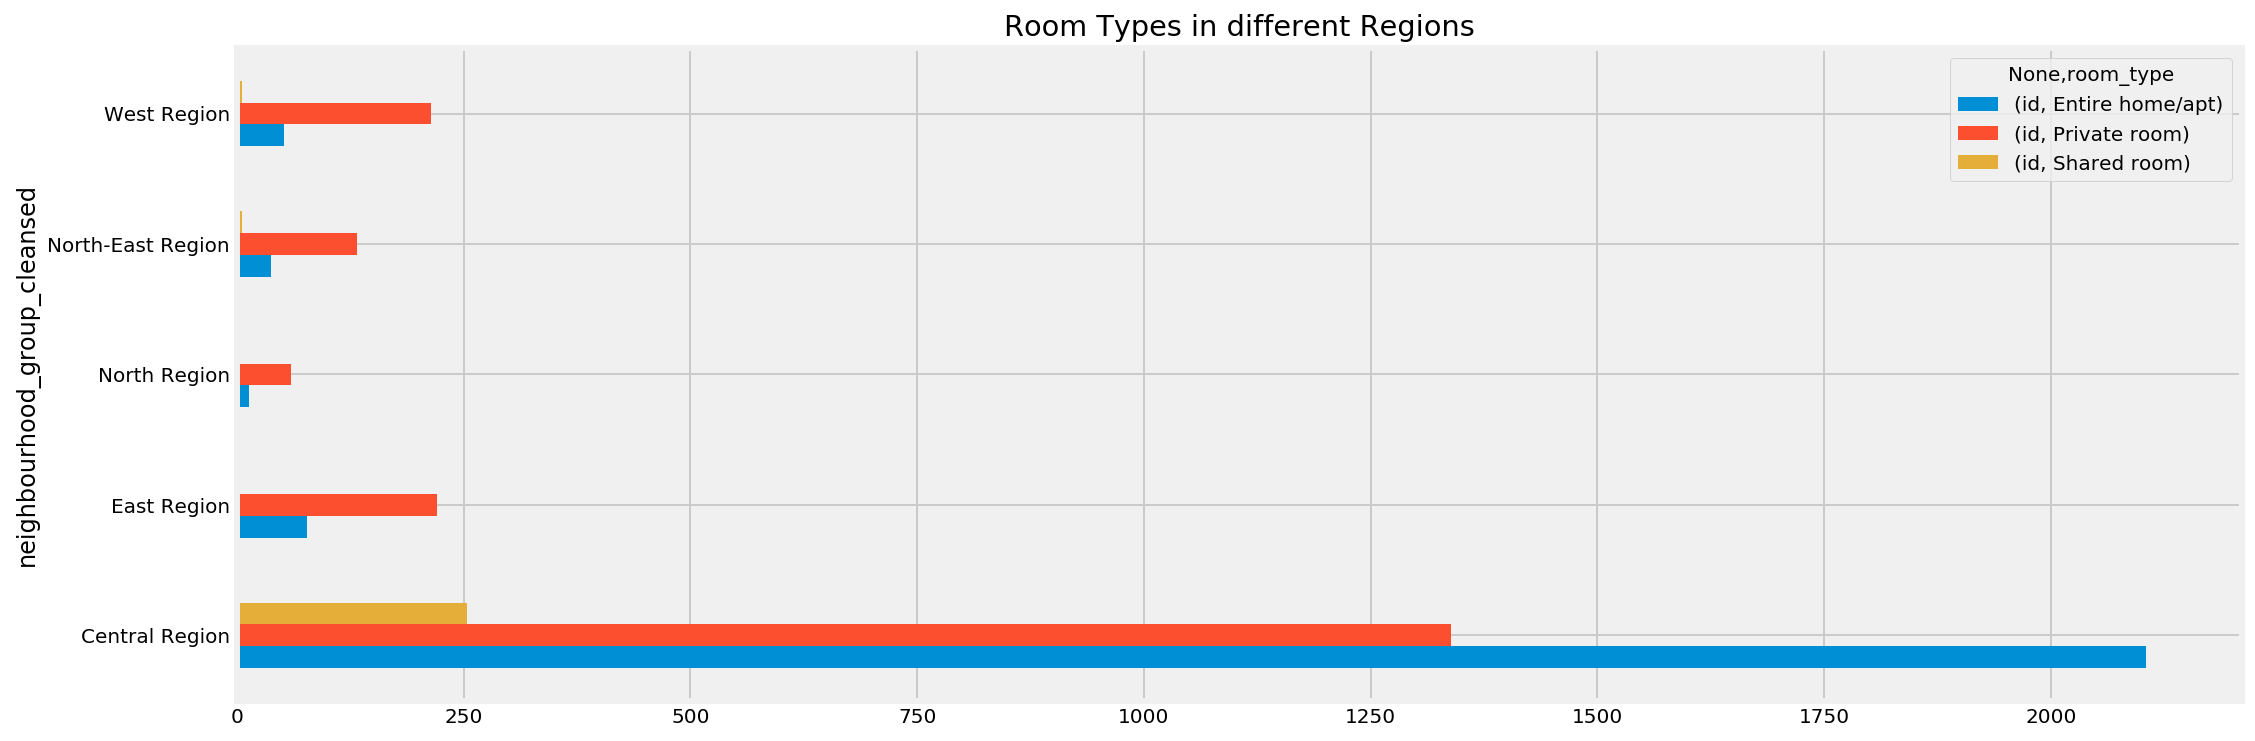

In [57]:
# Listing types across different neighbourhood groups
    
active[['neighbourhood_group_cleansed','room_type','id']].groupby(by=['neighbourhood_group_cleansed','room_type']).count().unstack().plot(kind='barh', figsize=(16, 6))
plt.title('Room Types in different Regions');

### Property Types

### Minimum Nights Requirement

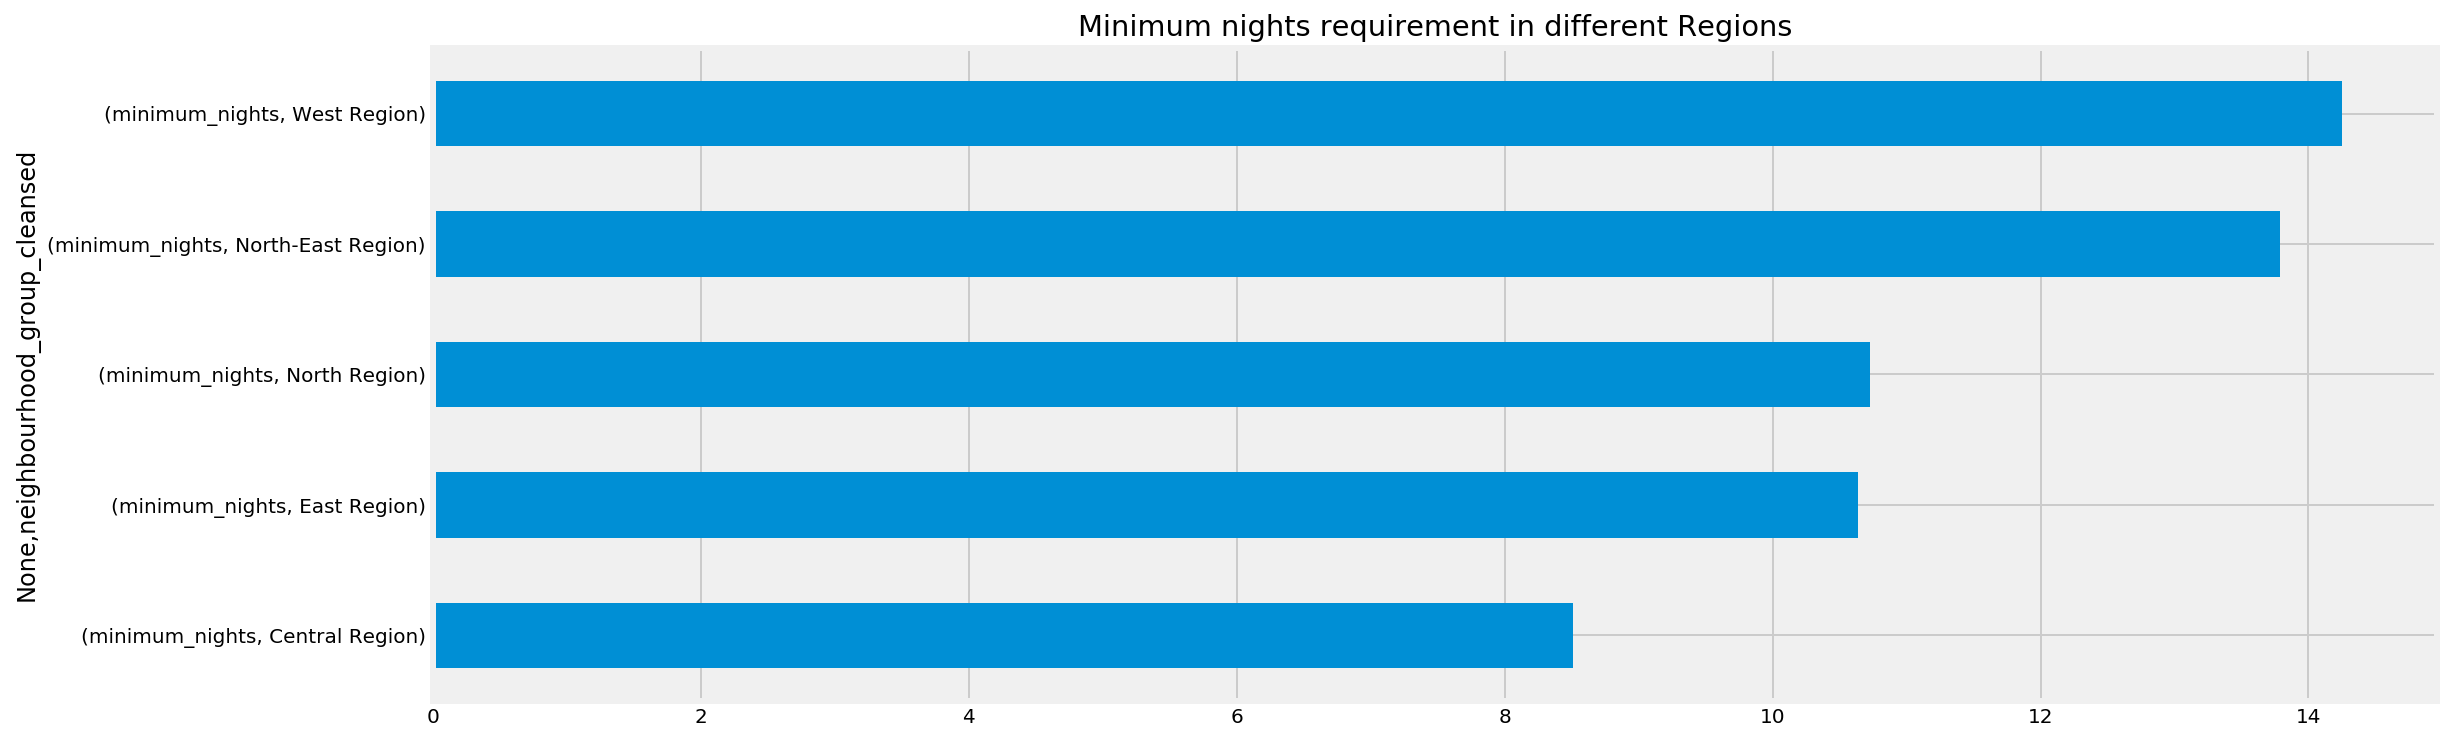

In [58]:
# Minimum nights across different neighbourhood groups
    
active[['neighbourhood_group_cleansed','minimum_nights']].groupby(by=['neighbourhood_group_cleansed']).mean().unstack().plot(kind='barh', figsize=(16, 6))
plt.title('Minimum nights requirement in different Regions');

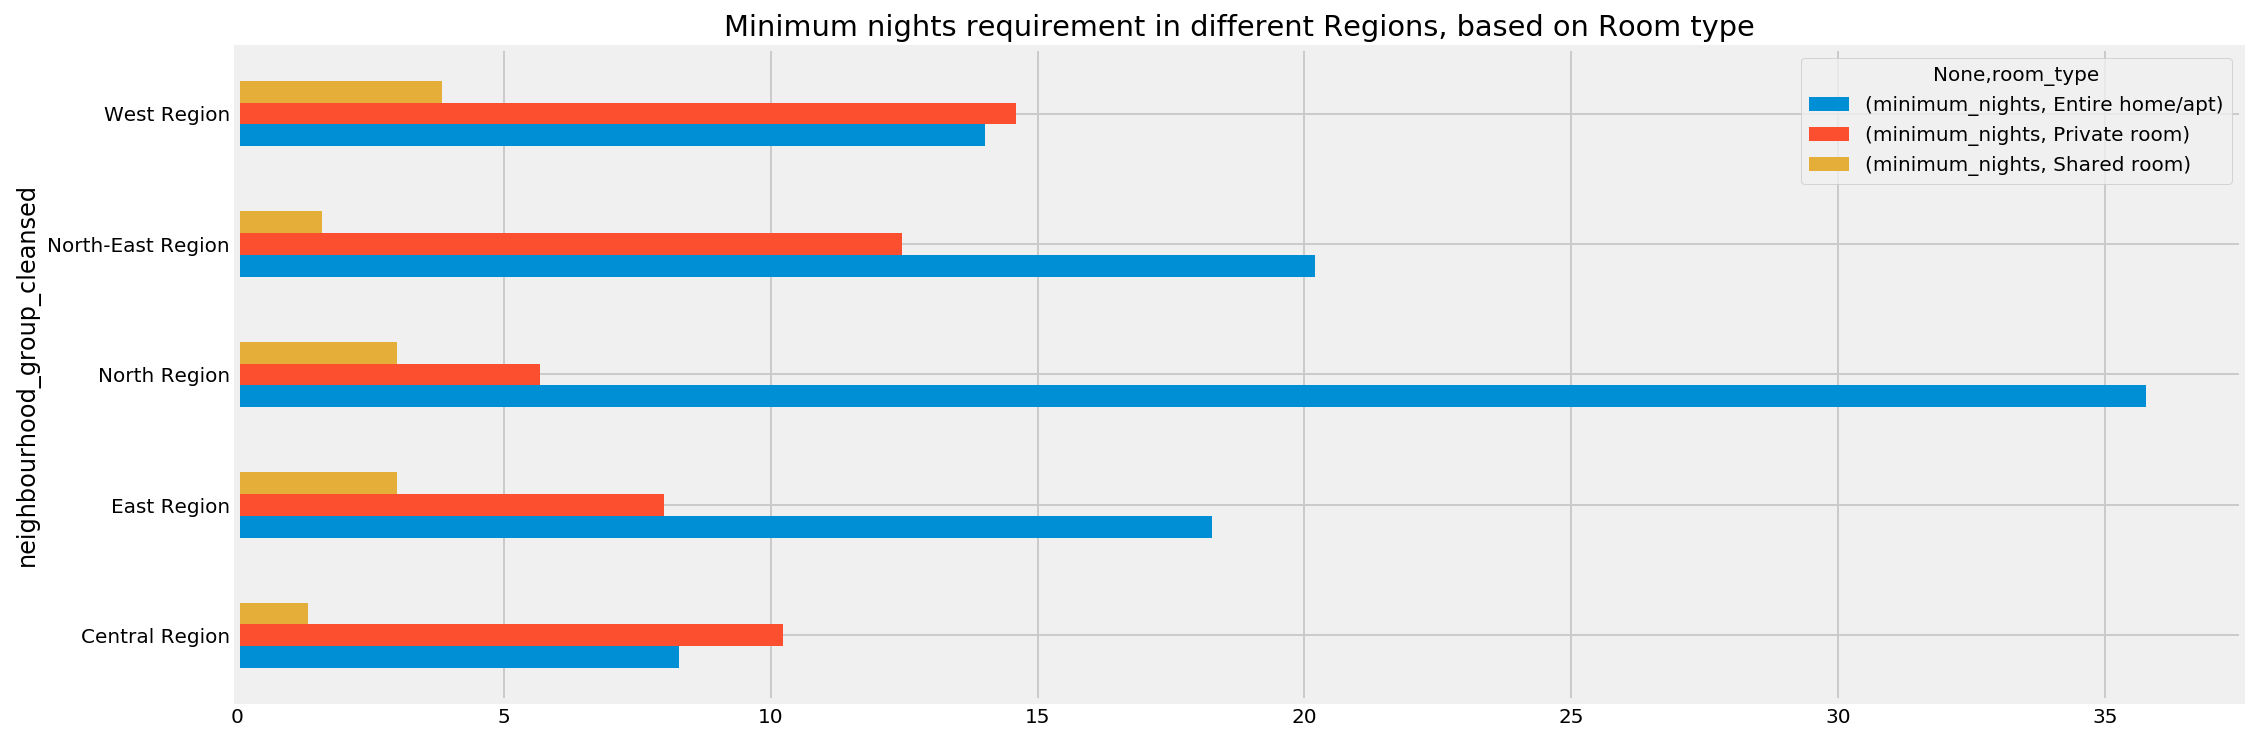

In [59]:
# Minimum nights across different neighbourhood groups
    
active[['neighbourhood_group_cleansed','room_type','minimum_nights']].groupby(by=['neighbourhood_group_cleansed','room_type']).mean().unstack().plot(kind='barh', figsize=(16, 6))
plt.title('Minimum nights requirement in different Regions, based on Room type');

In [60]:
# Find the most common minimum nights requirement

    # Create function to calculate minimum nights
def min_nights(room_type):
    print('   ')
    print('Most common minimum nights requirement for',room_type)
    print(active[active['room_type'] == room_type]['minimum_nights'].value_counts()[:10])
    
    # Extract minimum nights for different room types
min_nights('Entire home/apt')
min_nights('Private room')
min_nights('Shared room')

   
Most common minimum nights requirement for Entire home/apt
2     490
1     451
3     418
7     185
5     151
6     115
4     105
30     94
10     70
90     58
Name: minimum_nights, dtype: int64
   
Most common minimum nights requirement for Private room
1     719
2     434
3     222
18    136
5      99
90     92
4      52
7      45
30     39
6      19
Name: minimum_nights, dtype: int64
   
Most common minimum nights requirement for Shared room
1    227
2     21
5      9
7      7
3      3
6      1
4      1
Name: minimum_nights, dtype: int64


In [61]:
# Find the most common minimum nights requirement per neighbourhood

    # Create function to calculate minimum nights
def min_nights_neighbourhood(neighbourhood,room_type):
    print('   ')
    print('Most common minimum nights requirement for',neighbourhood,room_type)
    print(active[(active['neighbourhood_group_cleansed'] == neighbourhood) & (active['room_type'] == room_type)]['minimum_nights'].value_counts()[:5])
    
    # Extract minimum nights for different room types
    
neighbourhood = active['neighbourhood_group_cleansed'].unique()
room_type = active['room_type'].unique()

for room in room_type:
    for area in neighbourhood:
        min_nights_neighbourhood(area,room)

   
Most common minimum nights requirement for East Region Private room
1     89
3     51
2     39
30     8
5      8
Name: minimum_nights, dtype: int64
   
Most common minimum nights requirement for Central Region Private room
1     492
2     314
18    136
3     124
90     71
Name: minimum_nights, dtype: int64
   
Most common minimum nights requirement for North-East Region Private room
1     41
2     35
3     18
5      7
30     5
Name: minimum_nights, dtype: int64
   
Most common minimum nights requirement for West Region Private room
1     64
2     40
5     28
3     25
90    13
Name: minimum_nights, dtype: int64
   
Most common minimum nights requirement for North Region Private room
1     33
6      6
2      6
30     4
3      4
Name: minimum_nights, dtype: int64
   
Most common minimum nights requirement for East Region Entire home/apt
1    18
2    17
3    14
6     6
4     6
Name: minimum_nights, dtype: int64
   
Most common minimum nights requirement for Central Region Entire home/a

In [26]:
active['minimum_nights'].mean()

9.234838424081453

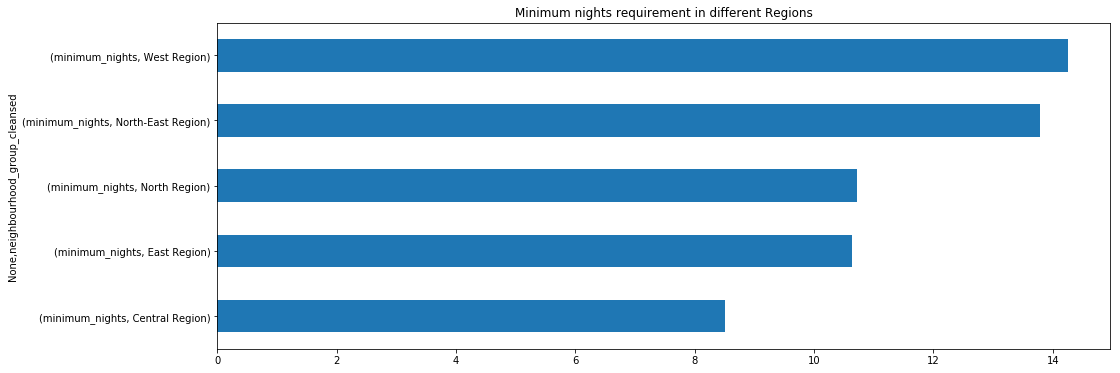

In [27]:
# Listing types across different neighbourhood groups
    
active[['neighbourhood_group_cleansed','minimum_nights']].groupby(by=['neighbourhood_group_cleansed']).mean().unstack().plot(kind='barh', figsize=(16, 6))
plt.title('Minimum nights requirement in different Regions');

In [37]:
sorted([1,4,6,8,2,4,6])

[1, 2, 4, 4, 6, 6, 8]

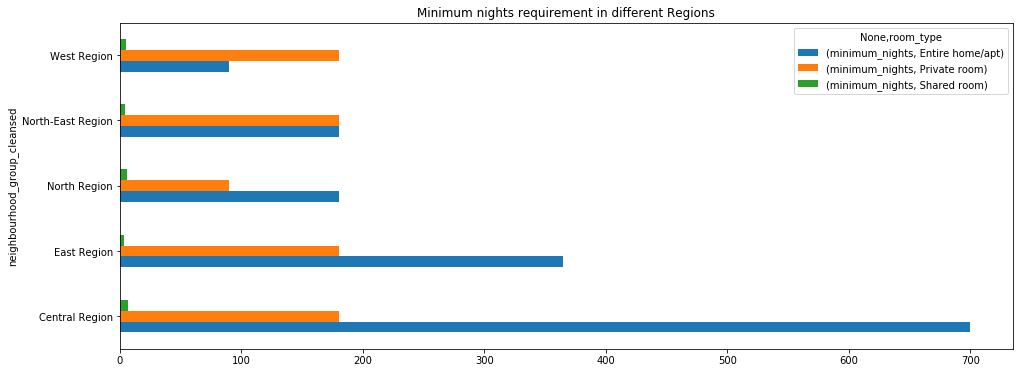

In [33]:
# Listing types across different neighbourhood groups
    
active[['neighbourhood_group_cleansed','room_type','minimum_nights']].groupby(by=['neighbourhood_group_cleansed','room_type']).max().unstack().plot(kind='barh', figsize=(16, 6))
plt.title('Minimum nights requirement in different Regions');

# Listing Description

In [64]:
# Check the number of null values for different columns

sglisting[['name','summary','space','description']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8085 entries, 0 to 8089
Data columns (total 4 columns):
name           8085 non-null object
summary        7826 non-null object
space          5896 non-null object
description    7939 non-null object
dtypes: object(4)
memory usage: 315.8+ KB


In [65]:
# Load NLP libraries

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize 
from textblob import TextBlob, Word
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [66]:
# Create function to get frequent words for CountVectorizer / TF-IDF Vectorizer

def get_freq_words(sparse_counts, columns):
    # X_all is a sparse matrix, so sum() returns a 'matrix' datatype ...
    #   which we then convert into a 1-D ndarray for sorting
    word_counts = np.asarray(sparse_counts.sum(axis=0)).reshape(-1)

    # argsort() returns smallest first, so we reverse the result
    largest_count_indices = word_counts.argsort()[::-1]

    # pretty-print the results! Remember to always ask whether they make sense ...
    freq_words = pd.Series(word_counts[largest_count_indices], 
                           index=columns[largest_count_indices])

    return freq_words

In [67]:
stopwords = stop_words.ENGLISH_STOP_WORDS

In [68]:
cvec = CountVectorizer(stop_words=stopwords, ngram_range=(1,1), min_df=50, max_df=0.4)
cvec.fit(sglisting['name'])
df  = pd.DataFrame(cvec.transform(sglisting['name']).todense(),
             columns=cvec.get_feature_names())
columns = np.array(cvec.get_feature_names())

In [69]:
get_freq_words(cvec.transform(sglisting['name']), columns)

room          1796
mrt           1676
near          1210
bedroom       1094
apartment      926
city           838
apt            721
studio         683
spacious       681
orchard        569
condo          568
private        565
2br            480
central        478
cosy           477
bed            446
cozy           444
unit           444
amazing        400
1br            345
new            313
master         306
view           298
cbd            291
walk           289
mins           287
modern         274
singapore      270
suite          254
park           244
              ... 
shophouse       67
valley          66
lovely          66
bath            65
jurong          64
luxurious       62
shared          62
style           61
kallang         61
west            61
india           61
charming        61
convenient      61
sg              60
suites          59
clarke          57
large           57
keng            56
en              56
lebar           55
tg              55
paya        

## Studying POS of Listing Names - Entire home/apt

#### Most commonly used adjectives

In [70]:
# Identifying POS using Textblob
    # Change all text to lower case

name_pos_blob = []

for listing in active[active['room_type'] == 'Entire home/apt']['name']:
    name_pos_blob.append(TextBlob(listing.lower()).tags)
    
# Find more commonly used Adjectives (POS tag - JJ)
    
adjectives_list = []
adjectives_str = ''

for listing in name_pos_blob:
    for tuple in listing:
        if tuple[1] == 'JJ':
            adjectives_list.append(tuple[0])
            adjectives_str = adjectives_str + ' ' + tuple[0]

In [71]:
# Rank the most commonly used adjectives in the listing name

print('The most popular descriptive words used in active listings - Entire home/apt:')
pd.DataFrame(adjectives_list)[0].value_counts()[:20]

The most popular descriptive words used in active listings - Entire home/apt:


spacious     163
central      162
cosy         128
new          117
apt          103
modern        87
@             71
loft          66
entire        65
cozy          43
bright        37
private       34
beautiful     32
quiet         31
nice          30
stylish       30
chinatown     29
serviced      27
high          24
luxurious     24
Name: 0, dtype: int64

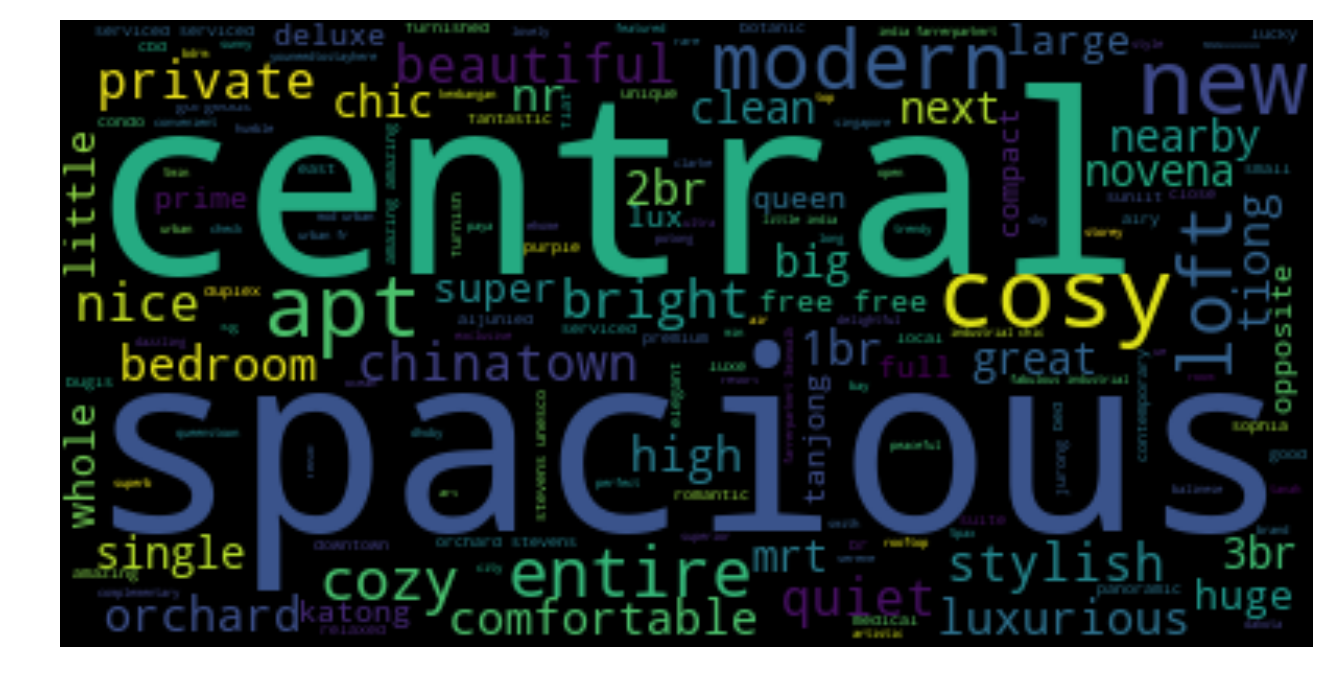

In [72]:
# Generate wordcloud for visualization

wordcloud = WordCloud(background_color=None).generate(adjectives_str)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### Ranking by number of reviews

In [73]:
# Get list of names ranked by number of reviews

listing_names = active[active['room_type'] == 'Entire home/apt'][['number_of_reviews','name']].sort_values(by='number_of_reviews', ascending=True)['name'].values

In [74]:
# Identifying POS using Textblob
    # Change all text to lower case

name_pos_blob = []

for listing in listing_names:
    name_pos_blob.append(TextBlob(listing.lower()).tags)
    
# Find more commonly used Adjectives (POS tag - JJ)
    
rank_adjectives_str = ''

for i,listing in enumerate(name_pos_blob):
    for tuple in listing:
        if tuple[1] == 'JJ':
            rank_adjectives_str = rank_adjectives_str + (i+1)*(' ' + tuple[0])

In [75]:
# Create dataframe to count number of times word appears
count = pd.DataFrame(rank_adjectives_str.split(' '))[0].value_counts()

In [76]:
# Check the top 20 adjectives with weightage of most reviewed/booked listings
count[:20]

central      187967
spacious     181617
cosy         160281
new          146762
apt          122178
modern        98295
entire        70133
loft          69325
bright        54217
@             54213
cozy          46183
nice          41607
chinatown     40491
private       39276
beautiful     37936
quiet         34377
serviced      34329
stylish       31394
nr            30246
luxurious     28214
Name: 0, dtype: int64

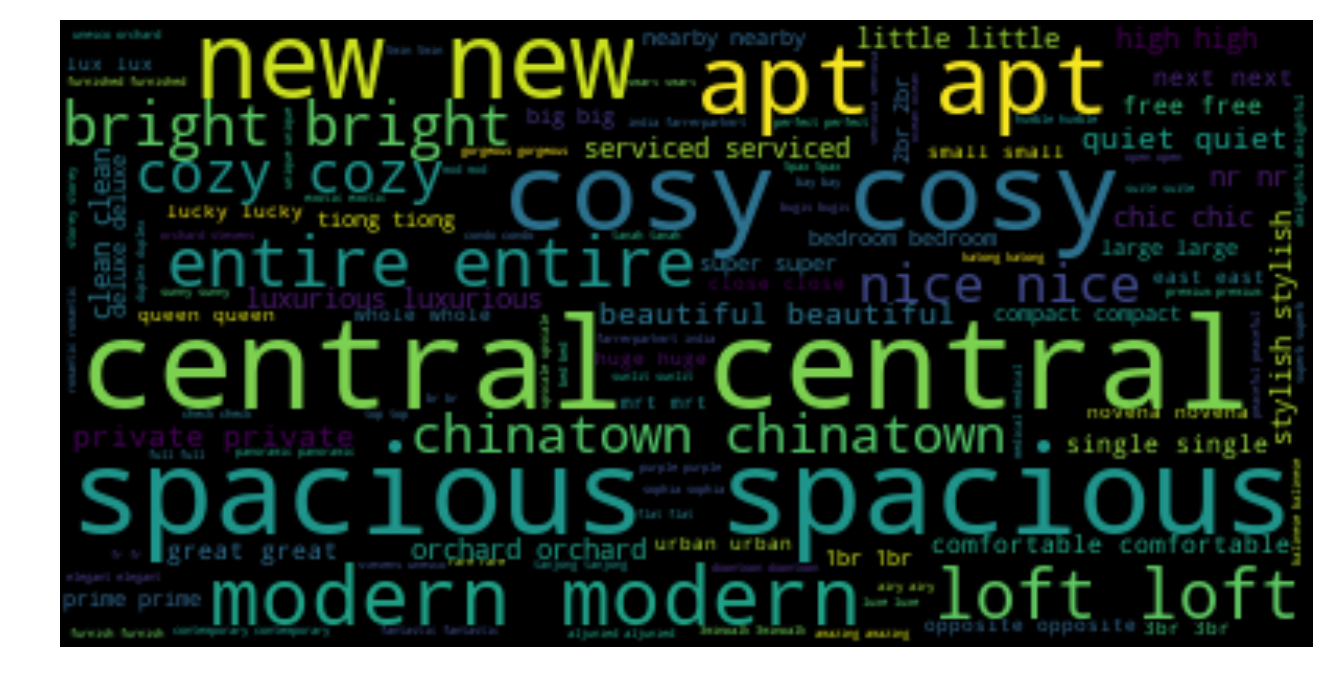

In [77]:
# Generate wordcloud for visualization

wordcloud = WordCloud().generate(rank_adjectives_str)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## Studying POS of Listing Names - Private room

#### Most commonly used adjectives

In [78]:
# Identifying POS using Textblob
    # Change all text to lower case

name_pos_blob = []

for listing in active[active['room_type'] == 'Private room']['name']:
    name_pos_blob.append(TextBlob(listing.lower()).tags)
    
# Find more commonly used Adjectives (POS tag - JJ)
    
adjectives_list = []
adjectives_str = ''

for listing in name_pos_blob:
    for tuple in listing:
        if tuple[1] == 'JJ':
            adjectives_list.append(tuple[0])
            adjectives_str = adjectives_str + ' ' + tuple[0]

In [79]:
# Rank the most commonly used adjectives in the listing name

print('The most popular descriptive words used in active listings - Private room:')
pd.DataFrame(adjectives_list)[0].value_counts()[:20]

The most popular descriptive words used in active listings - Private room:


private      289
cosy          94
spacious      92
common        82
central       68
single        65
new           57
big           44
@             43
clean         42
double        40
queen         35
quiet         33
modern        31
ensuite       30
chinatown     28
cozy          27
nice          25
east          25
high          21
Name: 0, dtype: int64

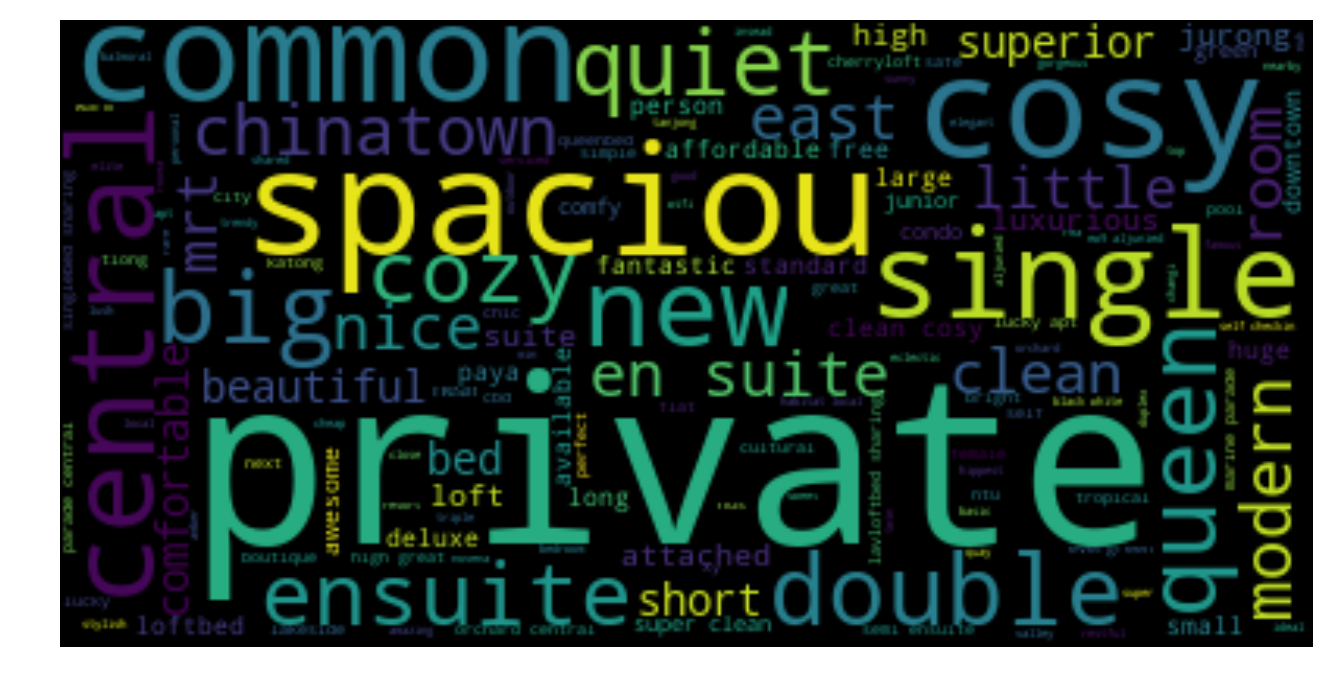

In [80]:
# Generate wordcloud for visualization

wordcloud = WordCloud().generate(adjectives_str)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### Ranking by number of reviews

In [81]:
# Get list of names ranked by number of reviews

listing_names = active[active['room_type'] == 'Private room'][['number_of_reviews','name']].sort_values(by='number_of_reviews', ascending=True)['name'].values

In [82]:
# Identifying POS using Textblob
    # Change all text to lower case

name_pos_blob = []

for listing in listing_names:
    name_pos_blob.append(TextBlob(listing.lower()).tags)
    
# Find more commonly used Adjectives (POS tag - JJ)
    
rank_adjectives_str = ''

for i,listing in enumerate(name_pos_blob):
    for tuple in listing:
        if tuple[1] == 'JJ':
            rank_adjectives_str = rank_adjectives_str + (i+1)*(' ' + tuple[0])

In [83]:
# Create dataframe to count number of times word appears
count = pd.DataFrame(rank_adjectives_str.split(' '))[0].value_counts()

In [84]:
# Check the top 20 adjectives with weightage of most reviewed/booked listings
count[:20]

private      287760
cosy         110547
spacious     107115
central       64727
common        64371
single        58100
new           57752
clean         47999
big           43595
@             41447
double        39599
quiet         39193
queen         33035
cozy          32550
modern        30482
nice          29422
chinatown     29212
ensuite       28347
en-suite      26789
high          22753
Name: 0, dtype: int64

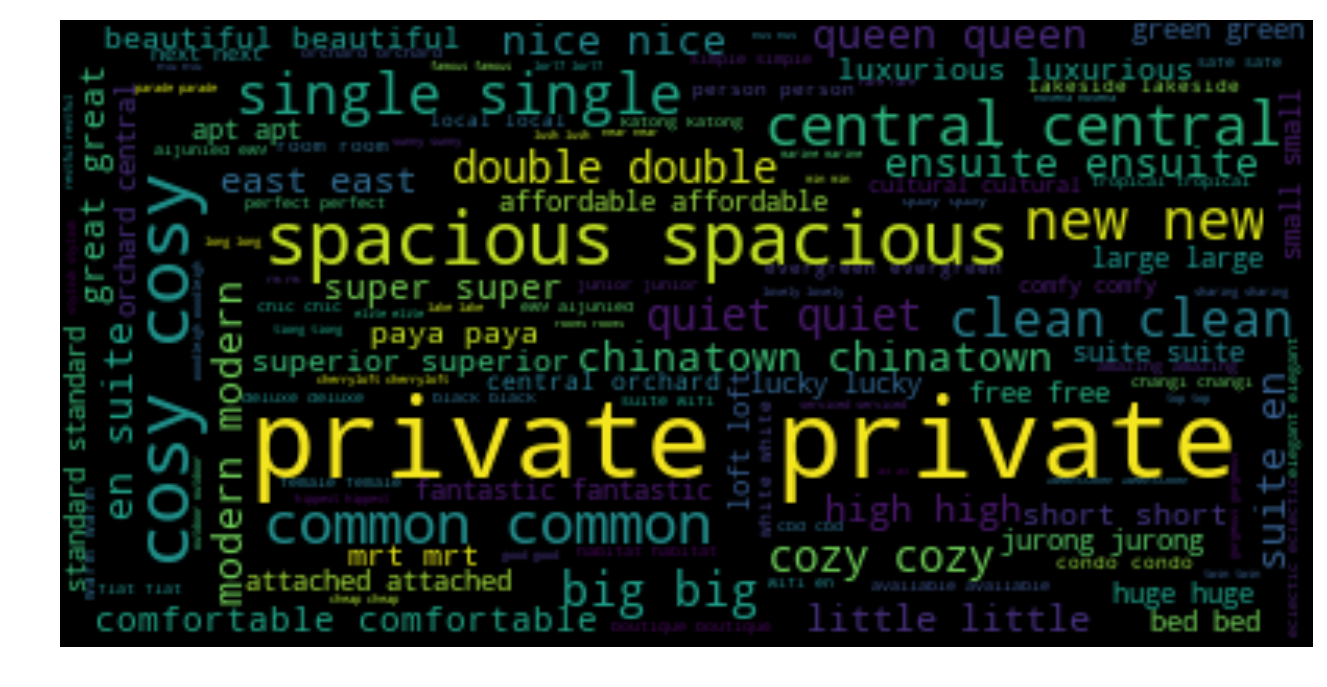

In [85]:
# Generate wordcloud for visualization

wordcloud = WordCloud().generate(rank_adjectives_str)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## Studying POS of Listing Names - Shared room

#### Most commonly used adjectives

In [86]:
# Identifying POS using Textblob
    # Change all text to lower case

name_pos_blob = []

for listing in active[active['room_type'] == 'Shared room']['name']:
    name_pos_blob.append(TextBlob(listing.lower()).tags)
    
# Find more commonly used Adjectives (POS tag - JJ)
    
adjectives_list = []
adjectives_str = ''

for listing in name_pos_blob:
    for tuple in listing:
        if tuple[1] == 'JJ':
            adjectives_list.append(tuple[0])
            adjectives_str = adjectives_str + ' ' + tuple[0]

In [87]:
# Rank the most commonly used adjectives in the listing name

print('The most popular descriptive words used in active listings - Shared room:')
pd.DataFrame(adjectives_list)[0].value_counts()[:20]

The most popular descriptive words used in active listings - Shared room:


single               52
mixed                52
female               28
new                  15
cosy                 13
little               11
bed                  10
queen                 9
in-cabin              9
chinatown             7
double                7
available             7
private               6
clean                 5
unique                4
@                     4
triple-sharing        4
bed/shared            4
citycentre-female     3
kampong               3
Name: 0, dtype: int64

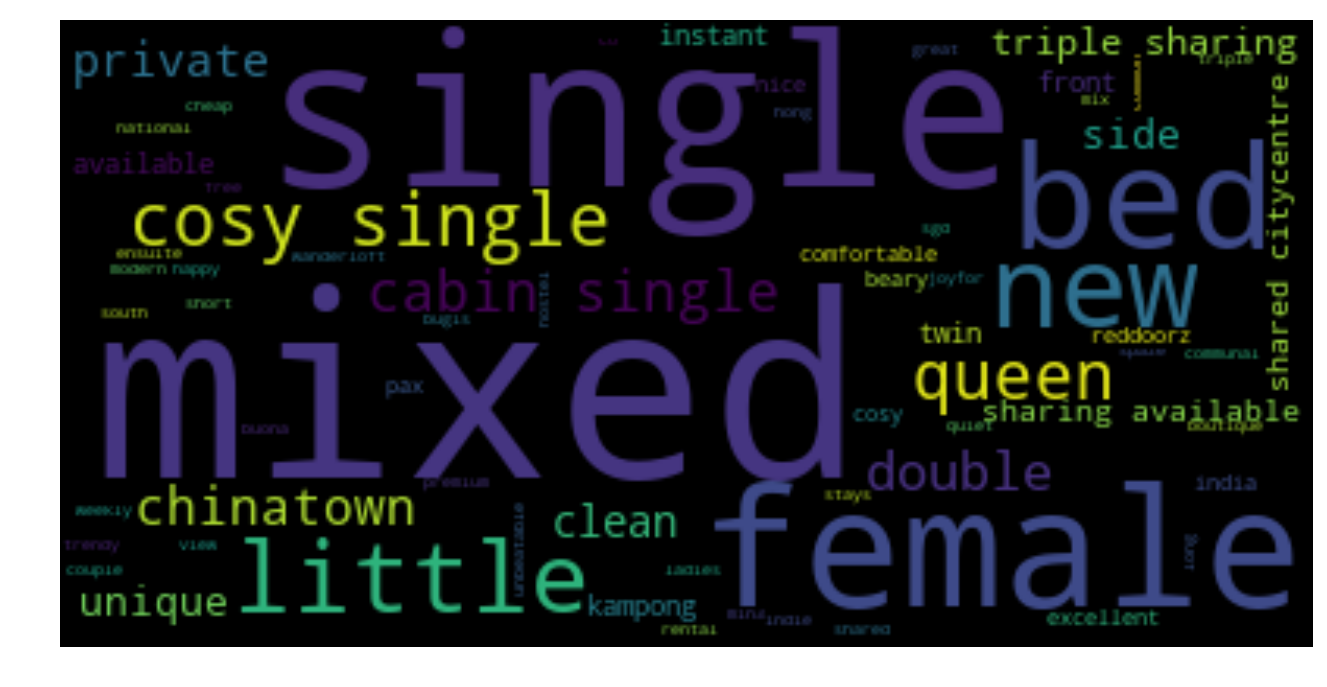

In [88]:
# Generate wordcloud for visualization

wordcloud = WordCloud().generate(adjectives_str)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

### Ranking by number of reviews

In [89]:
# Get list of names ranked by number of reviews

listing_names = active[active['room_type'] == 'Shared room'][['number_of_reviews','name']].sort_values(by='number_of_reviews', ascending=True)['name'].values

In [90]:
# Identifying POS using Textblob
    # Change all text to lower case

name_pos_blob = []

for listing in listing_names:
    name_pos_blob.append(TextBlob(listing.lower()).tags)
    
# Find more commonly used Adjectives (POS tag - JJ)
    
rank_adjectives_str = ''

for i,listing in enumerate(name_pos_blob):
    for tuple in listing:
        if tuple[1] == 'JJ':
            rank_adjectives_str = rank_adjectives_str + (i+1)*(' ' + tuple[0])

In [91]:
# Create dataframe to count number of times word appears
count = pd.DataFrame(rank_adjectives_str.split(' '))[0].value_counts()

In [92]:
# Check the top 20 adjectives with weightage of most reviewed/booked listings
count[:20]

single               8756
mixed                6033
female               3117
cosy                 2532
new                  2112
queen                1009
private               999
little                988
in-cabin              978
bed/shared            963
chinatown             929
clean                 871
bed                   822
citycentre-female     723
front/side            710
available             676
double                622
unique                621
instant               612
kampong               575
Name: 0, dtype: int64

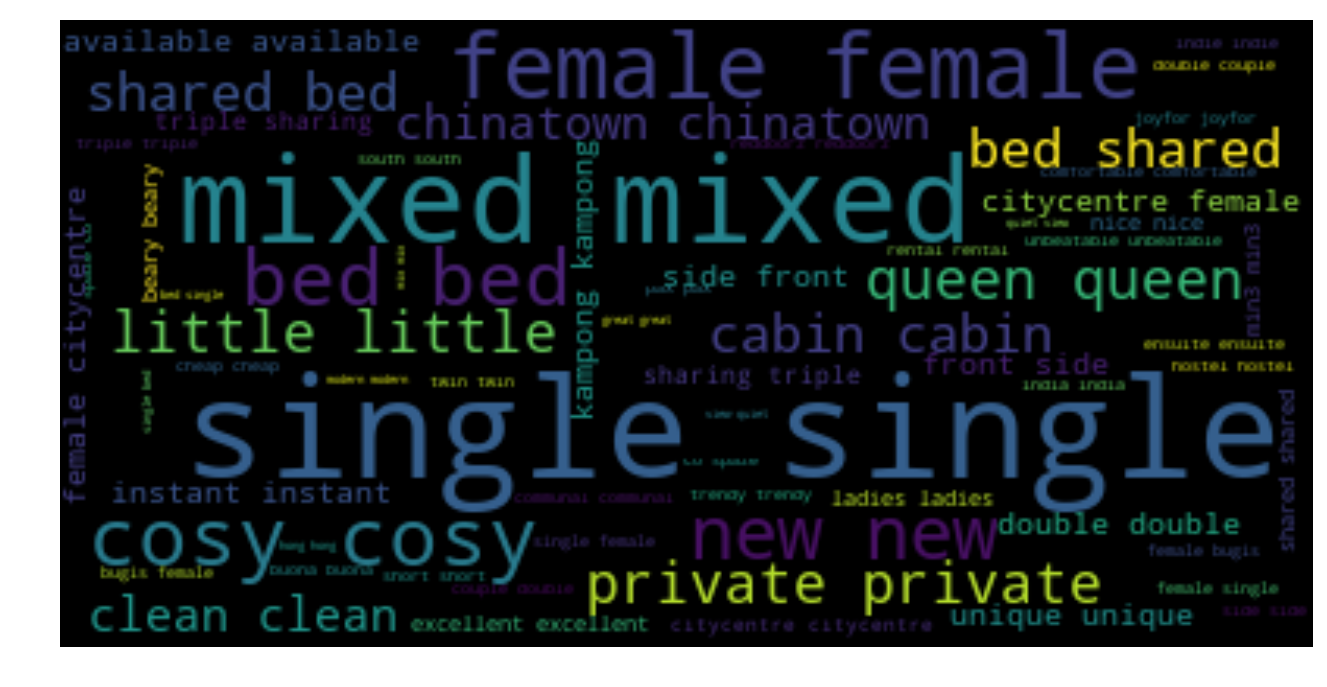

In [93]:
# Generate wordcloud for visualization

wordcloud = WordCloud().generate(rank_adjectives_str)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## Check if possible to get size information from listing description

In [94]:
# Import Regex library
import re

In [95]:
size_list = []

for listing in active['space']:
    try:
        if re.findall('...[0-9][0-9].sq..',listing):
            size_list.append(re.findall('...[0-9][0-9].sq......',listing))
        elif re.findall('...[0-9].sq..',listing):
            size_list.append(re.findall('...[0-9].sq......',listing))
        else:
            size_list.append('No info')
    except TypeError:
        size_list.append(np.nan)

In [96]:
print('No info: ',size_list.count('No info'))
print('Null: ',size_list.count(np.nan))
print('With info: ',len(size_list)-size_list.count('No info')-size_list.count(np.nan))

No info:  3329
Null:  886
With info:  303


From the listing description, I can only retrieve approx 300 listings with size of apartment in their description. This will not be sufficient to study the size in relation to price or number of bookings.

# Occupancy
# Income per month
# Listings per host


# PCA

# EDA for modelling

In [ ]:
# Text features to clean

'host_about'
'amenities'

In [ ]:
# Features to include in the first round

'host_since' - cleaned
'host_response_time' - get dummy
'host_response_rate' - KIV (many null values)
'host_is_superhost' - cleaned
'host_listings_count' - ok
'host_identity_verified' - cleaned
'property_type' - get dummy
'room_type' - get dummy
'accommodates' - KIV (not reflective of price, due to extra guest charge)
'bathrooms' - cleaned
'bedrooms' - KIV (too subjective due to studio classification, private room etc)
'beds' - ok
'security_dep_required' - cleaned
'extra_people'- KIV (will be related to total price)
'guests_included' - ok. Use this as assume that guests are smart and will compare price for the number of pax
'minimum_nights' - ok
'number_of_reviews' - ok
'number_of_reviews_ltm' - ok
'last_rev_duration' - cleaned
'review_scores_rating' - cleaned
'review_scores_accuracy' - cleaned
'review_scores_cleanliness' - cleaned
'review_scores_checkin' - cleaned
'review_scores_communication' - cleaned
'review_scores_location' - cleaned
'review_scores_value' - cleaned
'review_scores_present' - ok
'instant_bookable' - cleaned
'cancellation_policy' - get dummy
'require_guest_profile_picture' - cleaned
'require_guest_phone_verification' - cleaned
'reviews_per_month' - ok
'district' - get dummy

#### Clean host_since feature
Find the number of years the host has been on Airbnb

In [99]:
# Extract only year, convert to integer
active['host_since'] = active['host_since'].map(lambda x: int(x[:4]))

# Calculate number of years as host
active['host_since'] = 2019 - active['host_since']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


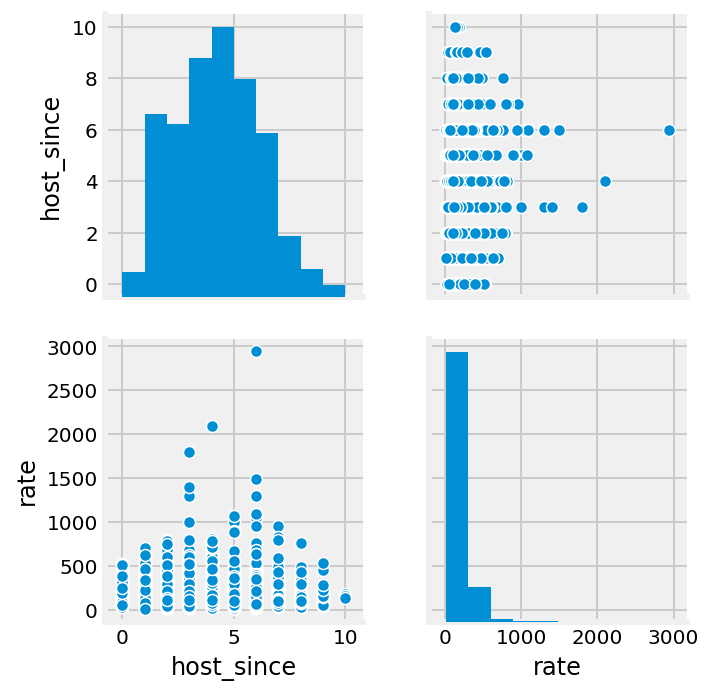

In [339]:
sns.pairplot(active[['host_since','rate']])

#### Clean host_response_time

In [100]:
# Need to get dummies
pd.get_dummies(active['host_response_time'], drop_first=True)[:3]

within a day  within a few hours  within an hour
3             0                   0               1
4             0                   0               1
5             0                   0               1

#### Clean host_response_rate

In [101]:
# Check number of null values
active['host_response_rate'].isnull().sum()

255

#### Clean host_is_superhost

In [102]:
# Create function to clean true & false

def truefalse_label(x):
    if x == 't':
        x=1
    elif x == 'f':
        x=0
    return x

In [103]:
# Convert true/false to 1/0
active['host_is_superhost'] = active['host_is_superhost'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [347]:
active[['host_is_superhost','rate']].groupby(by='host_is_superhost').mean()

rate
host_is_superhost            
0                  158.757416
1                  220.658617

In [ ]:
active[['host_is_superhost','rate','number_of_reviews_ltm','reviews_per_month']].groupby(by='host_is_superhost').mean()

#### Clean host_identity_verified

In [104]:
# Convert true/false to 1/0
active['host_identity_verified'] = active['host_identity_verified'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [349]:
active[['host_identity_verified','rate']].groupby(by='host_identity_verified').mean()

rate
host_identity_verified            
0                       174.092689
1                       163.770216

#### Clean property_type

In [105]:
active['property_type'].value_counts()

Apartment             2070
Condominium            915
Serviced apartment     518
House                  269
Hostel                 229
Townhouse              111
Loft                    94
Hotel                   62
Bed and breakfast       60
Bungalow                45
Boutique hotel          43
Other                   31
Guest suite             17
Guesthouse              15
Villa                   14
Tent                    13
Campsite                 3
Aparthotel               3
Boat                     3
Cottage                  2
Cabin                    1
Name: property_type, dtype: int64

In [106]:
# Reclassify some properties that do not belong to clear categories eto Other
active['property_type'] = active['property_type'].map(lambda x: x.replace('Villa','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Aparthotel','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Campsite','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Tent','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Guest suite','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Guesthouse','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Cottage','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Cabin','Other'))
active['property_type'] = active['property_type'].map(lambda x: x.replace('Boat','Other'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

#### Clean bathrooms

In [107]:
# Checked that the 2 listings with null values have common bathroom
    # Fill na as 0
active['bathrooms'].fillna(0,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Clean beds

As there are only 6 listings with null values for the 'beds' feature, I have checked the listings for the exact number of beds.

In [157]:
# Impute the exact number of beds

active.loc[active[active['beds'].isnull()].index,'beds'] = [2,1,1,1,1,1]

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


#### Clean security_deposit

In [108]:
# Reclassify security deposit into a binary - Required/Not required
# Null values = Security deposit not required, because null is likely because hosts did not check that portion

    # Fill null values with 0.0
active['security_deposit'].fillna(0.0, inplace=True)

    # Reassign values to reclassify
active['security_dep_required'] = active['security_deposit'].map(lambda x: 0 if x == 0.0 else 1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Clean last_review

In [109]:
# Use 20 Apr 2019 to subtract last review date

from datetime import date

active['last_rev_duration'] = '2019-04-20'
active['last_rev_duration'] = pd.to_datetime(active['last_review']) - pd.to_datetime(active['last_rev_duration'])

# Keep the difference as number of months ago for last review

active['last_rev_duration'] = active['last_rev_duration'].astype('timedelta64[M]')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

#### Clean review_scores features

Review scores for listing will only be displayed when the host has received star ratings from at least 3 guests. Hence, this is likely the reason for null values.

To deal with this, I will impute the null values with the median values. The assumption is that when guests do not know the review score, they will take the listing as an average listing. Hence, in this case, I impute with the median score.

At the same time, I will create a new feature with reviews/no reviews to differentiate such listings. 

In [110]:
# Proof that review scores are missing due to insufficient reviews
active[active['review_scores_rating'].isnull()]['number_of_reviews'].value_counts()

1    76
2     6
3     1
Name: number_of_reviews, dtype: int64

In [111]:
# Create new feature - review score/no review score

active['review_scores_present'] = active['review_scores_rating'].map(lambda x: 1 if x >0 else 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
# Impute null values with the median value

active['review_scores_rating'].fillna(active['review_scores_rating'].median(), inplace=True)
active['review_scores_accuracy'].fillna(active['review_scores_accuracy'].median(), inplace=True)
active['review_scores_accuracy'].fillna(active['review_scores_accuracy'].median(), inplace=True)
active['review_scores_cleanliness'].fillna(active['review_scores_cleanliness'].median(), inplace=True)
active['review_scores_checkin'].fillna(active['review_scores_checkin'].median(), inplace=True)
active['review_scores_communication'].fillna(active['review_scores_communication'].median(), inplace=True)
active['review_scores_location'].fillna(active['review_scores_location'].median(), inplace=True)
active['review_scores_value'].fillna(active['review_scores_value'].median(), inplace=True)

__Clean instant_bookable__
<br>
__Clean require_guest_profile_picture__
<br>
__Clean require_guest_phone_verification__

In [113]:
# Convert true/false to 1/0
active['instant_bookable'] = active['instant_bookable'].map(lambda x: truefalse_label(x))
active['require_guest_profile_picture'] = active['require_guest_profile_picture'].map(lambda x: truefalse_label(x))
active['require_guest_phone_verification'] = active['require_guest_phone_verification'].map(lambda x: truefalse_label(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

#### Clean cancellation_policy

The most common policies now are strict_14_with_grace_period, moderate, flexible. The remaining 3 are seldom seen. The super_strict_30 and super_strict_60 are for special circumstances and by invitation only. Hence, I will group the remaining 3 into 1 group - super strict (which is out of the norm). 

In [114]:
active['cancellation_policy'].value_counts()

strict_14_with_grace_period    3111
moderate                        808
flexible                        574
super_strict_30                  23
strict                            1
super_strict_60                   1
Name: cancellation_policy, dtype: int64

In [115]:
active['cancellation_policy'] = active['cancellation_policy'].map(lambda x: x.replace('super_strict_30','super_strict'))
active['cancellation_policy'] = active['cancellation_policy'].map(lambda x: x.replace('super_strict_60','super_strict'))
active['cancellation_policy'] = active['cancellation_policy'].map(lambda x: x.replace('strict','super_strict'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

#### Clean price & cleaning fee
Since listed cleaning fee are mandatory, I will add that to the total nightly price, since savvy guests will definitely check the total price before booking.

In [132]:
# Impute null values with 0 for cleaning fee

active['cleaning_fee'].fillna(0, inplace=True)

In [133]:
active['rate'] = active['price'] + active['cleaning_fee']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Clean neighbourhood_group_cleansed
Whether Central Region

In [372]:
# Create new column for Central Region

active['Central'] = active['neighbourhood_group_cleansed'].map(lambda x: 1 if x=='Central Region' else 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [374]:
# Set up list of predictor varibles to be tested

features_to_test = pd.get_dummies(active[['host_is_superhost','beds','security_dep_required','guests_included',
                           'review_scores_rating','instant_bookable','Central',
                           'property_type','room_type']],drop_first=True)

In [375]:
def linear_reg_test(df_of_features):

    # Dummify variables
    predictor = df_of_features

    # Set up target variable
    target = active['rate']

    # Set up X and y
    X = predictor
    y = target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=10)

    ss = StandardScaler()
    X_train_std = ss.fit_transform(X_train)
    X_test_std = ss.transform(X_test)

    lr = LinearRegression()

    print(features_selected.columns)

    score_r2 = cross_val_score(lr,X_train_std,y_train,cv=5)
    print('Cross_val_scores r2: ', score_r2)
    print('Mean r2: ', np.mean(score_r2))
    print('Standard Deviation r2: ', np.std(score_r2))
    print('   ')

    score_mae = cross_val_score(lr,X_train_std,y_train,cv=5,scoring='neg_mean_absolute_error')
    print('Cross_val_scores mae: ', score_mae)
    print('Mean mae: ', np.mean(score_mae))
    print('Standard Deviation mae: ', np.std(score_mae))


In [376]:
linear_reg_test(features_to_test)

Index(['host_since', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'bathrooms', 'beds', 'security_dep_required',
       'guests_included', 'instant_bookable', 'reviews_per_month',
       'host_response_time', 'property_type', 'room_type',
       'cancellation_policy', 'neighbourhood_cleansed'],
      dtype='object')
Cross_val_scores r2:  [0.46143069 0.34654452 0.53636779 0.48047462 0.49857477]
Mean r2:  0.4646784774359551
Standard Deviation r2:  0.06403750906367266
   
Cross_val_scores mae:  [-57.8848769  -65.55024871 -60.14104643 -58.76589607 -61.12814064]
Mean mae:  -60.69404174964004
Standard Deviation mae:  2.671559271419464


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.


In [321]:
def feature_test(df_of_features):

    # Dummify variables
    predictor = pd.get_dummies(df_of_features, drop_first=True)

    # Set up target variable
    target = active['rate']

    # Set up X and y
    X = predictor
    y = target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=10)

    ss = StandardScaler()
    X_train_std = ss.fit_transform(X_train)
    X_test_std = ss.transform(X_test)

    lr = LinearRegression()

#     print(features_selected.columns)

    score_r2 = cross_val_score(lr,X_train_std,y_train,cv=5)
#     print('Cross_val_scores r2: ', score_r2)
#     print('Mean r2: ', np.mean(score_r2))
#     print('Standard Deviation r2: ', np.std(score_r2))
#     print('   ')

    score_mae = cross_val_score(lr,X_train_std,y_train,cv=5,scoring='neg_mean_absolute_error')
#     print('Cross_val_scores mae: ', score_mae)
#     print('Mean mae: ', np.mean(score_mae))
#     print('Standard Deviation mae: ', np.std(score_mae))
    
    return np.mean(score_mae)

In [334]:
results = []

for i in range(0,60):
    features_selected = features_to_test.iloc[:,:i+1]
    results.append(feature_test(features_selected))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anacon

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to fl

/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converte

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to fl

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to fl

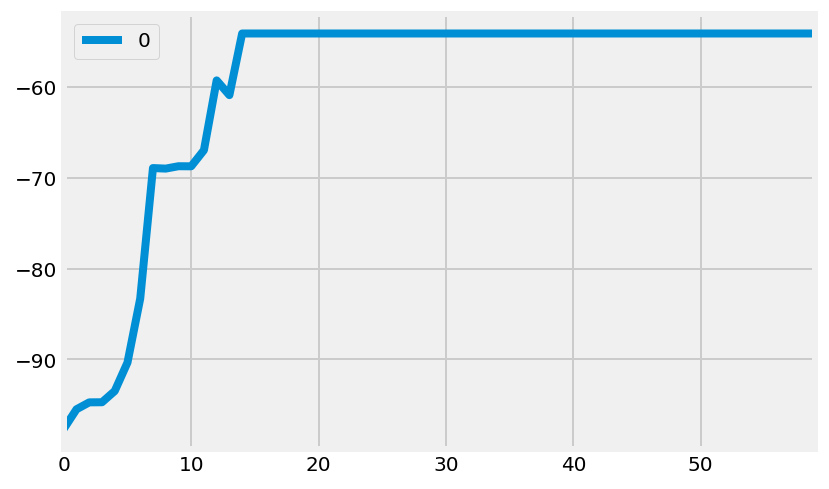

In [335]:
pd.DataFrame(results).plot()

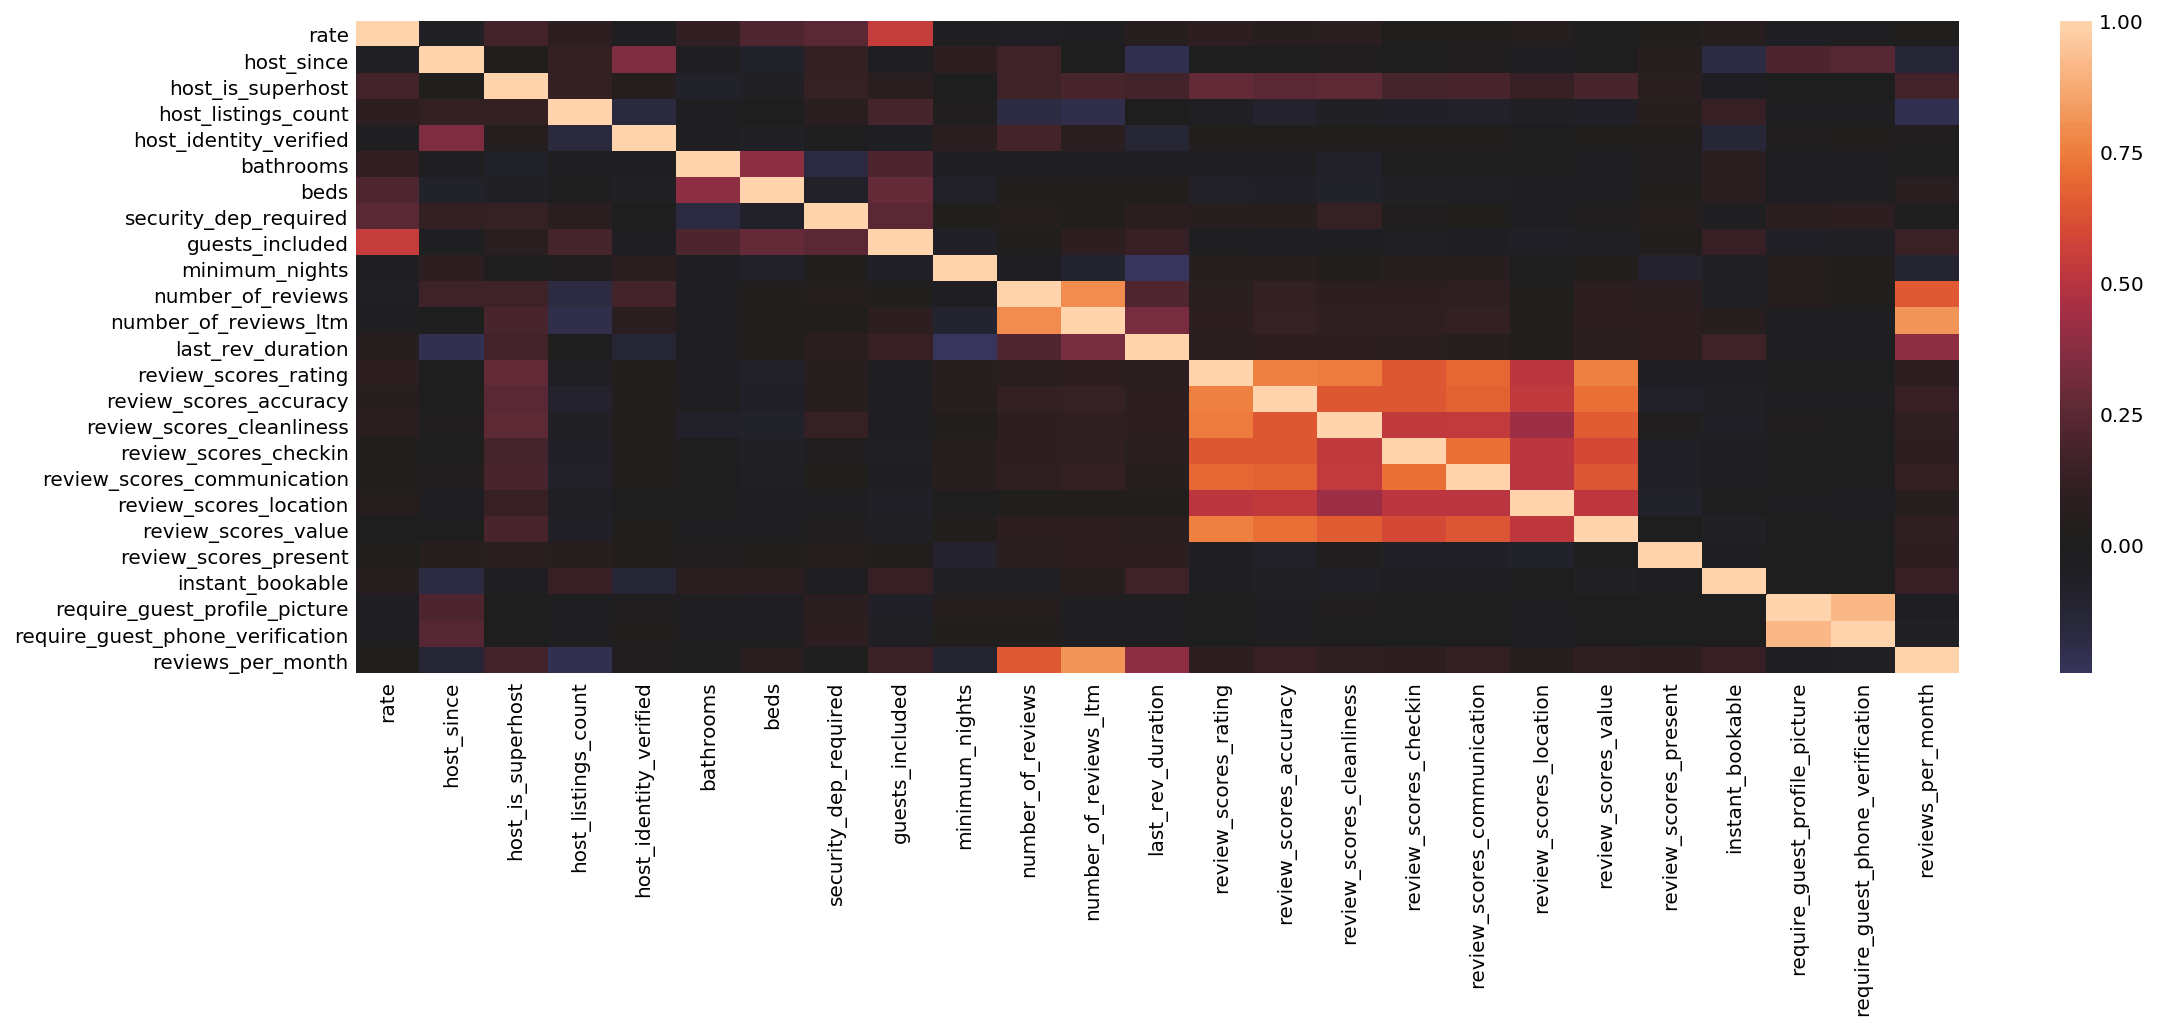

In [356]:
# Set up list of predictor varibles to be tested

plt.figure(figsize=(16, 6))
sns.heatmap(active[['rate','host_since','host_is_superhost','host_listings_count','host_identity_verified',
                    'bathrooms','beds','security_dep_required','guests_included','minimum_nights',
                    'number_of_reviews','number_of_reviews_ltm','last_rev_duration','review_scores_rating',
                    'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                    'review_scores_communication','review_scores_location','review_scores_value',
                    'review_scores_present','instant_bookable','require_guest_profile_picture',
                    'require_guest_phone_verification','reviews_per_month']].corr(),center=0)

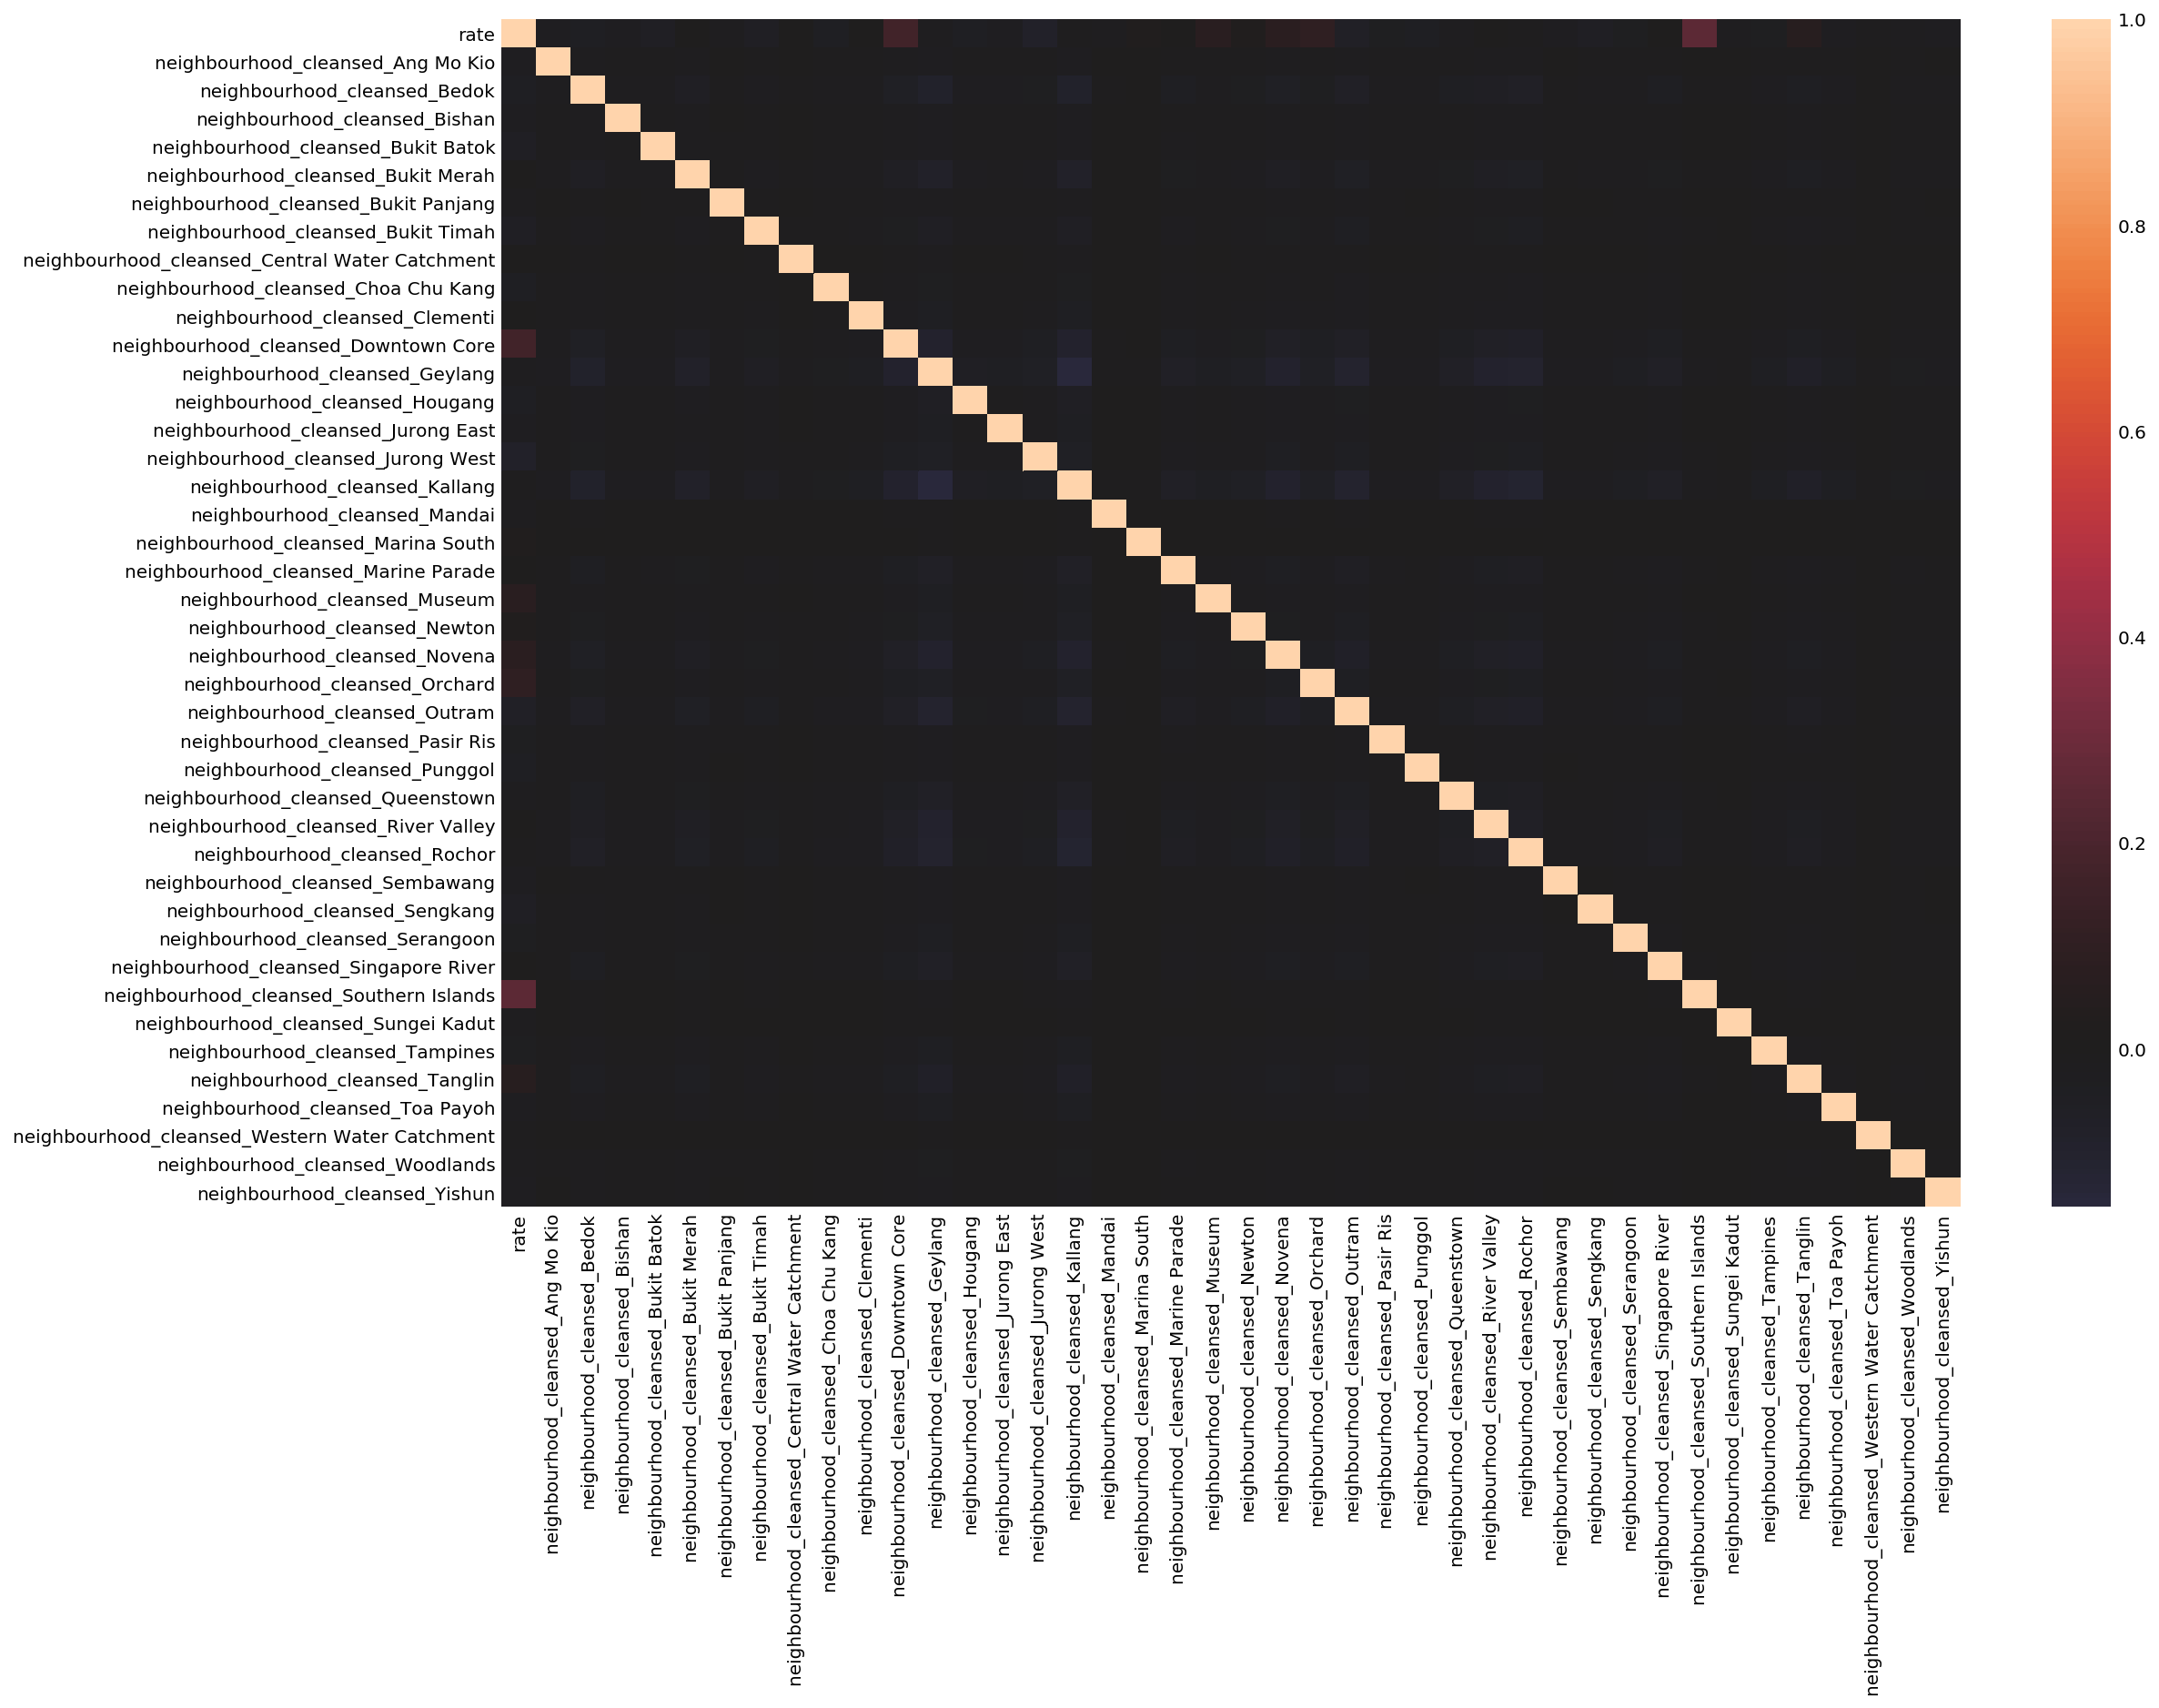

In [359]:
plt.figure(figsize=(16, 12))
sns.heatmap(pd.get_dummies(active[['rate','neighbourhood_cleansed']]).corr(),center=0)

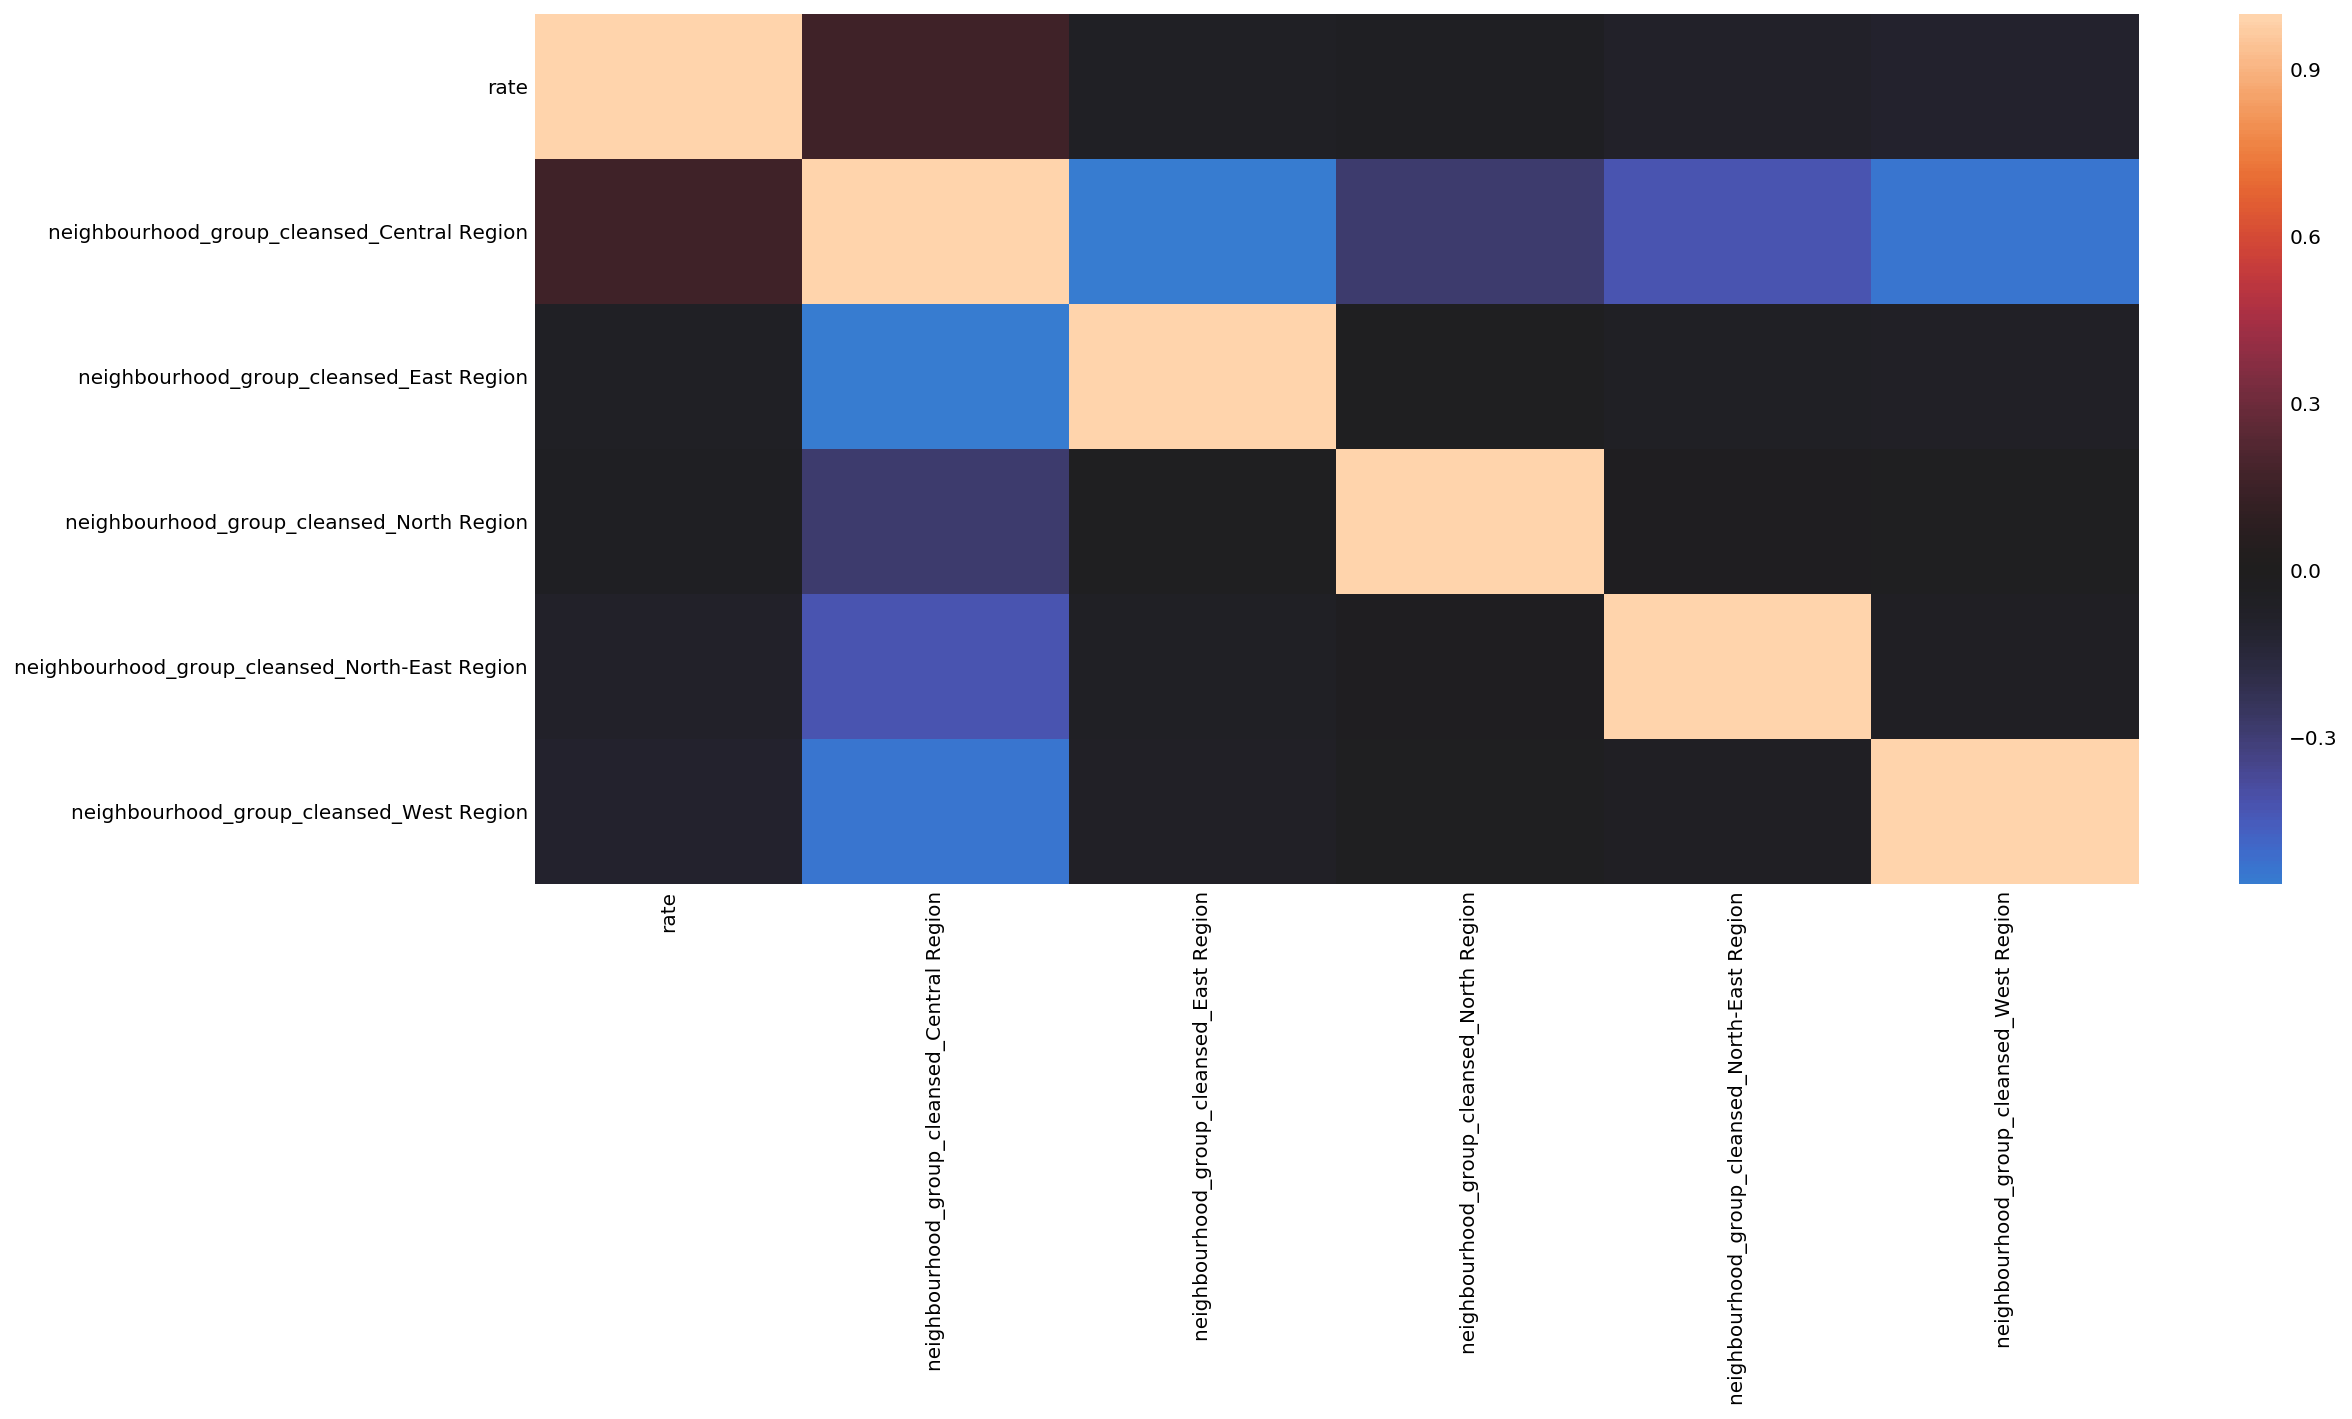

In [360]:
plt.figure(figsize=(16, 8))
sns.heatmap(pd.get_dummies(active[['rate','neighbourhood_group_cleansed']]).corr(),center=0)

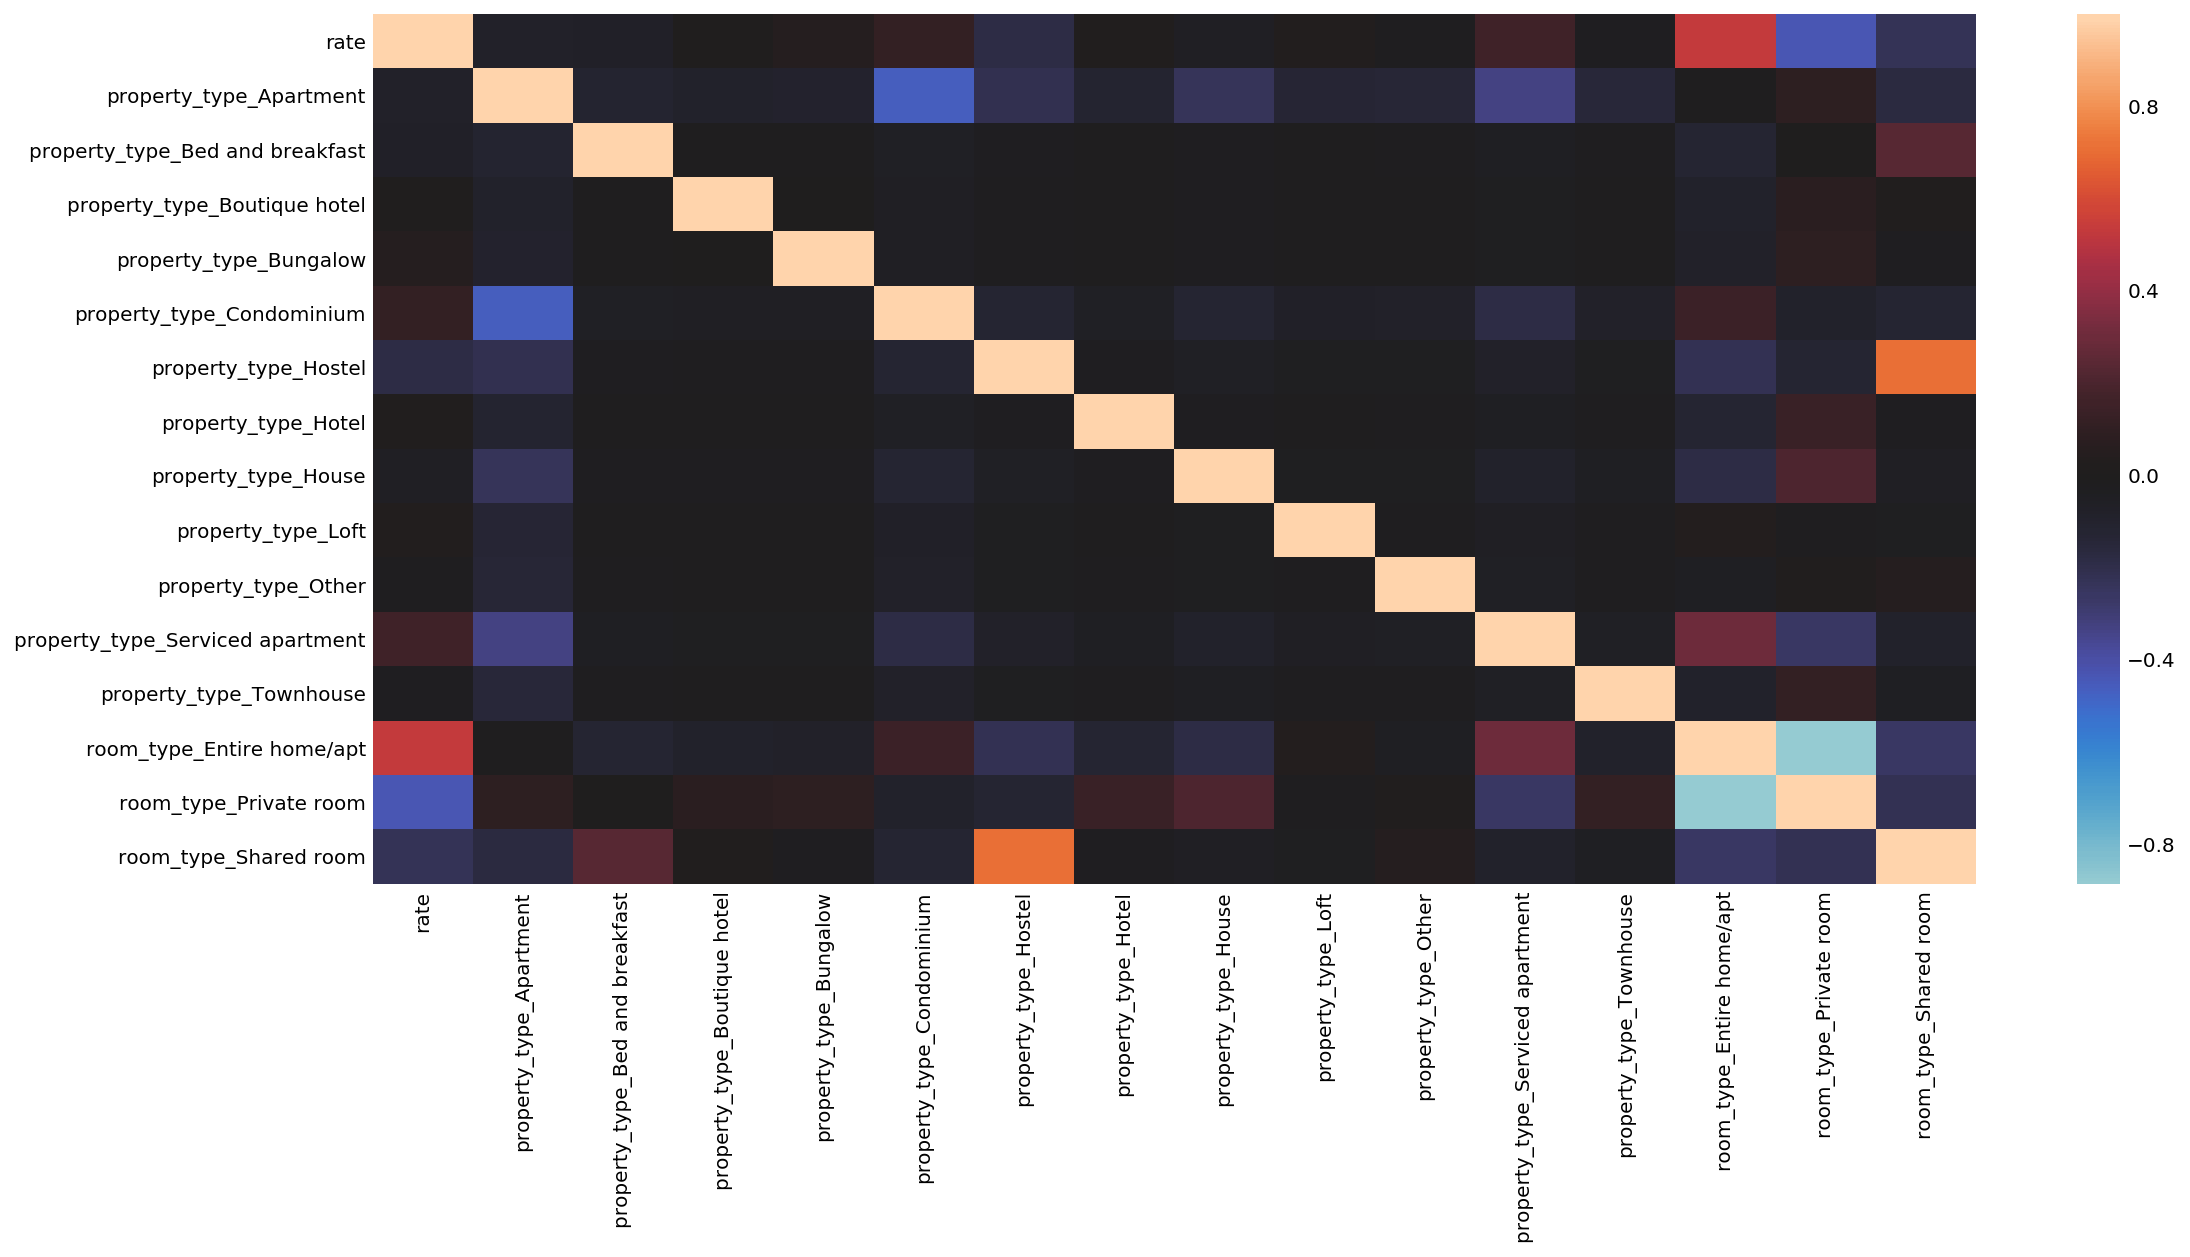

In [365]:
plt.figure(figsize=(16, 8))
sns.heatmap(pd.get_dummies(active[['rate','property_type','room_type']]).corr(),center=0)

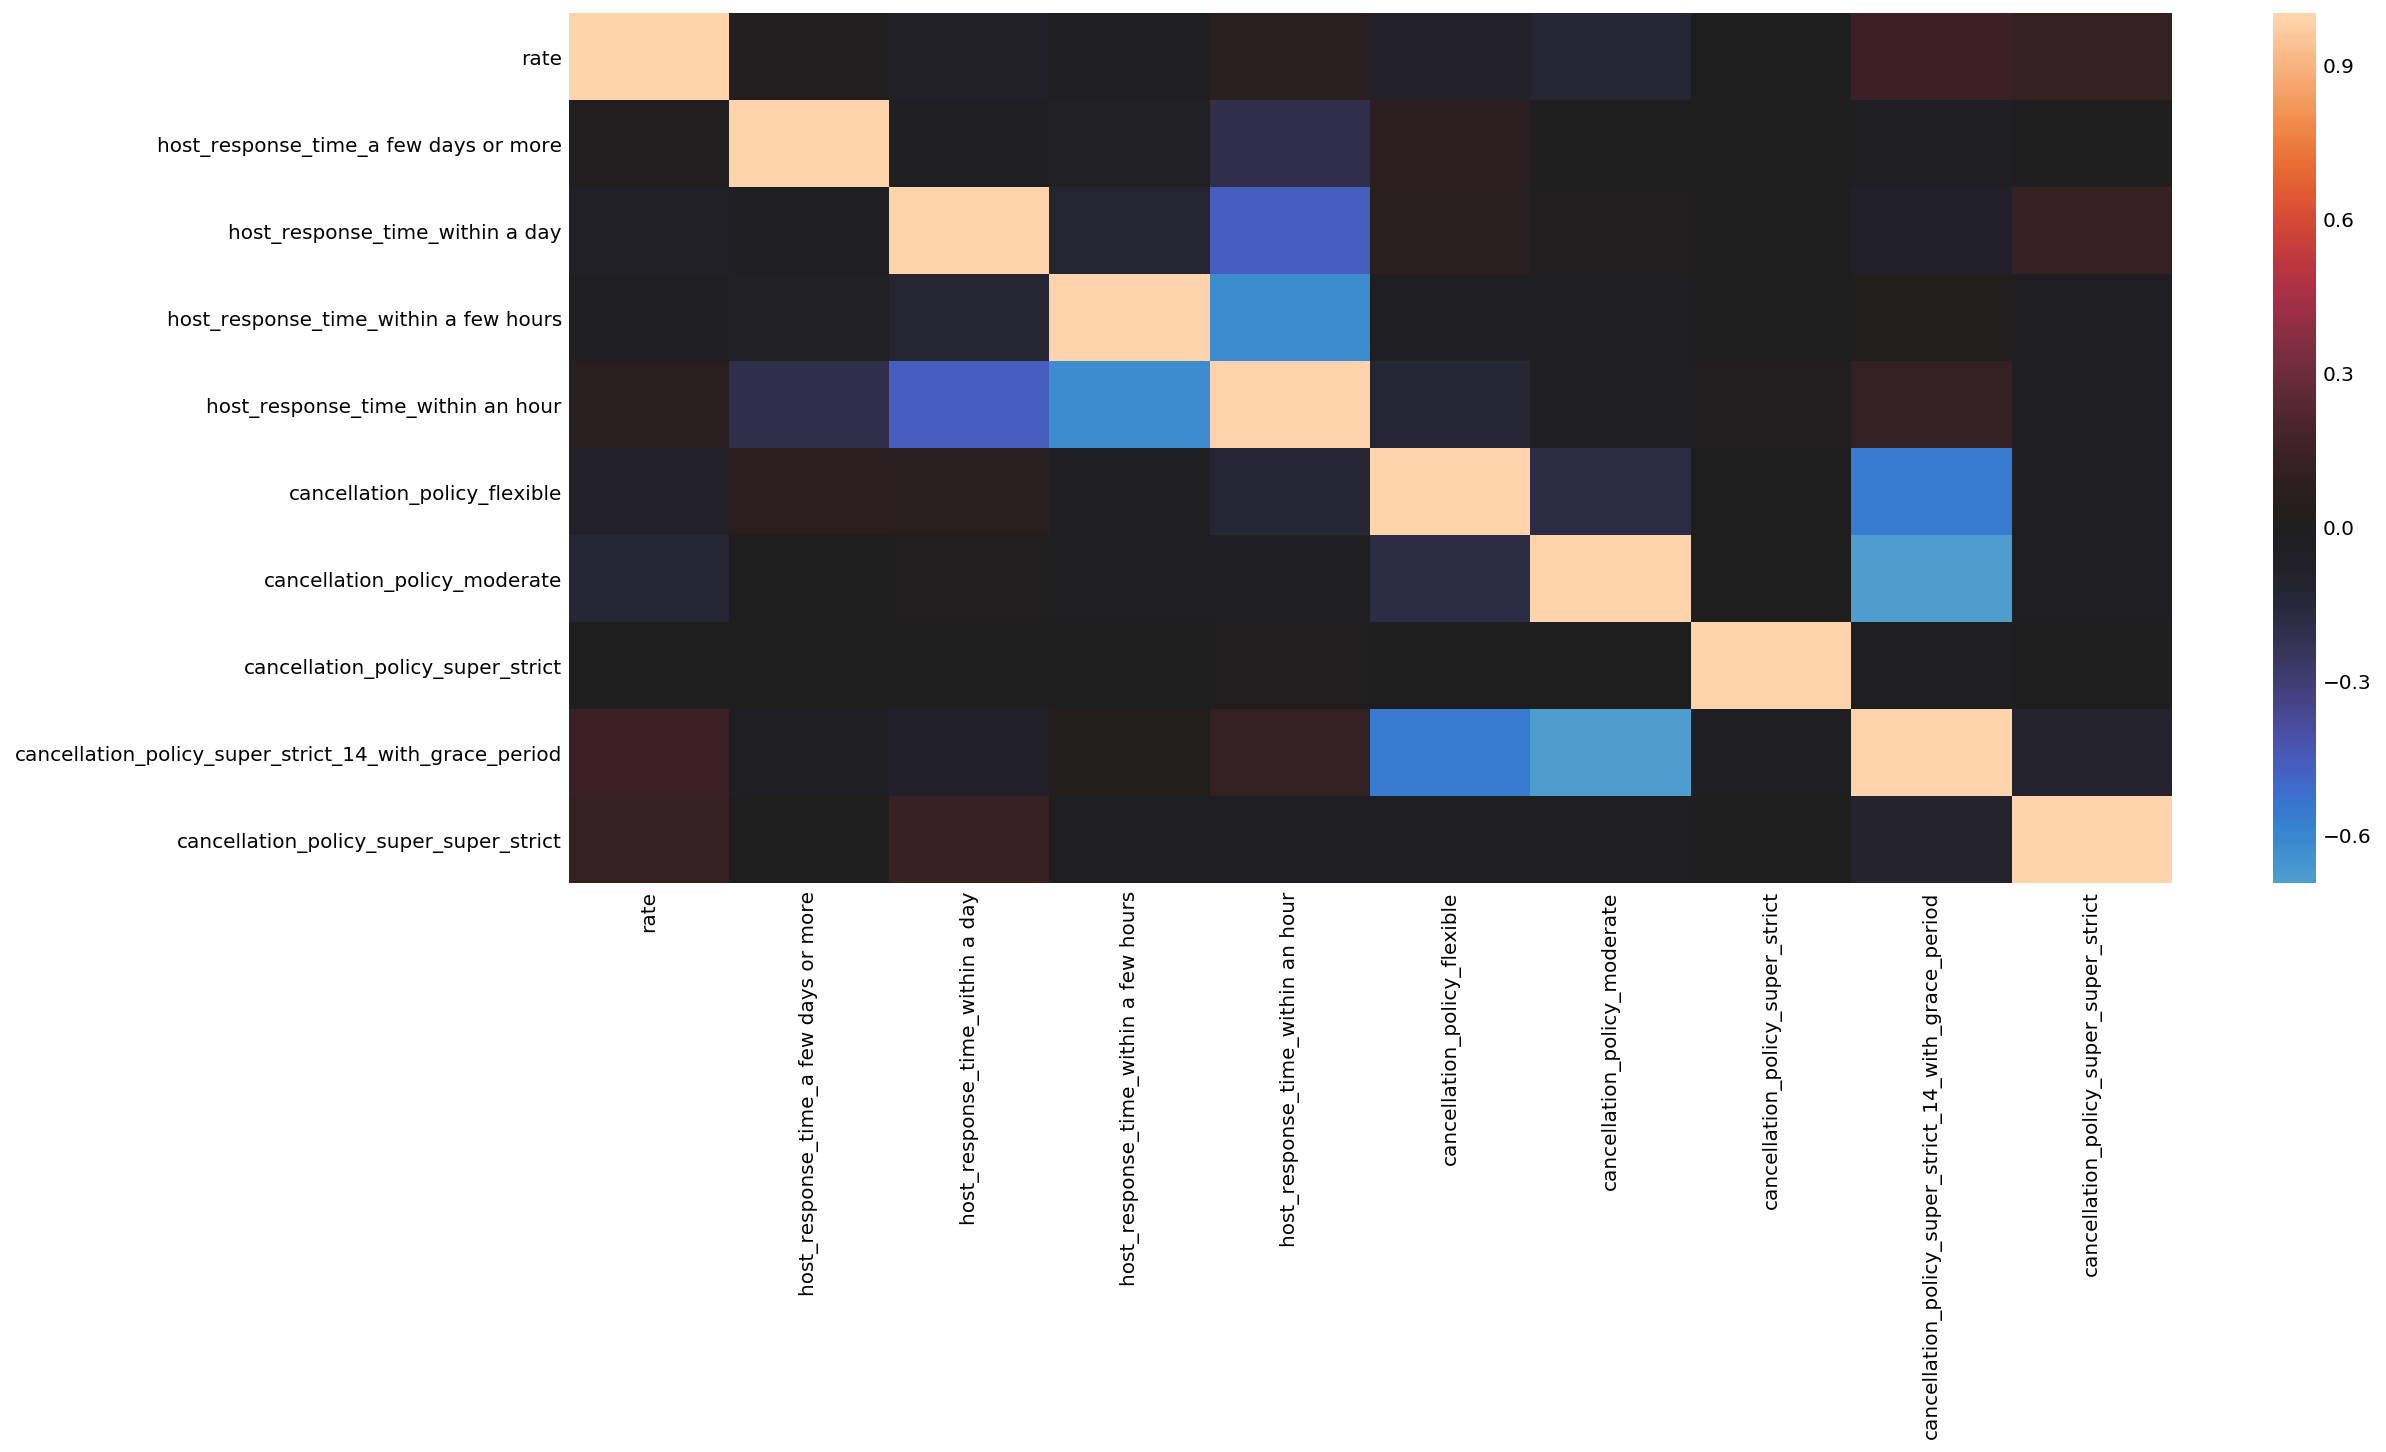

In [364]:
plt.figure(figsize=(16, 8))
sns.heatmap(pd.get_dummies(active[['rate','host_response_time','cancellation_policy']]).corr(),center=0)

In [685]:
# Rate per night

active['rate/min_night'] = active['rate'] / active['minimum_nights']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Clean extra_people and guests_included
If there is no charge for extra people, theoretically the guests included will be the total number in accommodates. The assumption is that Airbnb users are smart enough to tell the difference

In [742]:
# Clean extra_people first

active['extra_people'] = active['extra_people'].map(lambda x: currency_convert(x))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [746]:
# Guests included vs extra people vs accommodates

people_index = active[active['extra_people'] == 0][['guests_included','extra_people','accommodates','rate']].index

active.loc[people_index,'guests_included'] = active.loc[people_index,'accommodates']

In [776]:
active[active['extra_people'] == 0][['guests_included','extra_people','accommodates','rate']].head()

guests_included  extra_people  accommodates   rate
8                 1           0.0             1   51.0
9                 2           0.0             2   58.0
10                1           0.0             1   39.0
11                1           0.0             1  106.0
12                1           0.0             1  106.0

In [857]:
pd.get_dummies(active1[['room_type','host_is_superhost','instant_bookable','rate','guests_included']]).corr()

host_is_superhost  instant_bookable      rate  \
host_is_superhost                   1.000000         -0.045151  0.202074   
instant_bookable                   -0.045151          1.000000  0.085579   
rate                                0.202074          0.085579  1.000000   
guests_included                     0.028475          0.037593  0.685680   
room_type_Entire home/apt           0.201914          0.096209  0.631393   
room_type_Private room             -0.145008         -0.115134 -0.510696   
room_type_Shared room              -0.123261          0.038039 -0.265108   

                           guests_included  room_type_Entire home/apt  \
host_is_superhost                 0.028475                   0.201914   
instant_bookable                  0.037593                   0.096209   
rate                              0.685680                   0.631393   
guests_included                   1.000000                   0.464923   
room_type_Entire home/apt         0.464923                   1.000000   
room_type_Private room           -0.383905                  -0.887826   
room_type_Shared room            -0.178698                  -0.253859   

                           room_type_Private room  room_type_Shared room  
host_is_superhost                       -0.145008              -0.123261  
instant_bookable                        -0.115134               0.038039  
rate                                    -0.510696              -0.265108  
guests_included                         -0.383905              -0.178698  
room_type_Entire home/apt               -0.887826              -0.253859  
room_type_Private room                   1.000000              -0.219723  
room_type_Shared room                   -0.219723               1.000000

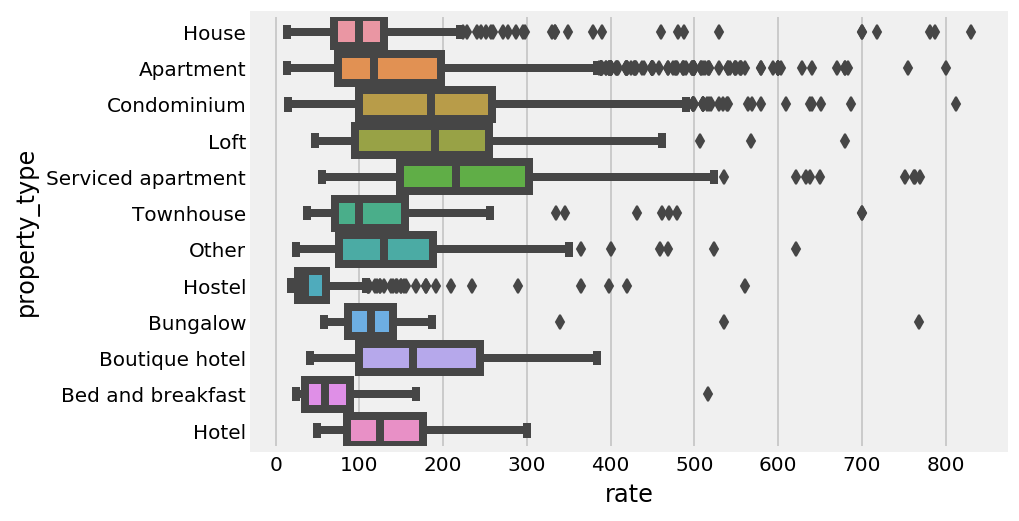

In [864]:
sns.boxplot(x=active1['rate'],y=active1['property_type'])

In [551]:
# Bathrooms
active['bathrooms'].value_counts()

1.0     2856
2.0      861
3.0      329
4.0      110
1.5       59
0.5       58
2.5       54
6.0       51
0.0       44
5.0       30
8.0       25
4.5       11
3.5       11
8.5        5
7.0        5
10.0       4
5.5        3
7.5        1
50.0       1
Name: bathrooms, dtype: int64

In [554]:
(active['bathrooms'] < np.mean(active['bathrooms'])+4*np.std(active['bathrooms'])

6.997530184156269

In [601]:
active['minimum_nights']

count    4518.000000
mean        9.234838
std        24.508007
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       700.000000
Name: minimum_nights, dtype: float64

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


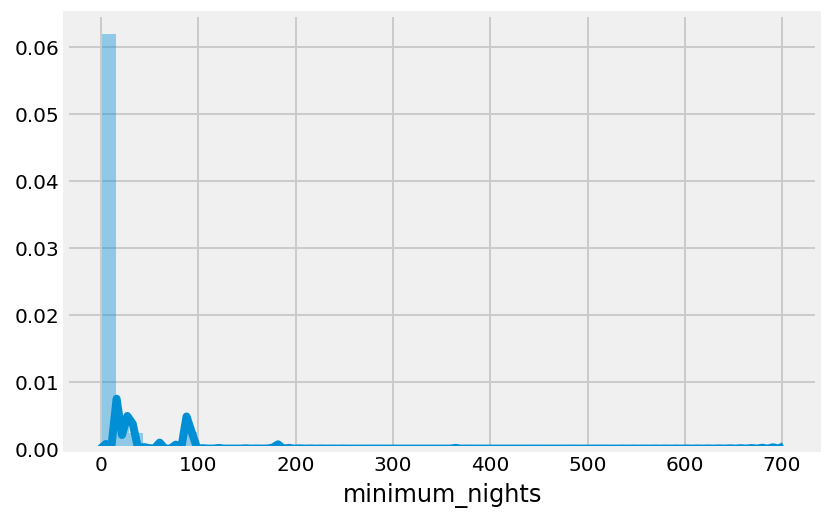

In [600]:
sns.distplot(active['minimum_nights'])

In [629]:
np.mean(active['minimum_nights'])+np.std(active['minimum_nights'])

33.740133388272085

# Modelling

### Set up predictor and target variables

In [659]:
condition = (active['minimum_nights'] < np.mean(active['minimum_nights'])+2*np.std(active['minimum_nights'])) & (active['bathrooms'] < np.mean(active['bathrooms'])+4*np.std(active['bathrooms'])) & (active['price'] < np.mean(active['price']) + 4*np.std(active['price']))

In [830]:
# Create separate datasets for room_types
entire = active[active['room_type'] == 'Entire home/apt']
private = active[active['room_type'] == 'Private room']
shared = active[active['room_type'] == 'Shared room']

# Remove outliers
entire = entire[entire['rate'] < np.mean(entire['rate']) + 4*np.std(entire['rate'])]
private = private[private['rate'] < np.mean(private['rate']) + 4*np.std(private['rate'])]
shared = shared[shared['rate'] < np.mean(shared['rate']) + 4*np.std(shared['rate'])]

# Concatenate all 3 sets back together
active1 = pd.concat([entire,private,shared], axis=0)

In [869]:
active1['property_type'].value_counts()

Apartment             2057
Condominium            912
Serviced apartment     518
House                  266
Hostel                 228
Townhouse              110
Other                  102
Loft                    93
Bed and breakfast       58
Hotel                   54
Boutique hotel          43
Bungalow                42
Name: property_type, dtype: int64

In [870]:
# Remove organizations - e.g hotel, serviced apartments, hostels

active1 = active1[(active1['property_type'] != 'Serviced apartment') & \
                  (active1['property_type'] != 'Hostel') & (active1['property_type'] != 'Hotel') & \
                 (active1['property_type'] != 'Boutique hotel')]

In [871]:
condition1 = (active1['minimum_nights'] < np.mean(active1['minimum_nights'])+2*np.std(active1['minimum_nights'])) \
            & (active1['bathrooms'] < np.mean(active1['bathrooms'])+4*np.std(active1['bathrooms']))            

In [905]:
# Set up predictor varibles without features that needs dummifying first

predictor = active1[condition1][['host_since','host_is_superhost','host_listings_count','host_identity_verified',
                    'bathrooms','beds','security_dep_required','guests_included','minimum_nights',
                    'number_of_reviews','number_of_reviews_ltm','last_rev_duration','review_scores_rating',
                    'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                    'review_scores_communication','review_scores_location','review_scores_value',
                    'review_scores_present','instant_bookable','require_guest_profile_picture',
                    'require_guest_phone_verification','reviews_per_month']]

In [906]:
# Dummify variables

predictor_dummy = pd.get_dummies(active1[condition1][['host_response_time','property_type','room_type','cancellation_policy',
                          'neighbourhood_cleansed']])

In [907]:
# Final predictor variables with dummy

predictor = pd.concat([predictor,predictor_dummy],axis=1)

In [926]:
# Set up target variable

target = active1[condition1]['rate']

In [927]:
# Set up X and y

X = predictor
y = target

### Split dataset into train and test

In [928]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=10)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2928, 84) (2928,)
(517, 84) (517,)


### Standardize data using StandardScaler

In [929]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


## Linear Regression

### Basic Linear Regression

In [930]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

score_r2 = cross_val_score(lr,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mae = cross_val_score(lr,X_train_std,y_train,cv=5,scoring='neg_mean_absolute_error')
print('Cross_val_scores mae: ', score_mae)
print('Mean mae: ', np.mean(score_mae))
print('Standard Deviation mae: ', np.std(score_mae))

Cross_val_scores r2:  [ 6.93664400e-01  7.30008615e-01 -6.63062029e+23  7.18515744e-01
 -9.72418374e+19]
Mean r2:  -1.3263185408524173e+23
Standard Deviation r2:  2.6521508992581396e+23
   
Cross_val_scores mae:  [-4.50594406e+01 -4.07526807e+01 -5.86777617e+12 -4.22751493e+01
 -8.64871527e+10]
Mean mae:  -1190852664245.931
Standard Deviation mae:  2338701641941.9585


### Lasso for feature selection

In [931]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

lassoregcv = LassoCV(normalize=False, random_state=100, max_iter=10000)
lassoregcv.fit(X_train_std, y_train)
print('best alpha: {}'.format(lassoregcv.alpha_))

best alpha: 0.7355525586556051


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [932]:
# Set up lasso with the best alpha

lassoreg = Lasso(alpha=lassoregcv.alpha_, normalize=False, random_state=100, max_iter=10000)

score_r2 = cross_val_score(lassoreg,X_train_std,y_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mae = cross_val_score(lassoreg,X_train_std,y_train,cv=5,scoring='neg_mean_absolute_error')
print('Cross_val_scores mae: ', score_mae)
print('Mean mae: ', np.mean(score_mae))
print('Standard Deviation mae: ', np.std(score_mae))

Cross_val_scores r2:  [0.70252407 0.72935128 0.73738029 0.72056796 0.72944148]
Mean r2:  0.7238530150762083
Standard Deviation r2:  0.011917755997748424
   
Cross_val_scores mae:  [-43.96720641 -40.61499443 -42.98838208 -41.59381431 -44.94480045]
Mean mae:  -42.82183953620482
Standard Deviation mae:  1.5636352535977398


In [933]:
# Check coefficients of lasso model

lasso_coef = pd.DataFrame(lassoregcv.coef_,index=X_train.columns).abs().sort_values(by=0,ascending=False)
lasso_coef

0
guests_included                                 46.746365
room_type_Entire home/apt                       36.708682
beds                                            19.958604
security_dep_required                           14.751016
bathrooms                                       13.476081
neighbourhood_cleansed_Downtown Core            12.880623
neighbourhood_cleansed_Geylang                  12.362120
host_is_superhost                               10.839637
host_listings_count                              9.592493
review_scores_value                              7.923365
neighbourhood_cleansed_Singapore River           7.344586
property_type_Apartment                          6.534221
review_scores_rating                             6.508466
room_type_Shared room                            5.904869
number_of_reviews_ltm                            5.787723
instant_bookable                                 5.323145
neighbourhood_cleansed_Museum                    4.586464
host_identity_verified                           4.150459
neighbourhood_cleansed_Orchard                   4.034833
property_type_Bed and breakfast                  3.798937
neighbourhood_cleansed_Marine Parade             3.741306
host_response_time_within a few hours            3.678866
cancellation_policy_super_super_strict           3.087257
host_response_time_a few days or more            3.042325
last_rev_duration                                3.008595
review_scores_location                           2.948900
property_type_Bungalow                           2.946013
neighbourhood_cleansed_Southern Islands          2.907895
cancellation_policy_moderate                     2.564544
host_response_time_within a day                  2.234605
...                                                   ...
neighbourhood_cleansed_Sungei Kadut              0.174817
neighbourhood_cleansed_Novena                    0.172270
property_type_House                              0.169296
cancellation_policy_super_strict                 0.156974
neighbourhood_cleansed_Bukit Batok               0.001613
neighbourhood_cleansed_Serangoon                 0.000000
neighbourhood_cleansed_Punggol                   0.000000
neighbourhood_cleansed_River Valley              0.000000
neighbourhood_cleansed_Toa Payoh                 0.000000
neighbourhood_cleansed_Western Water Catchment   0.000000
host_since                                       0.000000
neighbourhood_cleansed_Mandai                    0.000000
require_guest_phone_verification                 0.000000
minimum_nights                                   0.000000
number_of_reviews                                0.000000
review_scores_accuracy                           0.000000
review_scores_cleanliness                        0.000000
review_scores_checkin                            0.000000
review_scores_communication                      0.000000
require_guest_profile_picture                    0.000000
property_type_Condominium                        0.000000
neighbourhood_cleansed_Jurong East               0.000000
room_type_Private room                           0.000000
cancellation_policy_flexible                     0.000000
neighbourhood_cleansed_Bedok                     0.000000
neighbourhood_cleansed_Bishan                    0.000000
neighbourhood_cleansed_Bukit Panjang             0.000000
neighbourhood_cleansed_Central Water Catchment   0.000000
neighbourhood_cleansed_Hougang                   0.000000
neighbourhood_cleansed_Yishun                    0.000000

[84 rows x 1 columns]

In [934]:
# # Grid Search LassoCV

# from sklearn.model_selection import GridSearchCV

# # Define GridSearch parameters
# param_grid = {'alpha': 10.0 ** -np.arange(0.01, 1.5,0.01)}

# # Do a grid search for the model
# lasso = Lasso(normalize=False, random_state=100, max_iter=10000)

# lasso_grid = GridSearchCV(lasso, param_grid,scoring='neg_mean_absolute_error',cv=5)
# lasso_grid.fit(X_train_std, y_train)

# print("Best score: " + str(lasso_grid.best_score_))

In [935]:
# lasso_grid.best_estimator_

The score before and after grid search is almost exactly the same. Hence, I will not find the coefficients again.

### Recalibrate features based on Lasso results

In [936]:
# Remove features that have coefficient = 0

X_aft_lasso = X.drop(lasso_coef[lasso_coef[0] < 0.01].index, axis=1)

In [937]:
# Split into train and test set

from sklearn.model_selection import train_test_split

X_aft_lasso_train, X_aft_lasso_test, y_aft_lasso_train, y_aft_lasso_test = train_test_split(X_aft_lasso, y, test_size=0.15, shuffle=True, random_state=10)
print(X_aft_lasso_train.shape, y_aft_lasso_train.shape)
print(X_aft_lasso_test.shape, y_aft_lasso_test.shape)

(2928, 58) (2928,)
(517, 58) (517,)


In [938]:
# Standardize data using StandardScaler

from sklearn.preprocessing import StandardScaler

ss_aft_lasso = StandardScaler()
X_aft_lasso_train_std = ss.fit_transform(X_aft_lasso_train)
X_aft_lasso_test_std = ss.transform(X_aft_lasso_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


### Ridge for further regularization

In [939]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

ridgeregcv = RidgeCV(normalize=False)
ridgeregcv.fit(X_aft_lasso_train_std, y_aft_lasso_train)
print('best alpha: {}'.format(ridgeregcv.alpha_))

best alpha: 10.0


In [940]:
# Set up ridge with the best alpha

ridgereg = Ridge(alpha=ridgeregcv.alpha_, normalize=False)

score_r2 = cross_val_score(ridgereg,X_aft_lasso_train_std,y_aft_lasso_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mae = cross_val_score(ridgereg,X_aft_lasso_train_std,y_aft_lasso_train,cv=5,scoring='neg_mean_squared_error')
print('Cross_val_scores mae: ', score_mae)
print('Mean mae: ', np.mean(score_mae))
print('Standard Deviation mae: ', np.std(score_mae))

Cross_val_scores r2:  [0.70495005 0.73085293 0.74488171 0.72066618 0.73472917]
Mean r2:  0.7272160066905456
Standard Deviation r2:  0.013567793750407104
   
Cross_val_scores mae:  [-3858.92208859 -3402.52626854 -3905.70637068 -3910.72478833
 -4084.20978098]
Mean mae:  -3832.4178594238156
Standard Deviation mae:  228.2155151734576


In [941]:
# Fit on train data to predict test data

ridgereg.fit(X_aft_lasso_train_std,y_aft_lasso_train)
y_pred = ridgereg.predict(X_aft_lasso_test_std)

In [942]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mean_squared_error(y_aft_lasso_test, y_pred)

3538.4139532303684

In [943]:
sqrt(mean_squared_error(y_aft_lasso_test, y_pred))

59.484569034585505

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


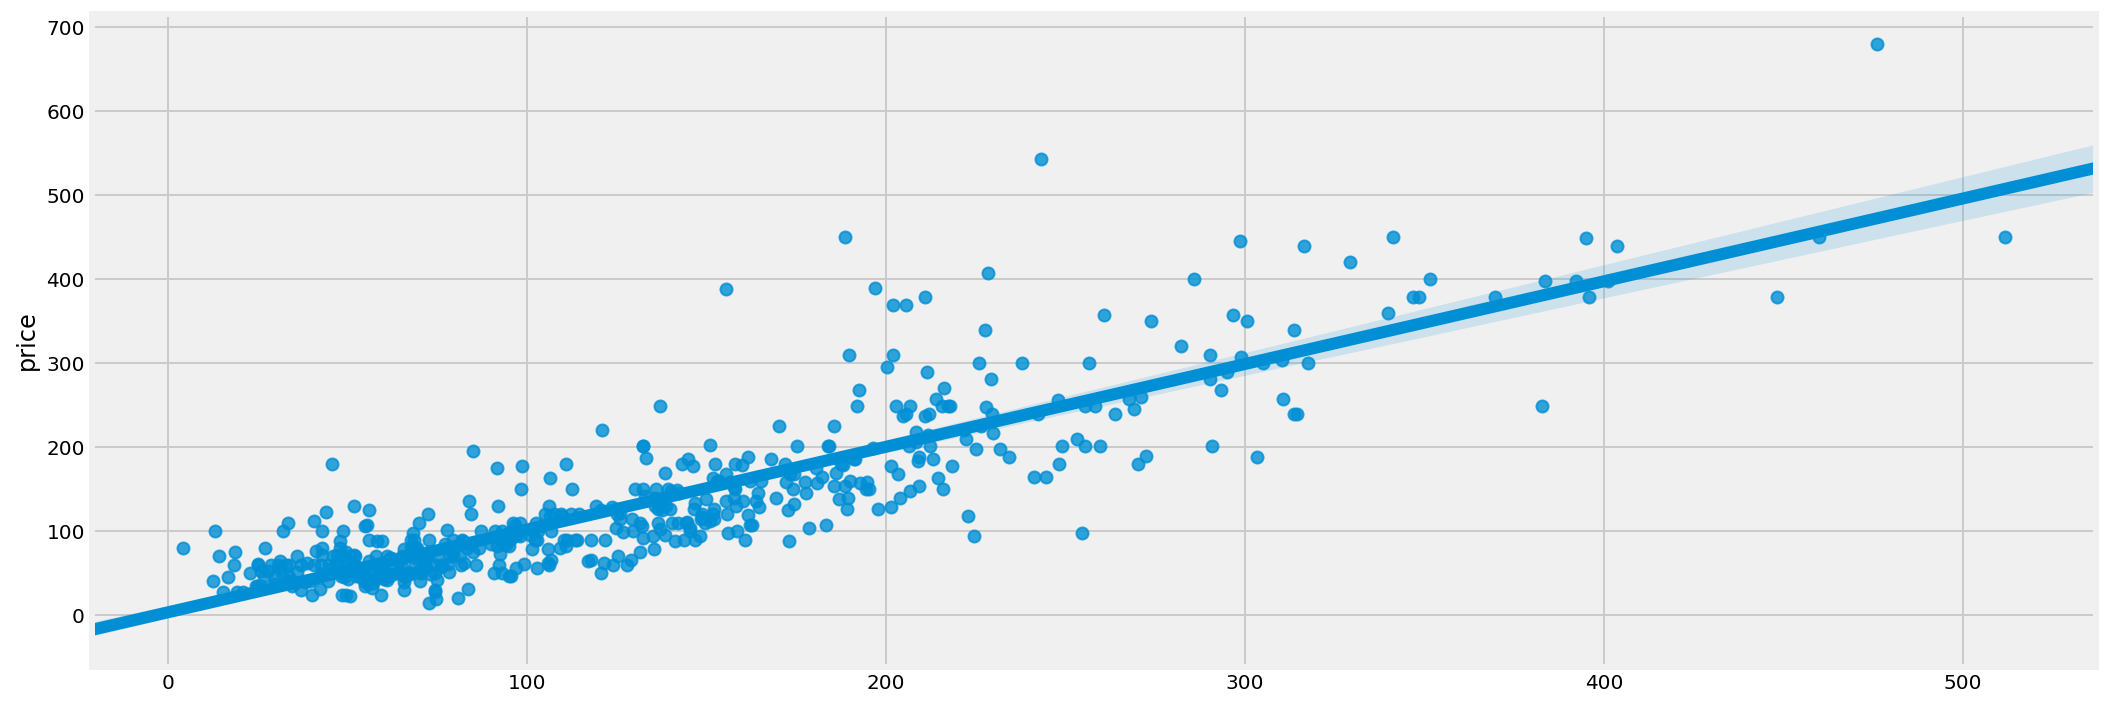

In [896]:
# Visualize y_pred vs actual values

plt.figure(figsize=(16, 6))
sns.regplot(x=y_pred,y=y_aft_lasso_test)

__Conclusion:__

Most of the points are being predicted well. However, there are huge outliers in the prediction vs actual. Hence, I will try to remove the outliers and get results again.

In [897]:
pred_actual = pd.DataFrame([y_pred,y_aft_lasso_test],columns=y_aft_lasso_test.index, index=['Predicted','Actual']).T

pred_actual['Difference'] = pred_actual['Actual'] - pred_actual['Predicted']

pred_actual = pd.concat([pred_actual,active],axis=1,join='inner')

In [898]:
lasso_coef

0
guests_included                                     48.847532
room_type_Entire home/apt                           28.588057
beds                                                14.686065
neighbourhood_cleansed_Downtown Core                12.044648
neighbourhood_cleansed_Geylang                       9.375268
bathrooms                                            9.234687
host_is_superhost                                    7.967250
neighbourhood_cleansed_Orchard                       6.697019
security_dep_required                                6.497098
neighbourhood_cleansed_Singapore River               6.006115
review_scores_value                                  4.746034
room_type_Shared room                                4.368508
review_scores_rating                                 4.216132
cancellation_policy_super_super_strict               3.888338
property_type_Bungalow                               3.644175
number_of_reviews_ltm                                3.577611
neighbourhood_cleansed_Southern Islands              3.528682
neighbourhood_cleansed_Museum                        3.286437
host_listings_count                                  3.081579
review_scores_location                               3.042025
property_type_Apartment                              2.873379
neighbourhood_cleansed_Marine Parade                 2.784951
neighbourhood_cleansed_Outram                        2.681972
instant_bookable                                     2.584493
last_rev_duration                                    2.514492
property_type_House                                  2.388366
neighbourhood_cleansed_Rochor                        2.347650
property_type_Bed and breakfast                      2.312739
host_response_time_within a few hours                2.290981
neighbourhood_cleansed_Newton                        2.266338
...                                                       ...
neighbourhood_cleansed_Bukit Batok                   0.197162
neighbourhood_cleansed_Sungei Kadut                  0.180500
host_response_time_within a day                      0.180222
cancellation_policy_moderate                         0.135615
neighbourhood_cleansed_Punggol                       0.100725
property_type_Loft                                   0.039260
neighbourhood_cleansed_Tampines                      0.000000
neighbourhood_cleansed_Sengkang                      0.000000
neighbourhood_cleansed_Toa Payoh                     0.000000
neighbourhood_cleansed_Western Water Catchment       0.000000
neighbourhood_cleansed_Woodlands                     0.000000
neighbourhood_cleansed_Pasir Ris                     0.000000
cancellation_policy_super_strict_14_with_grace_...   0.000000
neighbourhood_cleansed_Novena                        0.000000
room_type_Private room                               0.000000
number_of_reviews                                    0.000000
review_scores_accuracy                               0.000000
review_scores_communication                          0.000000
require_guest_phone_verification                     0.000000
host_response_time_within an hour                    0.000000
property_type_Condominium                            0.000000
cancellation_policy_super_strict                     0.000000
neighbourhood_cleansed_Mandai                        0.000000
neighbourhood_cleansed_Bedok                         0.000000
neighbourhood_cleansed_Bishan                        0.000000
neighbourhood_cleansed_Bukit Timah                   0.000000
neighbourhood_cleansed_Central Water Catchment       0.000000
neighbourhood_cleansed_Clementi                      0.000000
neighbourhood_cleansed_Jurong East                   0.000000
neighbourhood_cleansed_Yishun                        0.000000

[84 rows x 1 columns]

In [899]:
pred_actual.sort_values(by='Difference',ascending=False)[['Predicted','Actual','Difference','listing_url','property_type','room_type','neighbourhood_cleansed','host_since','host_is_superhost','host_listings_count',
                    'bathrooms','beds','security_dep_required','guests_included','minimum_nights',
                    'number_of_reviews','number_of_reviews_ltm','last_rev_duration','review_scores_rating','review_scores_value']]

Predicted  Actual  Difference                            listing_url  \
1924  243.244747   543.0  299.755253  https://www.airbnb.com/rooms/14226658   
6651  188.604752   450.0  261.395248  https://www.airbnb.com/rooms/31066594   
2799  155.342757   388.0  232.657243  https://www.airbnb.com/rooms/18166182   
4988  476.097304   680.0  203.902696  https://www.airbnb.com/rooms/26627387   
4163  196.982995   390.0  193.017005  https://www.airbnb.com/rooms/23403996   
3186  228.422700   408.0  179.577300  https://www.airbnb.com/rooms/19895150   
4161  210.920293   379.0  168.079707  https://www.airbnb.com/rooms/23398722   
5883  201.883044   369.0  167.116956  https://www.airbnb.com/rooms/29224499   
3272  205.550083   369.0  163.449917  https://www.airbnb.com/rooms/20247516   
6850  298.609068   446.0  147.390932  https://www.airbnb.com/rooms/31390991   
3458   45.566953   180.0  134.433047  https://www.airbnb.com/rooms/20950835   
1091  316.416491   440.0  123.583509   https://www.airbnb.com/rooms/9239776   
6283  189.762579   310.0  120.237421  https://www.airbnb.com/rooms/30050561   
3397  285.866676   400.0  114.133324  https://www.airbnb.com/rooms/20794954   
6297  137.144943   249.0  111.855057  https://www.airbnb.com/rooms/30071518   
4990  227.679029   339.0  111.320971  https://www.airbnb.com/rooms/26683215   
2929   84.833521   195.0  110.166479  https://www.airbnb.com/rooms/18830269   
802   341.109118   450.0  108.890882   https://www.airbnb.com/rooms/7628360   
6552  201.978433   310.0  108.021567  https://www.airbnb.com/rooms/30695275   
3741  120.840711   220.0   99.159289  https://www.airbnb.com/rooms/21791154   
803   260.729259   358.0   97.270741   https://www.airbnb.com/rooms/7628503   
3604  200.284356   295.0   94.715644  https://www.airbnb.com/rooms/21360291   
7031  329.088660   420.0   90.911340  https://www.airbnb.com/rooms/31851838   
1405   13.180555   100.0   86.819445  https://www.airbnb.com/rooms/11219236   
3393   91.609074   175.0   83.390926  https://www.airbnb.com/rooms/20789960   
3961   98.494794   178.0   79.505206  https://www.airbnb.com/rooms/22552809   
2552   43.935664   123.0   79.064336  https://www.airbnb.com/rooms/17053896   
1943   51.681114   130.0   78.318886  https://www.airbnb.com/rooms/14377235   
6501  211.463281   289.0   77.536719  https://www.airbnb.com/rooms/30510645   
2370   33.504065   110.0   76.495935  https://www.airbnb.com/rooms/16467688   
...          ...     ...         ...                                    ...   
3863  121.379947    62.0  -59.379947  https://www.airbnb.com/rooms/22110157   
6713   80.845131    20.0  -60.845131  https://www.airbnb.com/rooms/31201062   
5355  511.688423   450.0  -61.688423  https://www.airbnb.com/rooms/28038282   
2461  189.193791   127.0  -62.193791  https://www.airbnb.com/rooms/16726178   
1669  128.895508    66.0  -62.895508  https://www.airbnb.com/rooms/12878592   
6394  203.740706   140.0  -63.740706  https://www.airbnb.com/rooms/30281851   
85    124.005462    60.0  -64.005462   https://www.airbnb.com/rooms/1277842   
5025  215.793214   150.0  -65.793214  https://www.airbnb.com/rooms/26755304   
7297  127.685245    60.0  -67.685245  https://www.airbnb.com/rooms/32537314   
3666  248.165394   180.0  -68.165394  https://www.airbnb.com/rooms/21541638   
6659  448.044510   379.0  -69.044510  https://www.airbnb.com/rooms/31093857   
3944  120.488819    50.0  -70.488819  https://www.airbnb.com/rooms/22441995   
488   160.568719    89.0  -71.568719   https://www.airbnb.com/rooms/5481194   
2861  197.819677   126.0  -71.819677  https://www.airbnb.com/rooms/18486921   
6791  201.308098   129.0  -72.308098  https://www.airbnb.com/rooms/31326007   
4843  178.634225   104.0  -74.634225  https://www.airbnb.com/rooms/25992872   
5562  313.657558   239.0  -74.657558  https://www.airbnb.com/rooms/28574569   
3411  183.236917   108.0  -75.236917  https://www.airbnb.com/rooms/20827191   
7305  314.578875   239.0  -75.578875  https://www.airbnb.

## Use Statsmodel to study p-value of features

In [900]:
# Add in coefficient

X_stats = sm.add_constant(X)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [901]:
# Split into train and test set

X_stats_train, X_stats_test, y_stats_train, y_stats_test = train_test_split(X_stats, y, test_size=0.15, shuffle=True, random_state=10)
print(X_stats_train.shape, y_stats_train.shape)
print(X_stats_test.shape, y_stats_test.shape)

(2928, 85) (2928,)
(517, 85) (517,)


In [902]:
# Standardize data using StandardScaler

ss_stats = StandardScaler()
X_stats_train_std = ss.fit_transform(X_stats_train)
X_stats_test_std = ss.transform(X_stats_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [903]:
import statsmodels.api as sm

# Add in coefficient

X_stats = sm.add_constant(X)

stats_lr = sm.OLS(y_train, X_stats_train_std)
stats_lr = stats_lr.fit()
y_test_pred = stats_lr.predict(X_stats_test_std)

stats_lr.summary()

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     14.05
Date:                Fri, 17 May 2019   Prob (F-statistic):          6.86e-151
Time:                        14:47:10   Log-Likelihood:                -18630.
No. Observations:                2928   AIC:                         3.742e+04
Df Residuals:                    2848   BIC:                         3.790e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.97e-17   6.55e-17     -1.218      0.223   -2.08e-16    4.86e-17
x1             0.8414      3.248      0.259      0.796      -5.527       7.210
x2             8.8550      3.085      2.870      0.004       2.806      14.904
x3            -4.1522      3.399     -1.222      0.222     -10.817       2.513
x4             2.0628      3.011      0.685      0.493      -3.842       7.968
x5            10.1969      3.182      3.205      0.001       3.958      16.435
x6            14.9388      4.132      3.616      0.000       6.837      23.040
x7             6.6167      3.202      2.066      0.039       0.338      12.896
x8            48.8316      4.491     10.873      0.000      40.026      57.637
x9            -1.6024      3.121     -0.513      0.608      -7.723       4.518
x10            2.4513      4.690      0.523      0.601      -6.746      11.648
x11           -5.4009      5.952     -0.907      0.364     -17.072       6.270
x12           -2.8844      3.218     -0.896      0.370      -9.194       3.425
x13            5.7057      5.457      1.046      0.296      -4.995      16.406
x14            0.6072      4.627      0.131      0.896      -8.465       9.680
x15            1.7521      4.284      0.409      0.683      -6.647      10.151
x16           -2.2782      4.061     -0.561      0.575     -10.242       5.685
x17           -0.5217      4.419     -0.118      0.906      -9.186       8.142
x18            3.3938      3.626      0.936      0.349      -3.716      10.504
x19           -6.8016      4.607     -1.476      0.140     -15.835       2.232
x20            1.7481      2.786      0.627      0.530      -3.714       7.211
x21            3.0712      3.108      0.988      0.323      -3.024       9.166
x22           -3.1936      6.707     -0.476      0.634     -16.344       9.957
x23            2.0174      6.790      0.297      0.766     -11.297      15.332
x24           -1.4090      5.128     -0.275      0.784     -11.465       8.647
x25           -2.3627      3.149     -0.750      0.453      -8.538       3.812
x26           -1.5641      4.130     -0.379      0.705      -9.663       6.535
x27           -4.3732      5.039     -0.868      0.386     -14.254       5.507
x28           -1.9484      5.896     -0.330      0.741     -13.510       9.613
x29           -2.8759      1.734     -1.659      0.097      -6.276       0.524
x30           -2.9352      2.965     -0.990      0.322      -8.749       2.878
x31            4.4940      2.783      1.615      0.106      -0.962       9.950
x32            0.7602      2.047      0.371      0.710      -3.253       4.774
x33            3.2348      2.599      1.245      0.213      -1.861       8.331
x34           -0.7046      2.640     -0.267      0.790      -5.881       4.472
x35            2.5965      2.663      0.975      0.330      -2.624       7.817
x3

In [904]:
p_values = pd.DataFrame(stats_lr.pvalues)
p_values.index = X_stats.columns
p_values[p_values[0] < 0.05]

0
host_is_superhost                       4.129952e-03
bathrooms                               1.365793e-03
beds                                    3.048488e-04
security_dep_required                   3.889560e-02
guests_included                         5.204383e-27
room_type_Entire home/apt               7.183393e-14
room_type_Private room                  1.845859e-11
room_type_Shared room                   4.921322e-03
neighbourhood_cleansed_Downtown Core    6.543912e-06
neighbourhood_cleansed_Geylang          2.181256e-05
neighbourhood_cleansed_Orchard          9.550045e-03
neighbourhood_cleansed_Singapore River  1.698040e-02

In [286]:
keep = p_values[p_values[0] < 0.05]

### Recalibrate features based on Statsmodel results

In [290]:
# 

X_aft_stats = X[keep.index]

In [293]:
# Split into train and test set

from sklearn.model_selection import train_test_split

X_aft_stats_train, X_aft_stats_test, y_aft_stats_train, y_aft_stats_test = train_test_split(X_aft_stats, y, test_size=0.15, shuffle=True, random_state=10)
print(X_aft_stats_train.shape, y_aft_stats_train.shape)
print(X_aft_stats_test.shape, y_aft_stats_test.shape)

(3840, 14) (3840,)
(678, 14) (678,)


In [294]:
# Standardize data using StandardScaler

from sklearn.preprocessing import StandardScaler

ss_aft_stats = StandardScaler()
X_aft_stats_train_std = ss.fit_transform(X_aft_stats_train)
X_aft_stats_test_std = ss.transform(X_aft_stats_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


### Ridge for further regularization

In [295]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

ridgeregcv = RidgeCV(normalize=False)
ridgeregcv.fit(X_aft_stats_train_std, y_aft_stats_train)
print('best alpha: {}'.format(ridgeregcv.alpha_))

best alpha: 10.0


In [296]:
# Set up ridge with the best alpha

ridgereg = Ridge(alpha=ridgeregcv.alpha_, normalize=False)

score_r2 = cross_val_score(ridgereg,X_aft_stats_train_std,y_aft_stats_train,cv=5)
print('Cross_val_scores r2: ', score_r2)
print('Mean r2: ', np.mean(score_r2))
print('Standard Deviation r2: ', np.std(score_r2))
print('   ')

score_mae = cross_val_score(ridgereg,X_aft_stats_train_std,y_aft_stats_train,cv=5,scoring='neg_mean_absolute_error')
print('Cross_val_scores mae: ', score_mae)
print('Mean mae: ', np.mean(score_mae))
print('Standard Deviation mae: ', np.std(score_mae))

Cross_val_scores r2:  [0.50910743 0.52148305 0.57990742 0.52601674 0.54529346]
Mean r2:  0.5363616195486718
Standard Deviation r2:  0.02468681302306397
   
Cross_val_scores mae:  [-52.89925083 -60.13921415 -56.7080155  -55.08758776 -56.51494535]
Mean mae:  -56.2698027165972
Standard Deviation mae:  2.3657016884004114
